# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [1]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Update the following variable with the output of your Serial Monitor.

In [6]:
# Copy the output of the Serial Monitor to the variable below
HEXADECIMAL_BYTES = [
    0x905B, 0x905B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xD05B, 0xD05B, 0xD05B, 0xD05B, 0xD05B, 0xD05B, 0xB063, 0xB05B, 0xB05B, 0xD05B, 0xD05B, 0xD05B, 0xD05B, 0xB05B, 0xD063, 0xB063, 0xB15B, 0xD163, 0xD063, 0xD063, 0xD163, 0xD163, 0xD163, 0xF163, 0xF163, 0xD163, 0xD163, 0xD163, 0xD163, 0xD16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0x126C, 0x1274, 0x1274, 0xF16B, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3374, 0x337C, 0x337C, 0x537C, 0x537C, 0x537C, 0x327C, 0x527C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x737C, 0x737C, 0x537C, 0x737C, 0x737C, 0x537C, 0x537C, 0x737C, 0x737C, 0x737C, 0x737C, 0x737C, 0x737C, 0x737C, 0x5384, 0x5384, 0x7384, 0x5384, 0x7384, 0x5384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7484, 0x7484, 0x9484, 0x9484, 0x9484, 0x9484, 0x748C, 0x748C, 0x748C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0xB48C, 0x948C, 0xB48C, 0xB494, 0xB494, 0xB494, 0xD494, 0x3384, 0x928C, 0xB494, 0xB494, 0xD494, 0xD49C, 0xD59C, 0xD59C, 0xD594, 0xD594, 0xB494, 0xB594, 0xB594, 0xB494, 0x948C, 0x5384, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB494, 0xB494, 0xB594, 0xB594, 0xB594, 0xB494, 0x905B, 0x905B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xAF5B, 0xB05B, 0xD05B, 0xD05B, 0xD05B, 0xB05B, 0xB063, 0xB063, 0xB05B, 0xB15B, 0xB05B, 0xD05B, 0xD05B, 0xB063, 0xD063, 0xB063, 0xD163, 0xD063, 0xD163, 0xD163, 0xD163, 0xD163, 0xD163, 0xF163, 0xD16B, 0xD163, 0xD16B, 0xD16B, 0xD16B, 0xF16B, 0xD16B, 0xF16B, 0xF16B, 0xF16B, 0x116C, 0x1174, 0xF16B, 0xF16B, 0xF173, 0x1274, 0x1274, 0x1274, 0xF16B, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x1274, 0x3274, 0x3274, 0x1274, 0x3274, 0x3274, 0x3274, 0x5374, 0x337C, 0x537C, 0x537C, 0x337C, 0x337C, 0x327C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x527C, 0x537C, 0x537C, 0x737C, 0x737C, 0x537C, 0x737C, 0x737C, 0x5384, 0x5384, 0x5384, 0x537C, 0x537C, 0x537C, 0x537C, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x337C, 0x5384, 0x7384, 0x7484, 0x7484, 0x7484, 0x9484, 0x9484, 0x9484, 0x9484, 0x748C, 0x748C, 0x748C, 0x748C, 0x948C, 0x948C, 0x948C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x9484, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB494, 0xB494, 0xB494, 0x337C, 0x738C, 0xB494, 0xB494, 0xD494, 0xD494, 0xF594, 0xF594, 0xD594, 0xD594, 0xB494, 0xD594, 0xB494, 0xB494, 0x948C, 0x5284, 0xD38C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB494, 0xB494, 0xB594, 0xB594, 0xB594, 0xB494, 0x8F5B, 0xB05B, 0xB05B, 0xB05B, 0xD05B, 0xB05B, 0xB05B, 0xAF5B, 0xB05B, 0xB05B, 0xB05B, 0xD05B, 0xD05B, 0xD05B, 0xB063, 0xB063, 0xB05B, 0xB15B, 0xB05B, 0xD05B, 0xD05B, 0xB063, 0xD163, 0xD163, 0xD163, 0xD163, 0xD163, 0xD163, 0xD163, 0xD163, 0xD163, 0xD163, 0xD16B, 0xD163, 0xD16B, 0xD16B, 0xD16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0x116C, 0x116C, 0xF16B, 0x116C, 0x1174, 0x1274, 0x1274, 0x1274, 0x126C, 0x126C, 0x3274, 0x3274, 0x1274, 0x3274, 0x3274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x1274, 0x3274, 0x3274, 0x527C, 0x327C, 0x327C, 0x337C, 0x337C, 0x337C, 0x537C, 0x537C, 0x527C, 0x527C, 0x537C, 0x537C, 0x537C, 0x527C, 0x737C, 0x737C, 0x737C, 0x737C, 0x537C, 0x737C, 0x537C, 0x5384, 0x5384, 0x5384, 0x537C, 0x537C, 0x537C, 0x537C, 0x5384, 0x5384, 0x5384, 0x5384, 0x537C, 0x5384, 0x5384, 0x5384, 0x7384, 0x7384, 0x7384, 0x9484, 0x9484, 0x9484, 0x948C, 0x748C, 0x738C, 0x738C, 0x738C, 0x938C, 0x948C, 0x948C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x9494, 0xB494, 0xB494, 0xB494, 0x5484, 0x938C, 0xB494, 0xD494, 0xD494, 0xD494, 0xD59C, 0xD594, 0xD594, 0xB594, 0xB494, 0xB594, 0xB494, 0xB494, 0xB48C, 0x5284, 0xB38C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB494, 0xB494, 0xD494, 0xB494, 0xB494, 0xB48C, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xAF5B, 0xAF5B, 0xAF5B, 0xAF5B, 0xAF5B, 0xB05B, 0xB05B, 0xB05B, 0xD05B, 0xD05B, 0xB05B, 0xB05B, 0xB063, 0xD063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB163, 0xB163, 0xD163, 0xD163, 0xD163, 0xD163, 0xD163, 0xD163, 0xD163, 0xD163, 0xB163, 0xD16B, 0xD16B, 0xB163, 0xD16B, 0xF163, 0xF163, 0xF163, 0xF16B, 0xF16B, 0xF16B, 0x116C, 0x116C, 0xF16B, 0xF16B, 0x126C, 0x126C, 0x116C, 0x126C, 0x126C, 0x3274, 0x1274, 0x1274, 0x3274, 0x3274, 0x1274, 0x3274, 0x1274, 0x3274, 0x3374, 0x1274, 0x3274, 0x3274, 0x3274, 0x5274, 0x527C, 0x337C, 0x337C, 0x5374, 0x537C, 0x337C, 0x327C, 0x537C, 0x537C, 0x537C, 0x537C, 0x737C, 0x737C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x737C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x5384, 0x5384, 0x5384, 0x5384, 0x737C, 0x737C, 0x737C, 0x5384, 0x5384, 0x7384, 0x7484, 0x948C, 0x9484, 0x9484, 0x7484, 0x7484, 0x7384, 0x738C, 0x7384, 0x9384, 0x9384, 0xB484, 0x948C, 0x9484, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x9484, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0x958C, 0x948C, 0x948C, 0x9494, 0x948C, 0xD494, 0x7384, 0x938C, 0xD48C, 0xD494, 0xD494, 0xB494, 0xD594, 0xD594, 0xD594, 0xB594, 0xB594, 0xB594, 0xB594, 0xB494, 0xB48C, 0x5284, 0xD38C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB494, 0xB494, 0xD494, 0xD494, 0xD494, 0x905B, 0xB05B, 0x905B, 0x8F5B, 0xB05B, 0xB05B, 0xB05B, 0x905B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xD05B, 0xD05B, 0xD05B, 0xB05B, 0xB063, 0xD063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB163, 0xB163, 0xD163, 0xD163, 0xD163, 0xD163, 0xB163, 0xD063, 0xD163, 0xD163, 0xD16B, 0xD16B, 0xD16B, 0xF16B, 0xD16B, 0xF163, 0xF163, 0xF163, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF26B, 0xF26B, 0x126C, 0x126C, 0x126C, 0x116C, 0x116C, 0x126C, 0x3174, 0x1274, 0x3274, 0x1274, 0xF173, 0x1274, 0x1274, 0x1274, 0xF26B, 0x1274, 0x1274, 0x3274, 0x527C, 0x5274, 0x5274, 0x327C, 0x337C, 0x337C, 0x5374, 0x537C, 0x527C, 0x527C, 0x537C, 0x537C, 0x537C, 0x737C, 0x737C, 0x737C, 0x737C, 0x737C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x5384, 0x5384, 0x5384, 0x5384, 0x737C, 0x737C, 0x5384, 0x5484, 0x7384, 0x9384, 0x9384, 0x9484, 0x9484, 0x7484, 0x7484, 0x7384, 0x7384, 0x7384, 0x9384, 0x9384, 0x9484, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x938C, 0x9384, 0x9384, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0xB48C, 0xB48C, 0xB494, 0xB48C, 0xD494, 0x7384, 0x7384, 0xB594, 0xB494, 0xD494, 0xB494, 0xD594, 0xD594, 0xD594, 0xB494, 0xB494, 0xB494, 0xB494, 0xD494, 0x948C, 0x5384, 0xB38C, 0xB48C, 0x948C, 0x948C, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB053, 0xB05B, 0xB05B, 0xB05B, 0xAF5B, 0xB05B, 0xB05B, 0xB05B, 0xD05B, 0xD05B, 0xB05B, 0xB05B, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB163, 0xB163, 0xB163, 0xD163, 0xD163, 0xD163, 0xB163, 0xD163, 0xD163, 0xB163, 0xD163, 0xD163, 0xD163, 0xF16B, 0xD16B, 0xF16B, 0xF163, 0xF163, 0xF16B, 0xF16B, 0xD16B, 0xF16B, 0xF26B, 0xF26B, 0x126C, 0x126C, 0x116C, 0x126C, 0x1174, 0x1174, 0x1174, 0x3274, 0x3274, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x327C, 0x3274, 0x527C, 0x537C, 0x337C, 0x5374, 0x537C, 0x5374, 0x5274, 0x327C, 0x337C, 0x537C, 0x737C, 0x737C, 0x737C, 0x537C, 0x5384, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x5384, 0x537C, 0x737C, 0x5384, 0x5384, 0x737C, 0x737C, 0x5384, 0x5384, 0x7384, 0x7384, 0x7384, 0x9484, 0x7484, 0x7484, 0x7484, 0x9384, 0x7384, 0x9384, 0x7384, 0x9384, 0x948C, 0x948C, 0x9484, 0x748C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x9384, 0x9384, 0x9384, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xD494, 0x7384, 0x7384, 0xB58C, 0xB494, 0xD494, 0xB494, 0xD594, 0xD594, 0xD494, 0xB494, 0xB494, 0xB494, 0xB494, 0xD494, 0x948C, 0x5384, 0xD38C, 0xB48C, 0x948C, 0xB48C, 0x948C, 0xB494, 0xB494, 0xB494, 0x948C, 0xB494, 0xD48C, 0xB063, 0x905B, 0x905B, 0xB05B, 0xB053, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xD05B, 0xB05B, 0xD05B, 0xB05B, 0xB05B, 0xB05B, 0xB063, 0xB163, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xD063, 0xD163, 0xD163, 0xD163, 0xD163, 0xB16B, 0xB163, 0xD163, 0xF163, 0xF163, 0xF16B, 0xD16B, 0xF16B, 0xF163, 0xF163, 0xF16B, 0xF16B, 0xD16B, 0xF26B, 0xF16B, 0xF16B, 0xF26B, 0x116C, 0x116C, 0x1274, 0x1274, 0xF173, 0x1174, 0x3274, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x3274, 0x3274, 0x3274, 0x327C, 0x327C, 0x3274, 0x327C, 0x327C, 0x337C, 0x5374, 0x527C, 0x527C, 0x5274, 0x337C, 0x337C, 0x537C, 0x737C, 0x737C, 0x737C, 0x737C, 0x737C, 0x737C, 0x527C, 0x337C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x737C, 0x537C, 0x537C, 0x737C, 0x537C, 0x5384, 0x5384, 0x537C, 0x737C, 0x5384, 0x7384, 0x7384, 0x7384, 0x7384, 0x9484, 0x9484, 0x9384, 0x7384, 0x7384, 0x9484, 0x7384, 0x9384, 0x9484, 0x948C, 0x948C, 0x9484, 0x748C, 0x748C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x938C, 0x9384, 0x938C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB494, 0xB48C, 0xB494, 0x5384, 0x7284, 0xB494, 0xB494, 0xD494, 0xD494, 0xD494, 0xD594, 0xD494, 0xB494, 0xB494, 0xB494, 0xB494, 0xD494, 0x948C, 0x7384, 0xB38C, 0xB38C, 0xB48C, 0x948C, 0x9494, 0x948C, 0xB494, 0xB494, 0xB494, 0xB494, 0xB48C, 0x905B, 0x705B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB063, 0xB063, 0xB163, 0xB063, 0xB063, 0xB063, 0xB063, 0xD063, 0xD063, 0xD063, 0xD063, 0xF163, 0xD063, 0xD163, 0xD16B, 0xB163, 0xD163, 0xF063, 0xF16B, 0xD16B, 0xD16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0x116C, 0x126C, 0x116C, 0x1174, 0x1274, 0xF273, 0xF173, 0xF16B, 0x1274, 0x326C, 0x126C, 0x1274, 0x3274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x3274, 0x3274, 0x3274, 0x327C, 0x3274, 0x327C, 0x3374, 0x5374, 0x5274, 0x527C, 0x5274, 0x5274, 0x537C, 0x537C, 0x537C, 0x737C, 0x5384, 0x5384, 0x537C, 0x537C, 0x327C, 0x337C, 0x537C, 0x337C, 0x337C, 0x537C, 0x537C, 0x537C, 0x537C, 0x737C, 0x537C, 0x537C, 0x537C, 0x5384, 0x537C, 0x537C, 0x5384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x748C, 0x748C, 0x7384, 0x7384, 0x938C, 0x9484, 0x9484, 0x9484, 0x948C, 0x948C, 0x948C, 0x9484, 0x748C, 0x748C, 0x948C, 0xB48C, 0x948C, 0x948C, 0x748C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x938C, 0x9384, 0x938C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0xB494, 0xB494, 0xB494, 0x5384, 0x938C, 0xB38C, 0xD48C, 0xD494, 0xD494, 0xD494, 0xD594, 0xD494, 0xB494, 0xB494, 0xB494, 0xB494, 0xD494, 0x948C, 0x3384, 0x9294, 0x948C, 0xB48C, 0x948C, 0x9494, 0x948C, 0xB494, 0xB494, 0xB494, 0xB594, 0xB494, 0x8F5B, 0x8F5B, 0xAF5B, 0xB05B, 0xB05B, 0xB05B, 0xAF5B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xD063, 0xB063, 0xD063, 0xD063, 0xD063, 0xD163, 0xF163, 0xF163, 0xD063, 0xD163, 0xD163, 0xD063, 0xD063, 0xD06B, 0xD16B, 0xD16B, 0xF16B, 0xF16B, 0xF16B, 0xD16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0x116C, 0x116C, 0x116C, 0x116C, 0x1174, 0x1274, 0x1274, 0x1274, 0x1274, 0x126C, 0x126C, 0x1274, 0x3274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x3274, 0x3274, 0x527C, 0x327C, 0x327C, 0x327C, 0x3374, 0x5274, 0x527C, 0x527C, 0x527C, 0x5374, 0x337C, 0x537C, 0x537C, 0x537C, 0x5384, 0x5284, 0x537C, 0x537C, 0x337C, 0x337C, 0x337C, 0x337C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x737C, 0x5384, 0x737C, 0x737C, 0x5384, 0x5384, 0x7384, 0x9384, 0x7384, 0x7384, 0x748C, 0x7384, 0x7384, 0x9384, 0x938C, 0x7484, 0x9384, 0x9384, 0x938C, 0x948C, 0x948C, 0x9484, 0x748C, 0x748C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x9484, 0x748C, 0x948C, 0x948C, 0x9384, 0x948C, 0x948C, 0xB48C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB494, 0xB494, 0xB494, 0x5384, 0x938C, 0xB494, 0xB494, 0xB494, 0xD494, 0xD494, 0xD594, 0xD494, 0xB494, 0xB494, 0xB494, 0xD494, 0xD494, 0x958C, 0x3384, 0x9394, 0x948C, 0xB48C, 0xB494, 0x948C, 0x948C, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0x8F5B, 0x8F5B, 0x8F53, 0xAF5B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0xB05B, 0x905B, 0x905B, 0x905B, 0xB063, 0xB05B, 0xB05B, 0xB05B, 0xB063, 0xB163, 0xB063, 0xD063, 0xD063, 0xD063, 0xD063, 0xD063, 0xD163, 0xD163, 0xF063, 0xD163, 0xB163, 0xD163, 0xD163, 0xB063, 0xD063, 0xF06B, 0xD16B, 0xD16B, 0xF16B, 0xF16B, 0xD16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0x116C, 0x1274, 0x126C, 0x126C, 0x126C, 0x126C, 0xF26B, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x527C, 0x327C, 0x3274, 0x3274, 0x3374, 0x3274, 0x527C, 0x527C, 0x527C, 0x337C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x337C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x737C, 0x727C, 0x737C, 0x737C, 0x737C, 0x737C, 0x7384, 0x7384, 0x7384, 0x537C, 0x7384, 0x7384, 0x9384, 0x9484, 0x9384, 0x7384, 0x9384, 0x9384, 0x7384, 0x738C, 0x738C, 0x938C, 0x948C, 0x948C, 0x948C, 0x9484, 0x748C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x748C, 0x748C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB494, 0x9494, 0xB494, 0x538C, 0x938C, 0xB494, 0xB494, 0xD494, 0xD494, 0xD494, 0xD494, 0xD494, 0xB494, 0xB494, 0xB494, 0xB48C, 0xB494, 0xB48C, 0x537C, 0x938C, 0x9494, 0x9494, 0xB494, 0x9594, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0x8F5B, 0x8F5B, 0x8F5B, 0x8F5B, 0x905B, 0xB05B, 0xB05B, 0x8F5B, 0x905B, 0xAF5B, 0x905B, 0x905B, 0x9063, 0xB063, 0xB05B, 0xB05B, 0xB05B, 0xD063, 0xD063, 0xD063, 0xD063, 0xD063, 0xB063, 0xD163, 0xD163, 0xD163, 0xD163, 0xF063, 0xD063, 0xB063, 0xD063, 0xB163, 0xB063, 0xF063, 0xF063, 0xF16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0x116C, 0xF16B, 0x116C, 0x1274, 0x3274, 0x126C, 0x126C, 0x126C, 0xF26B, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x3274, 0x3274, 0x327C, 0x327C, 0x3274, 0x3274, 0x3274, 0x3274, 0x527C, 0x527C, 0x527C, 0x327C, 0x337C, 0x337C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x337C, 0x537C, 0x337C, 0x337C, 0x537C, 0x537C, 0x537C, 0x737C, 0x737C, 0x737C, 0x537C, 0x537C, 0x537C, 0x5384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x9384, 0x9384, 0x9384, 0x9384, 0x9484, 0x9484, 0x7384, 0x938C, 0x738C, 0x938C, 0x938C, 0x938C, 0x938C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x748C, 0x748C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0x9494, 0x9494, 0x5484, 0x728C, 0xB494, 0xB48C, 0xB494, 0xD494, 0xD494, 0xD594, 0xD494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB48C, 0xB494, 0x537C, 0x938C, 0x9494, 0x9494, 0x948C, 0xD494, 0xB494, 0xB494, 0xD494, 0xD494, 0xB494, 0xB494, 0xB05B, 0xAF5B, 0x905B, 0x8F5B, 0x6F5B, 0x905B, 0x905B, 0xB05B, 0x8F5B, 0x8F5B, 0x8F5B, 0x905B, 0x905B, 0xB063, 0xB063, 0xB05B, 0xD063, 0xD163, 0xD063, 0xD063, 0xD05B, 0xD05B, 0xD05B, 0xD163, 0xD163, 0xD163, 0xD063, 0xF063, 0xF163, 0xD063, 0xB063, 0xB063, 0xB063, 0xD063, 0xF163, 0xD163, 0xD163, 0xF163, 0xF163, 0xF163, 0xF163, 0xD16B, 0xF16B, 0xF16B, 0xF16B, 0xF16B, 0x116C, 0x116C, 0x116C, 0x126C, 0x126C, 0x126C, 0x126C, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x327C, 0x127C, 0x327C, 0x327C, 0x3274, 0x3274, 0x3374, 0x327C, 0x5274, 0x5274, 0x327C, 0x337C, 0x337C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x337C, 0x537C, 0x537C, 0x337C, 0x537C, 0x537C, 0x737C, 0x737C, 0x537C, 0x537C, 0x537C, 0x537C, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x9384, 0x9384, 0x9384, 0x7384, 0x948C, 0x7484, 0x7484, 0x7384, 0x938C, 0x938C, 0x948C, 0x738C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x748C, 0x948C, 0x748C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x938C, 0x938C, 0xD48C, 0xB48C, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB48C, 0xD48C, 0x537C, 0x938C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xD494, 0xB494, 0xB494, 0xB494, 0x8F5B, 0xAF5B, 0xB05B, 0xB05B, 0xAF5B, 0xAF5B, 0x8F5B, 0x8F5B, 0x8F5B, 0xAF5B, 0xAF5B, 0x8F5B, 0x8F5B, 0x9063, 0xB063, 0xB05B, 0x905B, 0x905B, 0xD063, 0xD063, 0xD05B, 0xD05B, 0xD05B, 0xD063, 0xD063, 0xB063, 0xD063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xD06B, 0xB063, 0xD063, 0xF063, 0xF06B, 0xF16B, 0xF163, 0xF063, 0xF06B, 0xF16B, 0xF06B, 0xF16B, 0xF16B, 0xF16B, 0xF26B, 0xF26B, 0x126C, 0x1274, 0x126C, 0x126C, 0x3274, 0x3274, 0x1274, 0x1174, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x1274, 0x327C, 0x127C, 0x137C, 0x127C, 0x3274, 0x3274, 0x327C, 0x337C, 0x3374, 0x5274, 0x337C, 0x337C, 0x337C, 0x537C, 0x537C, 0x737C, 0x337C, 0x537C, 0x527C, 0x337C, 0x537C, 0x537C, 0x337C, 0x537C, 0x537C, 0x337C, 0x537C, 0x537C, 0x537C, 0x737C, 0x537C, 0x537C, 0x737C, 0x537C, 0x537C, 0x7384, 0x5384, 0x7384, 0x7384, 0x7384, 0x7484, 0x7384, 0x738C, 0x738C, 0x738C, 0x7484, 0x7484, 0x7384, 0x938C, 0x948C, 0x948C, 0x738C, 0x938C, 0x948C, 0xB38C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x938C, 0x938C, 0x948C, 0x948C, 0x748C, 0x748C, 0x748C, 0x938C, 0x748C, 0x948C, 0x9484, 0x9384, 0x938C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x958C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x9384, 0xD48C, 0xB48C, 0xD48C, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB48C, 0xB48C, 0x5384, 0x7384, 0x958C, 0x9494, 0x948C, 0x9494, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB494, 0xB494, 0x7053, 0x9053, 0xB053, 0xF05B, 0x105C, 0x105C, 0xF05B, 0xF05B, 0xEF63, 0xD05B, 0xCF5B, 0x905B, 0xB05B, 0xB063, 0xB05B, 0xB05B, 0xB05B, 0xD05B, 0xB05B, 0xB063, 0xB063, 0xB05B, 0xD05B, 0xB05B, 0xB063, 0xB063, 0xD063, 0xD063, 0xD063, 0xD063, 0xB063, 0xB063, 0xB063, 0xB063, 0x905B, 0xF05B, 0x115C, 0x1164, 0x3164, 0x516C, 0x516C, 0x3164, 0x1164, 0x1064, 0xF16B, 0xF16B, 0xF16B, 0xF26B, 0xF26B, 0xF26B, 0x126C, 0x126C, 0x126C, 0x5274, 0x3274, 0x3174, 0x1174, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x1274, 0x3274, 0x3274, 0x127C, 0x127C, 0x3274, 0x3274, 0x3274, 0x3374, 0x5374, 0x5274, 0x5374, 0x5374, 0x537C, 0x537C, 0x537C, 0x7384, 0x337C, 0x537C, 0x337C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x537C, 0x337C, 0x337C, 0x537C, 0x537C, 0x537C, 0x737C, 0x737C, 0x537C, 0x737C, 0x7384, 0x5384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7484, 0x7484, 0x7484, 0x7484, 0x7384, 0x7484, 0x9384, 0x7384, 0x9384, 0x9484, 0x9484, 0x7384, 0x938C, 0x948C, 0x938C, 0x948C, 0x948C, 0x948C, 0x948C, 0x738C, 0x948C, 0x948C, 0x948C, 0x748C, 0x948C, 0x748C, 0x938C, 0x738C, 0x748C, 0x9484, 0x938C, 0x938C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x7484, 0x7384, 0xD394, 0xB48C, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x547C, 0x7384, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB494, 0xB494, 0xB494, 0xEF63, 0xCF5B, 0xAF53, 0x6E4B, 0x2D43, 0xD43, 0x4D43, 0x6E4B, 0x8E53, 0xB05B, 0x1064, 0xB05B, 0x4F53, 0x8F5B, 0xAF5B, 0xD05B, 0xB05B, 0xB05B, 0xB05B, 0xAF5B, 0xB05B, 0xB05B, 0xD05B, 0xD05B, 0xB05B, 0xB063, 0xB063, 0xD063, 0xD063, 0xD063, 0xB063, 0xB063, 0xD063, 0x116C, 0x316C, 0x5164, 0x1064, 0xF05B, 0xD05B, 0xEF63, 0x1064, 0xF05B, 0x3164, 0x306C, 0x3274, 0x1274, 0xF16B, 0xF26B, 0xF26B, 0x126C, 0x116C, 0x116C, 0xD063, 0xD06B, 0xB06B, 0xF16B, 0xF16B, 0x1274, 0x3274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x137C, 0x137C, 0x3274, 0x327C, 0x337C, 0x337C, 0x3274, 0x5274, 0x5274, 0x337C, 0x337C, 0x327C, 0x5284, 0x5384, 0x337C, 0x327C, 0x327C, 0x527C, 0x537C, 0x537C, 0x337C, 0x527C, 0x327C, 0x327C, 0x527C, 0x537C, 0x537C, 0x537C, 0x737C, 0x737C, 0x537C, 0x737C, 0x5384, 0x5384, 0x5484, 0x7484, 0x7384, 0x7384, 0x7484, 0x7484, 0x7484, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x948C, 0x7484, 0x7384, 0x948C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x948C, 0x948C, 0x948C, 0x748C, 0x748C, 0x748C, 0x748C, 0x938C, 0x938C, 0x938C, 0x938C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x3484, 0x5284, 0xB394, 0xB48C, 0xB48C, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB48C, 0xB48C, 0xB48C, 0x5484, 0x5384, 0x948C, 0xB494, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0xB494, 0xB494, 0xB494, 0xB494, 0xEE42, 0x8C3A, 0x2A2A, 0xC921, 0xA821, 0x8819, 0xA821, 0x92A, 0x8A3A, 0xEC42, 0xCD5B, 0x9053, 0xAF53, 0xCF5B, 0xAF53, 0xB05B, 0xB05B, 0xB05B, 0xAF5B, 0xAF5B, 0xAF5B, 0xB063, 0xD063, 0xD063, 0xD063, 0xB063, 0xB063, 0xB063, 0xD063, 0xB063, 0xB05B, 0xF063, 0xB15B, 0x915B, 0x9053, 0xF43, 0xCD42, 0x8C3A, 0x4B3A, 0x6B3A, 0x8C42, 0xEC42, 0xCF5B, 0xF64, 0x5274, 0x5174, 0x3174, 0xF16B, 0xF16B, 0xF16B, 0xF163, 0xD263, 0xEF42, 0xAD4A, 0xAE63, 0x116C, 0x116C, 0x3274, 0x3274, 0x3274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x127C, 0x3374, 0x3274, 0x3274, 0x337C, 0x337C, 0x527C, 0x5274, 0x5274, 0x537C, 0x537C, 0x327C, 0x527C, 0x5384, 0x337C, 0x327C, 0x327C, 0x527C, 0x337C, 0x337C, 0x337C, 0x327C, 0x327C, 0x327C, 0x327C, 0x537C, 0x537C, 0x537C, 0x737C, 0x537C, 0x537C, 0x5384, 0x7384, 0x5384, 0x5484, 0x7484, 0x7384, 0x7384, 0x7384, 0x7484, 0x7484, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x5484, 0x7384, 0x738C, 0x748C, 0x9484, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x748C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x748C, 0x9484, 0x9384, 0x938C, 0x938C, 0x938C, 0x938C, 0x938C, 0x948C, 0xB48C, 0x948C, 0x948C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x738C, 0xB494, 0x9494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0x948C, 0x748C, 0x948C, 0xB48C, 0xB48C, 0x347C, 0x7284, 0x948C, 0x9494, 0xB494, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB494, 0xB494, 0xB494, 0xAB29, 0x2819, 0x2719, 0x2719, 0x4719, 0x6719, 0x4619, 0x4619, 0x6621, 0xA821, 0x693A, 0xB43, 0xAF53, 0x1064, 0xB05B, 0xB05B, 0xAF5B, 0xAF5B, 0xD05B, 0xCF5B, 0xB05B, 0xB05B, 0xD063, 0xD063, 0xD063, 0xD063, 0xB063, 0xB063, 0xB063, 0xD063, 0x106C, 0x1064, 0xEF5B, 0xF43, 0x8C42, 0xCB29, 0x8A29, 0x6921, 0x6829, 0x6821, 0x6821, 0x6721, 0x6B3A, 0xAB42, 0x4D53, 0xCF63, 0x126C, 0xF16B, 0xF16B, 0xF16B, 0xF163, 0x715B, 0x8C42, 0x2B3A, 0xD53, 0x316C, 0x116C, 0x3274, 0x1274, 0x1274, 0x327C, 0x1274, 0x1274, 0x3274, 0x3274, 0x1274, 0x127C, 0x1274, 0x3274, 0x3274, 0x3274, 0x527C, 0x5274, 0x5274, 0x5274, 0x527C, 0x337C, 0x327C, 0x537C, 0x5384, 0x337C, 0x327C, 0x327C, 0x527C, 0x527C, 0x327C, 0x337C, 0x327C, 0x327C, 0x327C, 0x327C, 0x537C, 0x337C, 0x337C, 0x537C, 0x537C, 0x537C, 0x5384, 0x537C, 0x5384, 0x5384, 0x5384, 0x7384, 0x7384, 0x7384, 0x7484, 0x9384, 0x9384, 0x9384, 0x7384, 0x7384, 0x738C, 0x738C, 0x748C, 0x748C, 0x748C, 0x748C, 0x9484, 0x938C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x748C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x9484, 0x9384, 0x9384, 0x938C, 0x748C, 0x948C, 0x938C, 0x938C, 0x938C, 0xB48C, 0xB48C, 0x938C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x7484, 0x738C, 0x9394, 0x9494, 0x948C, 0xB494, 0xB494, 0xB494, 0xB494, 0x9494, 0x9494, 0x948C, 0x948C, 0xB48C, 0x948C, 0x137C, 0x5284, 0x948C, 0x9494, 0x948C, 0xB494, 0xB494, 0x948C, 0x9494, 0xB494, 0xB494, 0xD594, 0x2719, 0x6719, 0x8719, 0x6719, 0x6719, 0x6719, 0x4719, 0x2711, 0x711, 0x711, 0x2719, 0xC829, 0x8B3A, 0x6D53, 0xCF5B, 0xAF5B, 0xAF63, 0xB05B, 0xB063, 0xD05B, 0xD05B, 0xD05B, 0xD063, 0xD063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB05B, 0xB05B, 0x9153, 0x504B, 0xCE3A, 0xC2A, 0xE929, 0x8921, 0x8821, 0x8721, 0x8821, 0x8821, 0x8821, 0x4819, 0x6821, 0x6821, 0x493A, 0xEB4A, 0x5074, 0x7174, 0x116C, 0xF16B, 0xF16B, 0x5253, 0x6C42, 0xEB31, 0xCC4A, 0x2F74, 0x116C, 0x1274, 0x1274, 0x3274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x1274, 0x3274, 0x3274, 0x3274, 0x327C, 0x327C, 0x327C, 0x3274, 0x3274, 0x5274, 0x5274, 0x337C, 0x527C, 0x537C, 0x537C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x337C, 0x327C, 0x327C, 0x327C, 0x327C, 0x537C, 0x537C, 0x337C, 0x537C, 0x5384, 0x537C, 0x5384, 0x5384, 0x5384, 0x5384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7484, 0x7484, 0x9384, 0x7384, 0x7384, 0x7384, 0x748C, 0x7484, 0x7384, 0x7484, 0x748C, 0x748C, 0x748C, 0x738C, 0x948C, 0x948C, 0x948C, 0x948C, 0x9484, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x748C, 0x9484, 0x9384, 0x938C, 0x948C, 0x948C, 0x938C, 0x938C, 0x938C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB38C, 0x9484, 0x7384, 0xB38C, 0x948C, 0x9494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0x9494, 0x948C, 0x9494, 0x9494, 0x9494, 0x3384, 0x5284, 0xB38C, 0xB494, 0xB48C, 0x948C, 0x9494, 0x9494, 0x9494, 0xB494, 0xB494, 0xB494, 0x4719, 0x6719, 0x6721, 0x6719, 0x6719, 0x6719, 0x6619, 0x6721, 0x6721, 0x6621, 0x4621, 0x619, 0x4719, 0x493A, 0x8C53, 0x915B, 0xAF5B, 0xAF5B, 0xB063, 0xD063, 0xD05B, 0xD05B, 0xD063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB05B, 0xF063, 0x4F4B, 0xAD3A, 0xCA29, 0x6919, 0x6821, 0xA821, 0xA821, 0xA821, 0xA721, 0xA829, 0xA829, 0xA829, 0x8721, 0x6721, 0xA729, 0x8721, 0x4B53, 0xE6C, 0xF26B, 0xF26B, 0xF16B, 0x5253, 0x8D42, 0x6B42, 0x8D42, 0xCF6B, 0x1174, 0x1174, 0x3274, 0x3174, 0x3274, 0x1274, 0x1274, 0x3274, 0x3274, 0x1274, 0x3274, 0x3274, 0x3274, 0x3274, 0x327C, 0x327C, 0x3274, 0x3274, 0x5274, 0x5274, 0x527C, 0x527C, 0x327C, 0x337C, 0x327C, 0x327C, 0x527C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x337C, 0x337C, 0x337C, 0x3384, 0x3384, 0x3384, 0x5384, 0x5384, 0x5384, 0x5384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x9384, 0x7384, 0x5384, 0x738C, 0x7484, 0x7484, 0x7384, 0x7484, 0x748C, 0x748C, 0x748C, 0x938C, 0x938C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x738C, 0x738C, 0x938C, 0x938C, 0x7384, 0x9484, 0x948C, 0x948C, 0x948C, 0x948C, 0x938C, 0x938C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB38C, 0x938C, 0x938C, 0x7284, 0x938C, 0x9494, 0x9494, 0x9494, 0xB494, 0xB494, 0xB494, 0xB494, 0xB494, 0x9494, 0x9494, 0x9494, 0x9494, 0x548C, 0x7284, 0xD38C, 0xB48C, 0x948C, 0x948C, 0x9494, 0x9494, 0x948C, 0xB494, 0xB494, 0xB494, 0x6619, 0x6719, 0x6719, 0x6719, 0x6719, 0x6719, 0x6619, 0x6721, 0x6719, 0x6719, 0x6621, 0x2719, 0x2819, 0x8721, 0xA93A, 0x6E53, 0x2F64, 0xD05B, 0xAF5B, 0xD05B, 0xD05B, 0xD063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB05B, 0x1064, 0x514B, 0xAE3A, 0x2B2A, 0xA821, 0xA721, 0xA721, 0xC821, 0xA821, 0xA821, 0xA821, 0xA821, 0xA821, 0xA821, 0xA821, 0x8821, 0x8821, 0x2819, 0x832, 0xEA4A, 0x106C, 0x3174, 0x106C, 0x9163, 0xAC4A, 0xAC4A, 0x6C42, 0xAF6B, 0xF173, 0x1174, 0x1274, 0x3174, 0x3274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x3274, 0x3274, 0x3274, 0x327C, 0x3274, 0x3274, 0x3274, 0x3274, 0x527C, 0x527C, 0x527C, 0x527C, 0x527C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x337C, 0x337C, 0x537C, 0x337C, 0x337C, 0x337C, 0x337C, 0x537C, 0x537C, 0x5384, 0x5384, 0x5384, 0x7384, 0x7384, 0x7384, 0x7384, 0x9384, 0x7384, 0x7384, 0x5484, 0x5384, 0x7484, 0x7384, 0x7384, 0x7484, 0x748C, 0x748C, 0x748C, 0x738C, 0x738C, 0x748C, 0x948C, 0x9484, 0x9484, 0x948C, 0x948C, 0x948C, 0xB48C, 0x738C, 0x738C, 0x748C, 0x7484, 0x7384, 0x7484, 0x748C, 0x748C, 0x948C, 0x9484, 0x938C, 0x938C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0x9484, 0x9384, 0x948C, 0x948C, 0x938C, 0x7284, 0xB38C, 0x948C, 0x9494, 0x9494, 0xB48C, 0xB494, 0xB494, 0x9494, 0x9494, 0x9494, 0x9494, 0x9494, 0x948C, 0x748C, 0x5384, 0xD38C, 0xB48C, 0x948C, 0x948C, 0x9494, 0x9494, 0x948C, 0xB494, 0xB494, 0xB494, 0x6719, 0x6619, 0x8619, 0x6619, 0x6719, 0x6719, 0x6619, 0x6719, 0x6719, 0x6619, 0x6619, 0x6621, 0x8621, 0x4721, 0x4619, 0x893A, 0x6D53, 0xD05B, 0xB05B, 0xB05B, 0xB063, 0xD063, 0xB063, 0xB063, 0xB063, 0xB063, 0xD063, 0xF063, 0xD05B, 0x4D32, 0xAA29, 0x6921, 0x6821, 0x8721, 0x8721, 0xA721, 0xA821, 0xA821, 0xA821, 0xA821, 0xA821, 0xA821, 0xA821, 0xC829, 0xC829, 0xC829, 0xA829, 0xA629, 0x4C5B, 0x106C, 0xF263, 0x9063, 0xAE4A, 0x8C42, 0xAC4A, 0xCF6B, 0x1174, 0x1274, 0x1274, 0x3274, 0x3274, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x1274, 0x327C, 0x327C, 0x327C, 0x3274, 0x3274, 0x3274, 0x527C, 0x527C, 0x527C, 0x527C, 0x527C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x527C, 0x327C, 0x527C, 0x3274, 0x527C, 0x337C, 0x537C, 0x337C, 0x537C, 0x5384, 0x5384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x5484, 0x7384, 0x7384, 0x7384, 0x7384, 0x738C, 0x7384, 0x7384, 0x738C, 0x738C, 0x938C, 0x938C, 0x938C, 0x948C, 0x948C, 0x948C, 0x7384, 0x5384, 0x748C, 0x748C, 0x748C, 0x7384, 0x7384, 0x7384, 0x748C, 0x748C, 0x738C, 0x938C, 0x938C, 0x938C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x9484, 0x9484, 0x938C, 0x938C, 0x948C, 0x327C, 0x938C, 0x948C, 0x9494, 0x9494, 0x9494, 0xB494, 0xB494, 0xB494, 0x9494, 0x9494, 0x9494, 0x9494, 0x948C, 0x7384, 0x5284, 0xB28C, 0xB38C, 0xB38C, 0x948C, 0x9494, 0x9494, 0x9494, 0xB494, 0xB494, 0xB494, 0x6619, 0x6619, 0x6619, 0x6619, 0x8719, 0x8721, 0x6721, 0x6719, 0x6719, 0x6619, 0x6619, 0x6619, 0x6721, 0x4719, 0xE710, 0xA721, 0x8A3A, 0x8D53, 0xEF63, 0xB05B, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB05B, 0xB05B, 0xD15B, 0x3043, 0xC2A, 0xC829, 0x8721, 0x8721, 0xA821, 0xA721, 0xA721, 0xA821, 0xA821, 0xA821, 0xA821, 0xA821, 0xA821, 0xA821, 0xA821, 0xC821, 0xC829, 0x8821, 0x4819, 0x293A, 0x8D5B, 0x3174, 0xD163, 0x705B, 0x4E5B, 0x6F5B, 0xD16B, 0xF26B, 0xF173, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0x3274, 0x3274, 0x327C, 0x327C, 0x327C, 0x527C, 0x5274, 0x3274, 0x3274, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x527C, 0x327C, 0x327C, 0x337C, 0x337C, 0x337C, 0x537C, 0x537C, 0x537C, 0x537C, 0x737C, 0x737C, 0x737C, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7484, 0x9484, 0x9384, 0x948C, 0x7384, 0x7384, 0x938C, 0x948C, 0x7484, 0x9484, 0x9484, 0x7484, 0x7484, 0x7484, 0x7484, 0x7484, 0x7384, 0x7384, 0x7484, 0x748C, 0x748C, 0x7384, 0x9384, 0x7384, 0x738C, 0x948C, 0x9494, 0x948C, 0x948C, 0x948C, 0x9484, 0x9484, 0x938C, 0x938C, 0x948C, 0x327C, 0xB38C, 0x948C, 0x948C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0x948C, 0x948C, 0x948C, 0x948C, 0x748C, 0x7484, 0x5384, 0xD38C, 0x938C, 0x948C, 0x748C, 0x748C, 0x948C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0x6619, 0x6619, 0x6619, 0x8719, 0x6719, 0x8719, 0x6719, 0x8719, 0x6719, 0x6719, 0x6719, 0x6619, 0x6719, 0x6721, 0x6721, 0x4619, 0xC729, 0xEA42, 0x8F53, 0xD05B, 0xB05B, 0xB063, 0xB063, 0xB063, 0xB05B, 0xD063, 0xD063, 0x2F4B, 0x4C32, 0xA921, 0x8821, 0xA721, 0xA721, 0x8721, 0xA721, 0xA721, 0xA821, 0xA821, 0xA821, 0xA821, 0xA821, 0xC829, 0xA821, 0xA821, 0xC829, 0xA829, 0xA829, 0xC829, 0x8821, 0x6A42, 0xCE6B, 0x116C, 0xF16B, 0xD16B, 0x106C, 0x3174, 0x1174, 0x1274, 0xF273, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x327C, 0x1274, 0x327C, 0x3274, 0x3274, 0x3274, 0x3274, 0x527C, 0x527C, 0x327C, 0x727C, 0x327C, 0x3274, 0x527C, 0x3274, 0x527C, 0x327C, 0x527C, 0x327C, 0x1274, 0x127C, 0x327C, 0x327C, 0x727C, 0x727C, 0x527C, 0x527C, 0x527C, 0x327C, 0x327C, 0x327C, 0x527C, 0x3284, 0x5384, 0x9384, 0x9284, 0x737C, 0x7384, 0x7384, 0x7384, 0x7384, 0x9384, 0x9384, 0x9384, 0x9384, 0x9384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x948C, 0x7484, 0x7384, 0x7384, 0x7384, 0x738C, 0x7384, 0x738C, 0x938C, 0x938C, 0x938C, 0xB38C, 0x938C, 0x738C, 0x738C, 0x9394, 0x9494, 0x948C, 0xB48C, 0xD48C, 0xB48C, 0x9384, 0x738C, 0x938C, 0x738C, 0x3284, 0x938C, 0x948C, 0x948C, 0x9394, 0xB38C, 0xD494, 0xB494, 0x948C, 0x938C, 0x948C, 0x748C, 0x948C, 0x938C, 0x5384, 0x3284, 0x918C, 0x738C, 0x738C, 0x738C, 0x738C, 0x938C, 0x938C, 0xB494, 0xB494, 0x948C, 0x6619, 0x6619, 0x6621, 0x4619, 0x4619, 0x4621, 0x4719, 0x4719, 0x6719, 0x4719, 0x6619, 0x6719, 0x6719, 0x6719, 0x8721, 0x2711, 0x2711, 0x6832, 0x6D4B, 0xF64, 0xCF5B, 0xB05B, 0xB063, 0xB063, 0xB05B, 0xB053, 0x714B, 0x6E32, 0xCA29, 0xA829, 0x8721, 0x8721, 0x8721, 0xA721, 0xA721, 0xC729, 0xC721, 0xA829, 0x6721, 0x6721, 0x6721, 0x8721, 0xA721, 0xC829, 0xC829, 0xC829, 0xC829, 0xC829, 0x4919, 0x8929, 0xEB4A, 0x717C, 0xF163, 0xF16B, 0xF16B, 0x126C, 0x1174, 0x1174, 0x3274, 0xF273, 0xF273, 0x1274, 0x1274, 0x1274, 0x3274, 0x5374, 0x5374, 0x5374, 0x5274, 0x3274, 0x7274, 0x937C, 0x7374, 0x5274, 0x5274, 0x727C, 0x5274, 0x5374, 0x727C, 0x7374, 0x7274, 0x7274, 0x737C, 0x5274, 0x527C, 0x737C, 0x5274, 0x527C, 0x727C, 0x5274, 0x3274, 0x5274, 0x5274, 0x3274, 0x327C, 0x727C, 0x737C, 0x947C, 0x547C, 0x537C, 0x537C, 0x937C, 0x9384, 0xD384, 0xB384, 0xB384, 0xB484, 0xB384, 0x737C, 0x737C, 0x737C, 0x9384, 0xB384, 0xB384, 0xB484, 0x9384, 0x9384, 0x9384, 0x537C, 0x9384, 0xB38C, 0xB48C, 0xB48C, 0x9484, 0x9484, 0x7484, 0x7484, 0x9484, 0xB484, 0x9484, 0x7384, 0x9384, 0x948C, 0x7484, 0x7384, 0xB384, 0xD48C, 0xB48C, 0x938C, 0x948C, 0x9494, 0x748C, 0x948C, 0xB48C, 0xD48C, 0xD48C, 0xF48C, 0xB48C, 0xD48C, 0xD494, 0x337C, 0x9384, 0xD48C, 0xB48C, 0x948C, 0xB48C, 0xB48C, 0x9484, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0xB48C, 0x9484, 0x537C, 0xB38C, 0xB48C, 0x948C, 0x948C, 0xB48C, 0xD48C, 0xD58C, 0xD594, 0xD594, 0xD594, 0x6719, 0x4719, 0x4719, 0x711, 0x2819, 0x6719, 0x6819, 0x6719, 0x8719, 0x8819, 0x8719, 0xA821, 0x6719, 0x6719, 0x6721, 0x8721, 0x8721, 0x6719, 0x683A, 0x8D5B, 0x905B, 0xB05B, 0xB05B, 0xB063, 0xB05B, 0xAF53, 0xF43, 0xC2A, 0x6921, 0x6819, 0x8721, 0x8721, 0xA721, 0xA721, 0x8721, 0x8721, 0x8821, 0x2719, 0x4821, 0x6821, 0x8821, 0xC829, 0x8721, 0xC821, 0xC821, 0xC829, 0xC829, 0xC829, 0xA829, 0xA829, 0x832, 0xCD6B, 0x116C, 0x3274, 0x116C, 0xF16B, 0x1174, 0x1274, 0x3274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x517C, 0x527C, 0x3274, 0x527C, 0x727C, 0x5274, 0x717C, 0x727C, 0x727C, 0x5274, 0x7174, 0xB27C, 0x927C, 0x917C, 0xB284, 0x517C, 0x727C, 0x727C, 0x727C, 0x727C, 0xB384, 0xB37C, 0xB27C, 0x927C, 0x727C, 0x527C, 0x3174, 0x317C, 0x5274, 0x727C, 0x727C, 0x727C, 0x727C, 0x737C, 0x727C, 0xB284, 0x7384, 0x527C, 0x7284, 0x9284, 0xB384, 0xD284, 0xB384, 0x9384, 0xB284, 0x9384, 0x527C, 0x717C, 0xB284, 0xB384, 0xD384, 0xD38C, 0xB384, 0xB38C, 0xD38C, 0xD38C, 0xD38C, 0xD38C, 0xB38C, 0x9384, 0x9384, 0xB38C, 0x7384, 0x9284, 0xB384, 0xB38C, 0x9384, 0x5284, 0x5284, 0x9284, 0xB284, 0x938C, 0x7284, 0x928C, 0xB38C, 0x938C, 0xB38C, 0xD394, 0xB38C, 0x938C, 0x7284, 0x938C, 0x938C, 0xB38C, 0x938C, 0x5284, 0xB28C, 0xF48C, 0xF48C, 0xD38C, 0xD38C, 0xB38C, 0xB38C, 0xD38C, 0xD38C, 0xD48C, 0xD38C, 0xD38C, 0xF38C, 0xF48C, 0xB38C, 0xD28C, 0xB38C, 0xB38C, 0xF494, 0x1495, 0xD38C, 0xB38C, 0xD38C, 0xD48C, 0xB494, 0x4721, 0x4621, 0xC729, 0x832, 0xA32, 0x6A32, 0x4B32, 0xA2A, 0x8921, 0x4919, 0x6719, 0x4819, 0x6721, 0x6721, 0x6721, 0x8721, 0x4719, 0xE810, 0x8721, 0xAA42, 0xF6C, 0xCF63, 0x8F5B, 0xB05B, 0xB053, 0xD153, 0x8E32, 0x8921, 0x8721, 0x8721, 0x8721, 0x8721, 0xA721, 0xA721, 0x8621, 0xA629, 0xE731, 0xC831, 0x2B3A, 0x2B3A, 0x2B32, 0xCA29, 0x4919, 0x6821, 0xA829, 0xC929, 0xC829, 0xC829, 0xA821, 0xC829, 0x8821, 0x8842, 0x2F74, 0x5074, 0x116C, 0x116C, 0xF173, 0x1274, 0x1274, 0x1274, 0x1274, 0xF273, 0x3274, 0x126C, 0xD26B, 0x2F5B, 0x2F63, 0x4E63, 0x2E5B, 0x4D5B, 0x2E5B, 0xD5B, 0x2E5B, 0x6E63, 0x6E63, 0x6E63, 0x8E63, 0xAE63, 0x8E63, 0x6E63, 0x2D63, 0x2E63, 0x2D63, 0x4E63, 0x2E63, 0x2D63, 0x2D63, 0x6E63, 0x4E63, 0x8E6B, 0xCF6B, 0xAF6B, 0x8F6B, 0xAF6B, 0xAF6B, 0x8F6B, 0x6F6B, 0x8F6B, 0xAF73, 0xB06B, 0xAF73, 0xAF73, 0xAF73, 0xD073, 0xD073, 0xB073, 0xAF6B, 0xAF6B, 0xCF73, 0xCF73, 0xEF73, 0xCF73, 0xD073, 0xB06B, 0x8F6B, 0xCF73, 0xCF73, 0xF073, 0xF073, 0xCF73, 0xEF73, 0x107C, 0x107C, 0xD073, 0xEF73, 0xF073, 0xF073, 0xF073, 0x1074, 0xD073, 0xCF73, 0x107C, 0xF07B, 0xF073, 0x107C, 0x117C, 0xF073, 0x107C, 0xF07B, 0xD07B, 0xD07B, 0x117C, 0x117C, 0x107C, 0x107C, 0x107C, 0xF07B, 0xF07B, 0x307C, 0x7184, 0x107C, 0xF173, 0x117C, 0x5184, 0x7184, 0x517C, 0x7184, 0x5184, 0x317C, 0x317C, 0x317C, 0x107C, 0xF073, 0xF07B, 0xF07B, 0x8F6B, 0xCF73, 0xF07B, 0xF07B, 0xF07B, 0xD073, 0xCF73, 0xD073, 0xD073, 0xF07B, 0x117C, 0x819, 0x6721, 0x2A3A, 0xCC42, 0x4E4B, 0x6E4B, 0x8E53, 0x8F53, 0xCE42, 0x2C32, 0x8A21, 0x6619, 0x6619, 0x6719, 0x8721, 0x6719, 0x6721, 0x8721, 0x6721, 0x732, 0x4D53, 0x6E5B, 0x9063, 0x905B, 0xCF5B, 0x704B, 0xC2A, 0x2919, 0x8829, 0x8721, 0x8721, 0x8721, 0xA721, 0x6819, 0x8721, 0x932, 0xAB42, 0x2D53, 0xAF5B, 0xD05B, 0xB05B, 0x4E4B, 0xAD42, 0xEC31, 0xA929, 0xA721, 0xC821, 0xC829, 0xC829, 0xE829, 0xE829, 0xC729, 0xAC63, 0xF163, 0x126C, 0x116C, 0x1274, 0x1274, 0x1274, 0xF273, 0xF273, 0x3274, 0x3274, 0x3274, 0x1274, 0x4F4A, 0x94A, 0xA4A, 0xA42, 0xA42, 0x2A4A, 0xEA41, 0xC941, 0xE941, 0x2A42, 0xA42, 0x942, 0x942, 0xE941, 0xA939, 0xA941, 0xC941, 0xCA41, 0xA941, 0xA941, 0xE941, 0x942, 0xE941, 0xA42, 0xA42, 0x2A4A, 0x2A4A, 0xA4A, 0xA4A, 0x2A4A, 0xA4A, 0xA52, 0x4B52, 0x6B52, 0x2B52, 0xA52, 0x2A52, 0x6B5A, 0x6B5A, 0x6B5A, 0x2B52, 0x2A52, 0x2A52, 0x6B5A, 0x6B5A, 0x6B52, 0x8B52, 0x6B52, 0x4B52, 0x2A52, 0x4A52, 0x4B52, 0x4B52, 0x4B52, 0x6B5A, 0x8B5A, 0x8B5A, 0x6C5A, 0x6C5A, 0xAB5A, 0x8B5A, 0x4B52, 0x6B52, 0x6B52, 0x4B52, 0x6B5A, 0x6B5A, 0x8B5A, 0x6B5A, 0x4B52, 0x6B52, 0x6C52, 0x4B52, 0x8B5A, 0x8C5A, 0xAC62, 0xAC62, 0xAC62, 0x8C5A, 0x8C5A, 0x8B5A, 0xAC5A, 0xAC5A, 0xAC5A, 0xAC62, 0x8C5A, 0xAB62, 0xAC5A, 0x6C5A, 0x8B5A, 0x8C5A, 0xAB5A, 0xAC62, 0x6C5A, 0x6B5A, 0x6B5A, 0x8B5A, 0x8B5A, 0x6B5A, 0x4B5A, 0x4B5A, 0x6B5A, 0x4B5A, 0x4B52, 0xB4A, 0x2A52, 0x6B52, 0x6B5A, 0x8C5A, 0x6C5A, 0x6C5A, 0xC831, 0x6A3A, 0x2D4B, 0xAF53, 0xF05B, 0xCF5B, 0xCF5B, 0xF64, 0xCF5B, 0xB05B, 0xEE4A, 0xCA29, 0x8821, 0x6919, 0x6819, 0x6721, 0x6721, 0x6719, 0x4711, 0x8821, 0x6A3A, 0xCE63, 0xF063, 0xB05B, 0x9153, 0xCF42, 0x2A32, 0xA821, 0xA821, 0x8829, 0x8721, 0x8729, 0xA629, 0x6721, 0x693A, 0x2D53, 0xAF63, 0x116C, 0x116C, 0x106C, 0x306C, 0x9174, 0x1064, 0xF04A, 0x2C3A, 0x6921, 0xA829, 0xC929, 0xC829, 0xC829, 0xA821, 0xA921, 0xCA4A, 0x306C, 0x116C, 0xF16B, 0x126C, 0x126C, 0x1274, 0xF273, 0x1274, 0x327C, 0x1274, 0x3274, 0x1274, 0x904A, 0xAA39, 0xC941, 0xC941, 0xC939, 0xE941, 0x942, 0xE941, 0xE941, 0xC939, 0xC939, 0xC939, 0xE841, 0xC941, 0xC941, 0xC939, 0xC939, 0xE941, 0xE941, 0xE939, 0x942, 0xEA39, 0xE939, 0xC939, 0xA939, 0xC939, 0x8839, 0x8839, 0x8839, 0xA841, 0xC841, 0xE949, 0xCA41, 0xCA49, 0xA4A, 0xEA49, 0xC949, 0xC949, 0xC949, 0xE949, 0xE949, 0x2A4A, 0x4B52, 0xEA49, 0xCA49, 0xE949, 0xEA49, 0xE941, 0xE949, 0xE949, 0xEA49, 0xEA49, 0xE949, 0xEA49, 0xA4A, 0xEA49, 0xEA49, 0xA52, 0x2B52, 0xB4A, 0xEA49, 0xE949, 0xE949, 0xC949, 0xE949, 0xC949, 0xA949, 0xC949, 0xC949, 0xA941, 0xC949, 0xC949, 0xC941, 0x94A, 0x94A, 0x2A52, 0x2A52, 0xA52, 0xA52, 0xA4A, 0xEA49, 0xA4A, 0xA52, 0xEA49, 0xA52, 0xA52, 0xEA49, 0xC949, 0xA941, 0xA849, 0xE949, 0xE949, 0xE949, 0xC949, 0xC949, 0xC949, 0xA849, 0xA949, 0xA849, 0xC849, 0xC949, 0xC949, 0xA941, 0xA941, 0xA841, 0xC941, 0xEA49, 0xA4A, 0xEA49, 0xCA49, 0xC949, 0xEB42, 0x8E53, 0xAF53, 0xCF53, 0xAF53, 0x8F53, 0x6F53, 0x6F53, 0x8F53, 0xB05B, 0x3064, 0xEE42, 0xEB21, 0xA821, 0x8721, 0x8721, 0x6719, 0x8719, 0x8721, 0x8621, 0x732, 0x2C53, 0x905B, 0xB063, 0x2F4B, 0xC2A, 0x8921, 0x4819, 0x8721, 0x6721, 0x6721, 0x4721, 0x4821, 0x283A, 0x2D4B, 0xCF63, 0x2F6C, 0xD163, 0xD063, 0xF063, 0xD163, 0xF163, 0xF163, 0x126C, 0x915B, 0x4D3A, 0xC929, 0xE829, 0xC829, 0xC829, 0xC829, 0xE829, 0xC829, 0x6C63, 0xF16B, 0xF16B, 0x116C, 0x126C, 0x1274, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0xB052, 0xA42, 0xE841, 0x942, 0xE941, 0xC841, 0xE841, 0x294A, 0x942, 0xE841, 0xE841, 0xE841, 0xE941, 0x94A, 0xE949, 0x942, 0x942, 0x942, 0x942, 0x2942, 0x942, 0xC941, 0xE941, 0xE941, 0xE941, 0x942, 0xE841, 0x94A, 0xE949, 0xE941, 0x942, 0x94A, 0xE949, 0xE949, 0xE949, 0x2952, 0x2A4A, 0x294A, 0x2952, 0x2952, 0x4A52, 0x4A52, 0x2A52, 0x94A, 0x294A, 0x94A, 0x294A, 0x294A, 0xA4A, 0x94A, 0xE949, 0xE949, 0xE949, 0xA52, 0x2952, 0x2A52, 0x2A52, 0x952, 0xA52, 0xA52, 0x952, 0x4952, 0x4A52, 0xA52, 0x94A, 0x94A, 0x94A, 0x952, 0xEA49, 0x2A52, 0x2A52, 0x4A52, 0x2A4A, 0x2952, 0x4952, 0x2952, 0x952, 0x952, 0x2A52, 0x4A52, 0x4A52, 0xA4A, 0x2A52, 0x4A5A, 0x2A5A, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x4952, 0x4952, 0x4952, 0x2952, 0x2A52, 0x2A52, 0x4952, 0x4A52, 0x2A52, 0x2952, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0xA52, 0xA52, 0x952, 0x952, 0xA52, 0xA52, 0x2D4B, 0x4F4B, 0x5053, 0x9053, 0x8E53, 0x8F5B, 0xAF5B, 0x8F53, 0x8F5B, 0x905B, 0xCF63, 0xF063, 0xCF42, 0xCB21, 0x811, 0x2819, 0x6719, 0x6719, 0x6719, 0x711, 0x6821, 0x693A, 0x8F5B, 0xB05B, 0xAF3A, 0xCA29, 0x8621, 0x8621, 0x8721, 0x6721, 0x6721, 0xA729, 0x732, 0x2B53, 0xB05B, 0xD163, 0xB063, 0xB063, 0xB063, 0xD063, 0xD063, 0xD06B, 0xD06B, 0x3174, 0x116C, 0x3153, 0xC32, 0x6921, 0xA929, 0xC829, 0xC829, 0xA821, 0x8921, 0x2B53, 0x7174, 0x116C, 0x116C, 0x116C, 0x1174, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x517C, 0xB04A, 0xA42, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0xE941, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0xE941, 0x942, 0x94A, 0xE949, 0xE941, 0xA42, 0xA4A, 0xA4A, 0xA4A, 0xE949, 0x94A, 0x94A, 0x494A, 0x494A, 0x4A4A, 0x4A52, 0x2A4A, 0xA4A, 0x2A4A, 0x2A4A, 0x2A4A, 0xA4A, 0x942, 0x294A, 0x294A, 0xA4A, 0xA4A, 0x2A4A, 0x2A52, 0x2A4A, 0x4A52, 0x4A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2952, 0x2A4A, 0xA4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A52, 0x2A52, 0x2A4A, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x495A, 0x4A5A, 0x2A52, 0x2A4A, 0x4A4A, 0x4A4A, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4952, 0x4952, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x4A52, 0x4A52, 0x4A52, 0xAF5B, 0xAF5B, 0x9053, 0xB05B, 0x8F5B, 0x8F5B, 0x8F5B, 0x8F5B, 0x905B, 0x705B, 0x905B, 0xB053, 0xB153, 0xEE42, 0xCA21, 0xA821, 0xA821, 0x6819, 0x6721, 0x6721, 0xA729, 0x2732, 0x2D53, 0x8F53, 0x8E3A, 0xCA21, 0x8721, 0xA721, 0x8721, 0x8721, 0x8821, 0xA821, 0x6A3A, 0x8D5B, 0xF6C, 0xF063, 0xB05B, 0xB063, 0xD063, 0xD063, 0xD063, 0xD163, 0xD16B, 0xD163, 0xF16B, 0x3374, 0x3053, 0xCC29, 0xC829, 0xC829, 0xC829, 0xC829, 0xC729, 0xC94A, 0xEF6B, 0x1274, 0x116C, 0x116C, 0x1174, 0x1274, 0x3274, 0x1274, 0x1274, 0x1274, 0x527C, 0xB14A, 0x4A42, 0x942, 0x942, 0x942, 0x942, 0xE941, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0xE941, 0xE941, 0xE941, 0xE941, 0x842, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x94A, 0xE949, 0xE941, 0xA42, 0x94A, 0xA4A, 0xE949, 0xE949, 0xE949, 0x94A, 0x494A, 0x494A, 0x494A, 0x494A, 0x4A4A, 0x294A, 0x294A, 0x294A, 0x2A4A, 0x294A, 0x94A, 0x294A, 0x294A, 0x94A, 0x2A52, 0x2A52, 0x2952, 0x2A52, 0x4A52, 0x4A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A52, 0x94A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2952, 0x2A52, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x495A, 0x6A5A, 0x6A52, 0x4A52, 0x4A4A, 0x4A52, 0x4A52, 0x4A5A, 0x4A5A, 0x4A52, 0x4A52, 0x4A52, 0x2A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0xA52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x2A4A, 0x7053, 0x6F53, 0x6F5B, 0x6F5B, 0x8F5B, 0x8F5B, 0x8F5B, 0x8F5B, 0x905B, 0x705B, 0x8F5B, 0xAF5B, 0xCF5B, 0xB05B, 0x6C32, 0x6919, 0x4819, 0x4819, 0x6721, 0x6719, 0x4719, 0x8821, 0x6B3A, 0xCC42, 0x2B32, 0xA721, 0x8721, 0x8721, 0x8721, 0xA721, 0xA721, 0x483A, 0x2D4B, 0xD063, 0xB063, 0xD063, 0xD063, 0xB063, 0xB063, 0xB063, 0xD063, 0xD163, 0xD16B, 0xD16B, 0xD16B, 0x3074, 0x9063, 0x6E3A, 0x4819, 0xA929, 0xC829, 0xC829, 0x6921, 0xC829, 0x6C5B, 0xF74, 0x116C, 0xF173, 0x1274, 0x1274, 0x1274, 0x127C, 0x1274, 0x1274, 0x717C, 0xD14A, 0x4A42, 0x942, 0x942, 0xE941, 0x942, 0xE941, 0x942, 0x942, 0x942, 0x942, 0x942, 0xE941, 0xE841, 0xE941, 0xE941, 0xE841, 0x842, 0x94A, 0xE949, 0xE949, 0x94A, 0x94A, 0x942, 0x942, 0x942, 0x942, 0x94A, 0xE949, 0xE941, 0xA4A, 0x94A, 0xE949, 0x94A, 0x2A4A, 0x2A4A, 0x2A4A, 0x4A52, 0x4A4A, 0x494A, 0x494A, 0x4A52, 0x2A4A, 0x294A, 0x2A4A, 0x294A, 0x294A, 0x294A, 0x294A, 0x294A, 0x294A, 0x2A52, 0x2952, 0x2A52, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A52, 0xA4A, 0x2A4A, 0x2A4A, 0x2A52, 0x2A52, 0x2A52, 0x2A4A, 0x2A52, 0x2952, 0x4A52, 0x4A52, 0x2A52, 0x2A5A, 0x2A5A, 0x2A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4952, 0x4A52, 0x4A5A, 0x4A5A, 0x4A5A, 0x4A52, 0x4A52, 0x2A52, 0x4A52, 0x4A52, 0x4A52, 0x4A5A, 0x2952, 0x2952, 0x952, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0xA52, 0xA52, 0x2952, 0x4A52, 0x2A52, 0x2A52, 0x6F53, 0x6F53, 0x8F53, 0x6F53, 0x6F5B, 0x6F5B, 0x8F5B, 0x8F5B, 0x905B, 0x905B, 0x905B, 0x905B, 0x905B, 0xD05B, 0x4F4B, 0xC2A, 0xA721, 0x6821, 0x6821, 0x6721, 0x6721, 0x2719, 0x273A, 0xA32, 0x8A21, 0x8721, 0x8721, 0x8721, 0xA721, 0x4819, 0x8721, 0xAB42, 0xCF5B, 0x1064, 0xD063, 0xD063, 0xD063, 0xD063, 0xD063, 0xD063, 0xD063, 0xD063, 0xD063, 0xD16B, 0xD16B, 0xD163, 0xF163, 0x7153, 0xCC29, 0xA821, 0xC829, 0xC829, 0xC829, 0xE829, 0x2B5B, 0xF16B, 0xF173, 0x1174, 0x1174, 0x1274, 0x3274, 0x127C, 0x1274, 0x1274, 0x517C, 0xF152, 0xEA39, 0x942, 0x942, 0xE841, 0xE941, 0x942, 0xE941, 0xE941, 0x942, 0x942, 0x942, 0x494A, 0x942, 0xE941, 0xE941, 0x942, 0x942, 0xE941, 0xE941, 0xA941, 0xC841, 0x942, 0x942, 0x942, 0x942, 0x94A, 0x94A, 0xEA49, 0xE949, 0x94A, 0x6952, 0x8C52, 0x8B52, 0x2B4A, 0xA4A, 0xA4A, 0x2A4A, 0x4A4A, 0x6A4A, 0x494A, 0x6A52, 0x2A4A, 0x2A4A, 0x4A4A, 0x6A52, 0x6A52, 0x2A4A, 0x294A, 0x294A, 0x294A, 0x2952, 0x2952, 0x4A52, 0x4A52, 0x2A4A, 0x2A4A, 0x2A4A, 0xEA49, 0x2A52, 0x2A52, 0xA4A, 0x2A4A, 0x294A, 0x2A52, 0xA4A, 0xEA49, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x4A52, 0x2A52, 0xA52, 0xEA51, 0xA52, 0xA52, 0x4A52, 0x6A5A, 0x4A52, 0x2A52, 0x952, 0x4952, 0x4A5A, 0x4A52, 0x6A5A, 0x4A52, 0x4A52, 0xA52, 0xC949, 0xE951, 0xE951, 0x952, 0x2952, 0x8A5A, 0x4A52, 0x2A52, 0xA4A, 0x2A52, 0x4A52, 0x4A52, 0x2A52, 0xA52, 0x2A52, 0x2952, 0x2A52, 0xE949, 0xE949, 0xCA49, 0xC949, 0xE949, 0x6F53, 0x6F53, 0x6F53, 0x8F53, 0x6F5B, 0x6F5B, 0x8F5B, 0x905B, 0x905B, 0x905B, 0x8F5B, 0x905B, 0x905B, 0x8F5B, 0xF64, 0xCF42, 0x8919, 0x4919, 0x6721, 0x6721, 0x6721, 0x2719, 0x8721, 0xA929, 0x6721, 0x8721, 0x8721, 0x8721, 0xA721, 0xA721, 0x8942, 0xAE5B, 0x905B, 0xB063, 0xB063, 0xD063, 0xD063, 0xD063, 0x1164, 0x1164, 0x1164, 0x106C, 0xD063, 0xD16B, 0xD16B, 0xF16B, 0x5174, 0x3274, 0xCF42, 0xAA21, 0xC829, 0xC829, 0xC829, 0xA921, 0xC94A, 0x5074, 0x3174, 0x1274, 0x1174, 0x327C, 0x1274, 0x127C, 0x1274, 0x1274, 0x317C, 0x115B, 0xEB39, 0x942, 0xE841, 0xE941, 0xE941, 0xC949, 0xE849, 0xC849, 0xC841, 0xC841, 0xA839, 0xE841, 0xA841, 0x8939, 0xE941, 0x84A, 0xC841, 0xC749, 0xC949, 0xC949, 0xA941, 0xA841, 0xC941, 0x942, 0x94A, 0xC941, 0x8841, 0x8841, 0xE949, 0xE949, 0x685A, 0x6B52, 0x4C52, 0xA4A, 0x4852, 0xE949, 0xC941, 0x294A, 0x2952, 0x2952, 0x2952, 0x94A, 0x294A, 0x4A4A, 0x694A, 0x6A52, 0xA4A, 0x94A, 0x294A, 0x294A, 0x2A4A, 0x2952, 0x952, 0xC949, 0xE949, 0xA4A, 0xA52, 0xA52, 0xE949, 0xE949, 0x94A, 0x2A4A, 0x4952, 0xA52, 0xC949, 0xCA49, 0x2852, 0x2A52, 0x2A52, 0x2A52, 0x6A5A, 0x6B5A, 0x952, 0x952, 0x952, 0xCA49, 0x2A5A, 0x4A5A, 0x2A5A, 0x495A, 0xA52, 0xA52, 0x2A52, 0x6962, 0x952, 0xEA49, 0x4A5A, 0x495A, 0x295A, 0x2A5A, 0x2A5A, 0x2A5A, 0x2A5A, 0x4A52, 0x2A52, 0xEA51, 0x952, 0xC949, 0x2952, 0x4A5A, 0x2A5A, 0xE951, 0xCA49, 0x952, 0x295A, 0x4A5A, 0xA52, 0x4A5A, 0x4A52, 0xA52, 0x6F53, 0x8F53, 0x8F53, 0x8F5B, 0x8F5B, 0x6F5B, 0x8F53, 0x8F5B, 0x8F5B, 0x905B, 0x905B, 0x905B, 0x705B, 0x905B, 0x905B, 0x9053, 0xCC29, 0x8821, 0x6719, 0x8721, 0x8721, 0x6721, 0x6621, 0x4721, 0x6721, 0x6721, 0xA721, 0x8721, 0x8821, 0xE829, 0xEC4A, 0xF6C, 0xD063, 0xB063, 0xB063, 0xB063, 0xB05B, 0xD05B, 0xCF5B, 0xCF5B, 0xB05B, 0xD063, 0xD163, 0xF16B, 0xD16B, 0xF16B, 0xF163, 0xF063, 0x5153, 0xB32, 0xC829, 0xC829, 0xE829, 0xE831, 0x732, 0xCD6B, 0x126C, 0x3174, 0x1174, 0x1174, 0x1274, 0x127C, 0x1274, 0x1274, 0x3274, 0x315B, 0xB42, 0xE941, 0xE941, 0xE941, 0xE941, 0xA941, 0xA4A, 0x4B52, 0x4A4A, 0x4A4A, 0x6B52, 0x4B4A, 0x2A4A, 0xA42, 0x94A, 0xE941, 0x4A52, 0x8B52, 0x4B52, 0x6B52, 0x6C52, 0x2B52, 0x2B4A, 0xE841, 0xAA39, 0x94A, 0xEA49, 0xEA49, 0x94A, 0xAA41, 0x4A52, 0x8C5A, 0x4C52, 0xA4A, 0x6B52, 0xAC5A, 0x6B52, 0x294A, 0xEA49, 0x8B52, 0x8A5A, 0x494A, 0x84A, 0x2A4A, 0x2A4A, 0xA4A, 0xA4A, 0xA4A, 0x294A, 0x2A4A, 0x2A52, 0xEA49, 0x2A52, 0x4B5A, 0xEA49, 0x4A52, 0xEB41, 0x4A52, 0xAB5A, 0x4A52, 0x294A, 0x2A52, 0xEA49, 0xAA62, 0x8D5A, 0x8C5A, 0x94A, 0x94A, 0x2A52, 0x2A52, 0xEA49, 0xEA49, 0x8A62, 0xCD62, 0xC6B, 0xAC62, 0x6A5A, 0x4A52, 0x6A5A, 0x8D5A, 0xEC62, 0x6B52, 0xA4A, 0xEB6A, 0xEC6A, 0x2C52, 0x2A52, 0x8A5A, 0xAD5A, 0xD6B, 0xD6B, 0xED6A, 0xC6B, 0xAC5A, 0x2952, 0xCB49, 0xCC62, 0xEC62, 0xEB49, 0x2A52, 0xAA62, 0xCD62, 0x6C5A, 0x2952, 0x6A52, 0xCD62, 0xED62, 0x2E6B, 0x2D6B, 0x4D6B, 0x4F53, 0x8F53, 0x8F53, 0x8F53, 0x8F5B, 0x8F5B, 0x8F5B, 0x8F5B, 0x905B, 0x905B, 0x905B, 0x905B, 0x905B, 0x905B, 0x905B, 0xF64, 0xEF42, 0xCB21, 0x6919, 0x6821, 0x6721, 0x6721, 0x6719, 0x8721, 0x8721, 0x6721, 0x8721, 0x8721, 0x6721, 0x2632, 0x2D53, 0xAF63, 0xB063, 0xB063, 0xB163, 0xB063, 0xB05B, 0x7153, 0x6D32, 0x6B3A, 0x8B42, 0xCE6B, 0xAF63, 0xB063, 0xD16B, 0xF16B, 0xD16B, 0x106C, 0xD163, 0xED29, 0xCA29, 0xC829, 0xC829, 0xC829, 0xE929, 0xD6C, 0x106C, 0x1174, 0x1174, 0x1174, 0x1274, 0x127C, 0x1274, 0x1274, 0x527C, 0x325B, 0xB42, 0xE941, 0xE941, 0xE841, 0xE841, 0x84A, 0xCA5A, 0xEF73, 0xAF6B, 0xAF6B, 0xD06B, 0xF06B, 0xB06B, 0x3163, 0xCA39, 0x942, 0xCC73, 0xCE73, 0xAF6B, 0xD06B, 0xD073, 0xB173, 0xF162, 0xAA41, 0xEA41, 0xEE7B, 0xAF6B, 0x506B, 0xEB41, 0x2B4A, 0xCD7B, 0xB073, 0xE4A, 0x2B4A, 0xAC73, 0xCF73, 0xEF5A, 0xB4A, 0x6A52, 0x6C6B, 0x4E6B, 0x8D52, 0x4A52, 0x4A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x294A, 0x294A, 0x2A4A, 0x4A4A, 0xED7B, 0xAF73, 0xCF5A, 0x8B5A, 0x6B52, 0xCD7B, 0xAF73, 0x4C4A, 0x2B52, 0x2A52, 0xEA49, 0xEC83, 0xB073, 0x9173, 0xB4A, 0x2B52, 0x2A52, 0x2A52, 0x2A52, 0xEB62, 0xE84, 0x327C, 0x3284, 0x9173, 0x2C4A, 0x6B5A, 0x963, 0x107C, 0xF17B, 0x6D52, 0x8B5A, 0x6E8C, 0x518C, 0x905A, 0x6B5A, 0x6B73, 0x3184, 0x3184, 0x3284, 0x5284, 0x5284, 0x9373, 0x4B52, 0x8B5A, 0x4E84, 0x3184, 0x7052, 0x2A52, 0xAB73, 0x3284, 0x1163, 0x4A52, 0xA63, 0x7084, 0x3284, 0x7384, 0x9284, 0x9284, 0x8F53, 0x9053, 0x9053, 0x7053, 0x905B, 0x8F5B, 0x8F5B, 0x8F5B, 0x905B, 0x905B, 0x905B, 0x905B, 0x705B, 0x905B, 0x905B, 0x6F53, 0x704B, 0x2D2A, 0xE821, 0x8821, 0x6721, 0x6721, 0x6621, 0x6621, 0x6621, 0x6721, 0x6721, 0x6721, 0xA829, 0xAA42, 0xB05B, 0xF6C, 0xD063, 0xB063, 0xB063, 0xB063, 0xD063, 0x5053, 0xEA31, 0x8829, 0x4821, 0x4C5B, 0xAF63, 0xD163, 0xD16B, 0xF16B, 0xF16B, 0xF063, 0x326C, 0x6F32, 0x932, 0xC729, 0xC829, 0xE831, 0x8821, 0x4A5B, 0xD063, 0x1174, 0x1174, 0x1174, 0x127C, 0x127C, 0x1274, 0x1274, 0x327C, 0x525B, 0xB42, 0xE941, 0xE941, 0xE839, 0xE841, 0x842, 0x4963, 0x527C, 0x5274, 0x5274, 0x5174, 0x5274, 0x9274, 0x1274, 0xC42, 0xE941, 0x4D7C, 0x727C, 0x527C, 0x927C, 0x737C, 0x737C, 0xD273, 0x2B4A, 0xCB39, 0x4F84, 0x537C, 0x527C, 0x2D42, 0xA42, 0x2D84, 0x928C, 0x4F52, 0xA4A, 0xEC7B, 0x537C, 0xB173, 0x4C4A, 0x2B4A, 0x4F6B, 0xAF73, 0x8C52, 0x6952, 0x4A4A, 0x2A4A, 0x2A4A, 0x2A4A, 0x294A, 0x294A, 0x294A, 0x2A4A, 0xCA39, 0x6D8C, 0x7384, 0x516B, 0x2B4A, 0x8A52, 0x9084, 0xD18C, 0x8F52, 0xA4A, 0xA4A, 0x2A4A, 0x4F84, 0x9384, 0x948C, 0x4E4A, 0x2952, 0x2A52, 0xA52, 0x2A52, 0xCD7B, 0xB28C, 0xD38C, 0x9384, 0x5384, 0x8F52, 0x6B5A, 0xB63, 0x7384, 0x938C, 0x4E52, 0x2B4A, 0xCF94, 0x1495, 0xF162, 0x4A52, 0x8A73, 0x9384, 0xB384, 0xB48C, 0xD48C, 0xF394, 0xF37B, 0xC4A, 0xCA5A, 0xF294, 0xF494, 0x5263, 0x4B52, 0xCC73, 0x9484, 0x716B, 0x8A52, 0x6C6B, 0xD38C, 0x9384, 0xB384, 0xF384, 0x1495, 0x8F53, 0x9053, 0x9053, 0x9053, 0x9053, 0x9053, 0xB053, 0xAF53, 0xB05B, 0xB05B, 0x905B, 0x6F5B, 0x6F5B, 0x705B, 0x8F5B, 0xAF5B, 0xAE5B, 0xCF3A, 0xCA21, 0x2819, 0x6721, 0x6719, 0x6719, 0x6719, 0x6721, 0x6721, 0x6721, 0x6821, 0x273A, 0xB53, 0x2F53, 0xCF63, 0xB063, 0xB063, 0xB063, 0xD063, 0xD063, 0x5053, 0xEB29, 0x8921, 0x8921, 0x6B5B, 0xF06B, 0xD163, 0xD16B, 0xD16B, 0xF16B, 0xF16B, 0x116C, 0xF14A, 0xAA29, 0x8821, 0xC829, 0xE829, 0x6921, 0xA53, 0x106C, 0x1274, 0x1174, 0xF273, 0x1274, 0x1274, 0x1274, 0x1274, 0x327C, 0x7263, 0xC42, 0xE941, 0xE941, 0xE841, 0xE841, 0xE841, 0x2A63, 0x1174, 0x9284, 0x527C, 0xF173, 0x3174, 0x7374, 0x1274, 0x2C42, 0xA42, 0xD7C, 0x727C, 0xB384, 0x527C, 0x5274, 0x5374, 0xD173, 0xA42, 0xCA41, 0x2D84, 0x317C, 0x7184, 0xB052, 0xA4A, 0xD84, 0x718C, 0x6F52, 0x4B52, 0x4A63, 0x7284, 0x3284, 0x4E4A, 0x8B5A, 0xAF73, 0x9173, 0x6C52, 0x494A, 0x2A4A, 0x4A4A, 0x4A4A, 0x2A4A, 0x2942, 0x494A, 0x294A, 0x94A, 0xC941, 0x6C8C, 0x317C, 0x9273, 0x4C52, 0xCB5A, 0x918C, 0xB38C, 0xB052, 0xA4A, 0xA52, 0x885A, 0x908C, 0x7384, 0x738C, 0x6F52, 0x2A52, 0x2952, 0x2A52, 0x2852, 0x4F84, 0x938C, 0x7284, 0x9384, 0xB28C, 0xB052, 0x6B52, 0x4B6B, 0xB28C, 0x338C, 0xED49, 0xB52, 0x6E94, 0xB294, 0xB25A, 0xB52, 0xAB73, 0x5384, 0x7184, 0xB38C, 0x938C, 0x5384, 0xD27B, 0xB52, 0x8A5A, 0x9094, 0x728C, 0x7273, 0x4D52, 0x8B73, 0x7384, 0x516B, 0x4952, 0x4B6B, 0x928C, 0x7384, 0x5384, 0x7284, 0x928C, 0x7053, 0x8F53, 0x6F53, 0x6F53, 0x6F53, 0x8F53, 0x6F53, 0x6E53, 0x8E53, 0x8F53, 0xAF5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x8F5B, 0x9053, 0xB053, 0x4D32, 0xA821, 0x6721, 0x6719, 0x6721, 0x6721, 0x4721, 0x4721, 0x6721, 0x819, 0x483A, 0x8C5B, 0xAF5B, 0xB063, 0xB063, 0xB063, 0xB063, 0xD063, 0xF063, 0x7053, 0xB32, 0xC829, 0xA829, 0xB5B, 0xB06B, 0xD163, 0xD163, 0xD16B, 0xF16B, 0xF16B, 0xD163, 0x925B, 0x4C32, 0xE829, 0xE829, 0xE829, 0xE931, 0xE952, 0xF06B, 0x1274, 0x1274, 0xF173, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0xB26B, 0xD42, 0xE941, 0xE841, 0xE841, 0xE841, 0xE841, 0x484A, 0xEC5A, 0x6F63, 0x507C, 0x517C, 0x9063, 0x4F5B, 0xCE5A, 0xCB39, 0xE941, 0xCA5A, 0xAD52, 0xF7C, 0xD273, 0x906B, 0x2F63, 0x2E63, 0xEA41, 0xC941, 0xC7C, 0x1174, 0x527C, 0xF25A, 0x2A4A, 0xCC7B, 0x317C, 0x6F52, 0x4B52, 0x484A, 0x4F84, 0x5284, 0xAF52, 0xC63, 0x5184, 0xB273, 0x8C52, 0x2A52, 0x942, 0x942, 0x2A42, 0x2942, 0x2942, 0x294A, 0x294A, 0x294A, 0xCA41, 0x2C84, 0x127C, 0x3384, 0xF63, 0xAE73, 0xB38C, 0x7284, 0xB15A, 0xEA49, 0xA4A, 0xAA5A, 0x918C, 0x527C, 0x3284, 0x7052, 0x495A, 0x2A52, 0xEA49, 0xEA62, 0x7284, 0x528C, 0x1063, 0x2D6B, 0x6E73, 0x4E52, 0x4B52, 0xB63, 0x938C, 0x938C, 0x2E52, 0x2C52, 0x6E94, 0x738C, 0xF262, 0x4A52, 0xAB62, 0xD6B, 0xAD73, 0x3384, 0xD27B, 0x4E73, 0xCD62, 0xEA49, 0x6952, 0x508C, 0x327C, 0xF37B, 0xAF5A, 0x8C73, 0x3384, 0x726B, 0x4A52, 0xEA62, 0x3184, 0xD27B, 0xEF6A, 0xAD62, 0x8E62, 0x6F53, 0x9053, 0x8F53, 0xF05B, 0xD15B, 0xB053, 0xD053, 0xF053, 0xAF53, 0x8F53, 0xAF53, 0xB05B, 0x8F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0xB05B, 0xCF5B, 0xAE3A, 0x6A19, 0x2819, 0x6721, 0x6719, 0x6719, 0x6719, 0x6721, 0x6721, 0x4721, 0xC94A, 0xCF63, 0xB15B, 0xB063, 0xB163, 0xB063, 0xB063, 0xD15B, 0x1064, 0xB05B, 0x2B2A, 0xA821, 0x4821, 0xCB4A, 0xD063, 0xF163, 0xF063, 0xD06B, 0xD16B, 0xF16B, 0x3174, 0xF16B, 0x2D32, 0xA921, 0xC829, 0xC829, 0x4821, 0x483A, 0xF74, 0x1074, 0xF173, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0x3274, 0xB26B, 0xED39, 0xE941, 0xE941, 0xE841, 0xE841, 0xC841, 0x8939, 0x8939, 0xC941, 0xAD73, 0xF173, 0xB052, 0xEB41, 0xE941, 0xE941, 0xE941, 0xC941, 0xAA41, 0x4A6B, 0xD173, 0x716B, 0xCC39, 0x94A, 0x84A, 0xE941, 0xC7C, 0x317C, 0x517C, 0x9273, 0x6D52, 0x8C73, 0x3184, 0xD05A, 0xA4A, 0xA4A, 0x8C73, 0x327C, 0x9273, 0x2D63, 0x1284, 0x1263, 0x2A52, 0xE949, 0xA4A, 0x942, 0x2942, 0x2942, 0x4942, 0x494A, 0x942, 0x2A4A, 0xEA41, 0xEC83, 0x7284, 0x928C, 0xB173, 0xB073, 0x3284, 0x738C, 0xB15A, 0xA4A, 0xA4A, 0xC95A, 0x5184, 0x317C, 0x5284, 0xF262, 0xEA49, 0x2A52, 0xA52, 0x296B, 0x137C, 0xF283, 0xEE49, 0xCA51, 0x2A52, 0x2B52, 0x94A, 0xAA5A, 0x918C, 0x9294, 0x6D5A, 0xC52, 0xD8C, 0x9294, 0x1263, 0x4B5A, 0xCA49, 0xEB51, 0xA962, 0x1184, 0xD283, 0x2D52, 0x2952, 0x2952, 0x6952, 0x4F8C, 0x3384, 0x738C, 0x516B, 0x2C6B, 0x5384, 0x9173, 0x2A52, 0xCA62, 0x528C, 0xF283, 0xD52, 0xAB51, 0xEA59, 0x6F53, 0xCF5B, 0xCE5B, 0x6F4B, 0x8F53, 0xAF5B, 0xAF53, 0xAF53, 0xCF5B, 0xCF5B, 0xAF5B, 0x4F53, 0x6F5B, 0x705B, 0x905B, 0x905B, 0x8F5B, 0x9053, 0x4F4B, 0xC2A, 0x8821, 0x6619, 0x6719, 0x6719, 0x6721, 0x6721, 0x4719, 0xC729, 0x4B53, 0xAF63, 0xB063, 0xB063, 0xB163, 0xB063, 0xD063, 0xEF63, 0xF64, 0x7053, 0xCC29, 0xA929, 0xC829, 0x2A53, 0x2F6C, 0xF063, 0xD163, 0xD16B, 0xD16B, 0xF16B, 0xF16B, 0x116C, 0x8F3A, 0xC929, 0xC829, 0xC829, 0xA929, 0xC731, 0xAD6B, 0x1074, 0x1174, 0x1174, 0x1274, 0x1274, 0x1274, 0x3274, 0x3274, 0xB26B, 0xD3A, 0xE941, 0xE941, 0xE841, 0xE841, 0xE841, 0x94A, 0xE849, 0xC841, 0x4D6B, 0xF173, 0x8F52, 0xC941, 0xA941, 0xE941, 0x94A, 0x84A, 0xC841, 0x963, 0xD173, 0xF173, 0xB42, 0xC841, 0xE841, 0xE841, 0xB84, 0x527C, 0x327C, 0x5384, 0xF05A, 0xEC7B, 0x3184, 0xF162, 0x294A, 0x2A52, 0x4A6B, 0x327C, 0xF27B, 0xCF7B, 0x5284, 0x3163, 0x2B4A, 0xA4A, 0x94A, 0x942, 0x942, 0x942, 0x942, 0x942, 0x94A, 0x94A, 0x94A, 0xCC7B, 0x5384, 0x928C, 0xB373, 0x3084, 0x337C, 0x5384, 0xD25A, 0xA4A, 0xEB49, 0xEA62, 0x518C, 0xB173, 0x5084, 0xF37B, 0x6D5A, 0x2952, 0xCA41, 0xAB73, 0x7484, 0x3384, 0x4D5A, 0x295A, 0xE951, 0xE949, 0x952, 0x895A, 0x718C, 0x538C, 0x705A, 0xCE62, 0x4F8C, 0x728C, 0x336B, 0x6A5A, 0xA52, 0xEA51, 0x895A, 0x1284, 0x328C, 0x6D5A, 0xE951, 0x94A, 0x695A, 0x4E8C, 0x7384, 0x3384, 0xB273, 0xD63, 0x3284, 0x927B, 0x4B5A, 0xAA5A, 0x518C, 0x338C, 0x8F5A, 0x8D62, 0xAC6A, 0x4F53, 0x2F4B, 0xCE3A, 0x4D32, 0x6C3A, 0x8C3A, 0x6B3A, 0x4B3A, 0x6B3A, 0x6B3A, 0x8A3A, 0x6A3A, 0x4D53, 0x6E53, 0x905B, 0x8F5B, 0x8F5B, 0xCF5B, 0xEF63, 0x8D3A, 0x6919, 0x6719, 0x6719, 0x6719, 0x6721, 0x6721, 0x8621, 0x273A, 0xEC4A, 0x905B, 0xB063, 0xB063, 0xB163, 0xB063, 0x9153, 0xEE42, 0xAB42, 0x8B42, 0xA32, 0xC729, 0x8821, 0xE829, 0x8B42, 0xAC42, 0x6D5B, 0x3074, 0xF06B, 0xD16B, 0xD16B, 0x5174, 0xF042, 0xAA21, 0xC929, 0xC829, 0xA829, 0xA929, 0xCD73, 0xF74, 0x1174, 0x1174, 0x1274, 0x1274, 0x1274, 0x1274, 0x327C, 0xD26B, 0xD42, 0xE941, 0xE941, 0xE841, 0xE841, 0xE841, 0xE941, 0x942, 0xE939, 0x8C6B, 0xF173, 0xD05A, 0xA4A, 0xE941, 0xE941, 0xE941, 0x942, 0xC939, 0xE95A, 0xF073, 0xF173, 0xC42, 0x94A, 0x942, 0xC939, 0xCB73, 0x1174, 0x127C, 0xF27B, 0x1163, 0x6D73, 0x1284, 0x1163, 0xA4A, 0xCA41, 0xC95A, 0x5084, 0x127C, 0x3184, 0x1284, 0x6E52, 0x4A52, 0x94A, 0x94A, 0x942, 0x942, 0x94A, 0x94A, 0x942, 0x94A, 0x94A, 0xE941, 0x6B73, 0x5284, 0x127C, 0x137C, 0x5284, 0x337C, 0x738C, 0x1263, 0xA4A, 0xA4A, 0x4A73, 0x5284, 0x3263, 0x2E84, 0x1384, 0x2E52, 0xA52, 0xA4A, 0xEC7B, 0x3384, 0xD37B, 0x2C52, 0x2952, 0x2952, 0x2952, 0x2A52, 0x895A, 0x9194, 0xB394, 0xD27B, 0xB27B, 0x528C, 0xB38C, 0x736B, 0x4A52, 0x2952, 0x2A52, 0xCA62, 0x518C, 0x528C, 0x4E52, 0x2A52, 0x2952, 0x6952, 0x6F8C, 0x5384, 0xF273, 0xF37B, 0x6F73, 0x1284, 0xB27B, 0x2C52, 0x8B5A, 0x908C, 0x928C, 0x127C, 0x3184, 0x1284, 0x6F53, 0xCF42, 0xCB29, 0x2819, 0x2819, 0x2721, 0x4821, 0x2719, 0x719, 0x2719, 0x2719, 0x4719, 0xAB4A, 0x6E5B, 0x705B, 0x705B, 0x905B, 0x8F5B, 0xD05B, 0xCF42, 0xCB21, 0x6619, 0x6719, 0x6719, 0x6721, 0x6721, 0x6719, 0xAA42, 0x4E53, 0xB063, 0x9063, 0xB063, 0xB063, 0xB05B, 0x5053, 0x4C3A, 0x6821, 0x2819, 0x4821, 0x8821, 0xA729, 0x6621, 0x2721, 0x2721, 0x2942, 0xAE63, 0xD16B, 0xD16B, 0xD16B, 0xF16B, 0x5153, 0xB2A, 0xC929, 0xC829, 0xC829, 0xC729, 0xAC6B, 0xF073, 0x1174, 0x1174, 0x1174, 0x1274, 0x1274, 0x127C, 0x1274, 0xD273, 0xE42, 0xE941, 0xE941, 0xE941, 0xE841, 0x942, 0xE941, 0x942, 0xE839, 0x4B6B, 0xB26B, 0xF15A, 0x2A4A, 0xE941, 0xE941, 0xE941, 0xE949, 0xE949, 0xE95A, 0xF173, 0xF173, 0xC42, 0x94A, 0x94A, 0xC941, 0x8B73, 0xD173, 0x5163, 0xD07B, 0xB173, 0xAF73, 0xF17B, 0x3263, 0x2952, 0x952, 0x84A, 0xD7C, 0x537C, 0x527C, 0xB27B, 0xEC49, 0xEA49, 0x94A, 0x94A, 0xE941, 0x942, 0xE949, 0x94A, 0x94A, 0x94A, 0x94A, 0x294A, 0x2A6B, 0x3284, 0xF17B, 0x7284, 0x337C, 0xF27B, 0x3284, 0x1363, 0xE949, 0xAA41, 0x4B73, 0x528C, 0xF062, 0xED83, 0x1284, 0x7052, 0xE949, 0xEA49, 0xAC7B, 0x127C, 0x1384, 0xC52, 0xE951, 0x2952, 0x2952, 0x4A52, 0x6A52, 0x4F8C, 0x5384, 0x7384, 0x948C, 0x928C, 0x738C, 0x9473, 0x6B52, 0x2952, 0x2A52, 0xC95A, 0x508C, 0x528C, 0x6E5A, 0x2A52, 0x2A52, 0x4952, 0xE84, 0xF283, 0x7073, 0x518C, 0xF17B, 0x718C, 0xF483, 0x2C52, 0x6A5A, 0x708C, 0x7384, 0x9384, 0xF38C, 0xD394, 0x6F53, 0xF042, 0xAC21, 0x2919, 0x2819, 0x711, 0x2719, 0x2719, 0x2719, 0x2719, 0x4719, 0x8721, 0xCA4A, 0x8F5B, 0x9053, 0x905B, 0x905B, 0x905B, 0x8F5B, 0xB05B, 0x2D2A, 0x8819, 0x8721, 0x6719, 0x6721, 0x8721, 0xC729, 0x4A53, 0xAF5B, 0x905B, 0x9063, 0xB063, 0xB063, 0xB05B, 0x5153, 0xC2A, 0x6921, 0x8821, 0xA829, 0xA721, 0xA821, 0x8821, 0x8921, 0x8821, 0x493A, 0xCD6B, 0xF063, 0xD16B, 0xD16B, 0xF16B, 0x705B, 0xCC21, 0xA929, 0xC829, 0xC829, 0xA829, 0x8C63, 0xF06B, 0x3174, 0x1174, 0x1174, 0x1274, 0x1274, 0x1274, 0x127C, 0xD173, 0xEE41, 0xE941, 0xE841, 0xE839, 0xE841, 0xE941, 0xE941, 0x942, 0xC939, 0x6B6B, 0xF173, 0x3063, 0xB42, 0xE941, 0xE941, 0x942, 0xE941, 0xE941, 0xE95A, 0xF173, 0xF07B, 0xD42, 0xE949, 0xC949, 0xA939, 0x8B73, 0xF17B, 0x5263, 0xAF73, 0x327C, 0xF173, 0x5284, 0x736B, 0x2A4A, 0xA4A, 0xEA49, 0xA63, 0x7284, 0x3174, 0x9373, 0x6C52, 0x2A4A, 0x84A, 0x84A, 0x842, 0x942, 0x942, 0x942, 0x942, 0x942, 0x94A, 0xA4A, 0x2A63, 0x337C, 0xD173, 0x918C, 0x5284, 0xD273, 0x5184, 0x736B, 0xB4A, 0x2A52, 0xCC83, 0x738C, 0xD062, 0xAD7B, 0x728C, 0x326B, 0x8A41, 0xCA49, 0x6C73, 0x3284, 0x1284, 0xCC41, 0xEA51, 0x2952, 0x2952, 0x4A52, 0x2B4A, 0x4F8C, 0x7384, 0x7384, 0x948C, 0x938C, 0x938C, 0xB37B, 0x4C52, 0x2952, 0x2A52, 0x8A5A, 0x708C, 0x9194, 0x4F52, 0x2A52, 0x2A52, 0xA4A, 0xED7B, 0x5384, 0x716B, 0x508C, 0x127C, 0x5384, 0xD383, 0x2D52, 0x6B52, 0x4F84, 0x7384, 0x938C, 0x5284, 0x7284, 0x6F53, 0x104B, 0xB2A, 0x6921, 0x6821, 0x6719, 0x8721, 0x8721, 0x8821, 0x8821, 0x6821, 0xA829, 0xCA42, 0x8F5B, 0x6F5B, 0x905B, 0x705B, 0x8F5B, 0x8F53, 0xEF5B, 0x2D2A, 0x8821, 0x6721, 0x6719, 0x6721, 0x8721, 0xC629, 0xA4B, 0xAF5B, 0x905B, 0x9063, 0xB063, 0xB063, 0xB05B, 0x915B, 0xED29, 0x8921, 0xA829, 0xA829, 0x8829, 0xA821, 0xA829, 0xA821, 0xC929, 0x483A, 0xCD63, 0xF163, 0xD16B, 0xD16B, 0xD163, 0x7153, 0xEC29, 0xA929, 0xC829, 0xA829, 0xC829, 0x4A63, 0xF073, 0x1074, 0x1174, 0x1174, 0x1174, 0x1274, 0x1274, 0x1274, 0x127C, 0x4F42, 0x942, 0xE841, 0xE839, 0xE841, 0xE841, 0xE941, 0x942, 0xC939, 0x4B6B, 0xB26B, 0x716B, 0x2B42, 0xE941, 0xE941, 0x942, 0xE941, 0xE941, 0xC95A, 0xF173, 0x1174, 0x2E4A, 0xC949, 0xC949, 0x8941, 0xA63, 0x317C, 0x526B, 0x4C6B, 0x5284, 0x1074, 0x317C, 0x736B, 0x4A52, 0xA4A, 0x4952, 0x2952, 0x2F84, 0x317C, 0x526B, 0x2B52, 0xA4A, 0x94A, 0x94A, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x94A, 0x294A, 0xE962, 0xF27B, 0x2F63, 0x2F84, 0x117C, 0x5063, 0x9073, 0xB27B, 0xB4A, 0xCA49, 0xED83, 0x728C, 0x716B, 0xCF7B, 0x117C, 0xF37B, 0x6C52, 0xEA49, 0x4A6B, 0x5284, 0x938C, 0xEE41, 0xE951, 0xA52, 0x2A52, 0x4A5A, 0x6A52, 0x2E8C, 0x7384, 0x127C, 0xD07B, 0x117C, 0x3384, 0xB37B, 0x6C5A, 0x2952, 0x2A52, 0x8A52, 0x4F84, 0x528C, 0x3052, 0xA52, 0x2A52, 0x294A, 0xEC7B, 0x548C, 0xD15A, 0xEE7B, 0x5284, 0x7384, 0xD37B, 0x4E52, 0x6A5A, 0xE7C, 0x738C, 0x7273, 0xAC62, 0x8D5A, 0x6F53, 0x2F53, 0xCB29, 0x2821, 0x4719, 0x6719, 0x4719, 0x4719, 0x2719, 0x2719, 0x2719, 0x6721, 0xAB42, 0x6F53, 0x8F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0xAF53, 0xF05B, 0x2D2A, 0x6721, 0x6621, 0x6721, 0x6621, 0x8621, 0x6721, 0xA942, 0xE6C, 0x905B, 0x9063, 0xB063, 0xB063, 0x9063, 0xD063, 0xCC29, 0x4821, 0x4821, 0x8721, 0xA829, 0xA829, 0xA829, 0x4721, 0x6721, 0xE831, 0xCD63, 0xD163, 0xF163, 0xD16B, 0xF16B, 0x7153, 0xEC29, 0xA929, 0xC829, 0xA829, 0xA829, 0x4B5B, 0x1074, 0x106C, 0x1174, 0x1174, 0x1174, 0x1274, 0x1274, 0x1274, 0x327C, 0x6F42, 0xE941, 0xC939, 0xE841, 0xE841, 0xE841, 0xE941, 0xE941, 0x8939, 0x2A63, 0xB16B, 0x916B, 0xEB39, 0xE941, 0xE941, 0x942, 0x942, 0xC941, 0xA952, 0x1074, 0x3084, 0x2E4A, 0xEA49, 0xCA41, 0x8A39, 0xB63, 0x317C, 0x726B, 0x6A4A, 0xEF7B, 0x327C, 0x3184, 0x7273, 0x4A52, 0xEA49, 0x2A4A, 0xB4A, 0x4E84, 0x7284, 0x115B, 0x2A4A, 0x94A, 0x94A, 0x942, 0x942, 0x942, 0x942, 0x942, 0x942, 0x94A, 0x94A, 0x294A, 0xCA5A, 0x127C, 0x3063, 0x4C6B, 0x8E73, 0xAD5A, 0xEF7B, 0xD17B, 0xCC49, 0xEA49, 0xED83, 0x5284, 0x3284, 0x5284, 0x537C, 0x5284, 0x4D52, 0x2A52, 0xA5B, 0xB18C, 0x918C, 0xD05A, 0xEA51, 0xCA51, 0xA949, 0x295A, 0xB52, 0xD84, 0x7384, 0x326B, 0x6B5A, 0x4C6B, 0x738C, 0x1384, 0x4D52, 0x2952, 0x2952, 0x4A52, 0x2F84, 0x7194, 0x705A, 0x2A5A, 0xEB49, 0xA4A, 0xCC7B, 0x538C, 0xB25A, 0x4C6B, 0xB28C, 0x7384, 0x1384, 0xF52, 0x2B52, 0xEE83, 0x338C, 0x9162, 0x8949, 0xA949, 0x4F53, 0x3053, 0x8C21, 0x4821, 0x6819, 0x6819, 0x2711, 0x2719, 0x4719, 0x4719, 0x4819, 0xA729, 0x8A42, 0x4E53, 0x8F53, 0x6F5B, 0x705B, 0x8F53, 0x1064, 0x1043, 0x8B21, 0x6819, 0x6721, 0x6721, 0x6621, 0x8621, 0x8621, 0x6742, 0x6D5B, 0x9063, 0x9063, 0xB063, 0xB163, 0x9063, 0xB063, 0xE2A, 0x8A29, 0xC829, 0xC829, 0x8721, 0x6821, 0x6821, 0x6921, 0xA931, 0xE831, 0x8D63, 0xD063, 0xD16B, 0xD16B, 0xF16B, 0x5153, 0xEC31, 0xA929, 0xA929, 0xA829, 0xC831, 0x2A5B, 0x1074, 0xF173, 0xF173, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x1274, 0x904A, 0xE841, 0xE939, 0xE841, 0xE841, 0xE841, 0xE941, 0xE941, 0xC939, 0xA63, 0xB16B, 0xB16B, 0xB42, 0xE941, 0xE841, 0xE841, 0xA941, 0x8839, 0x684A, 0xF74, 0x317C, 0xEF41, 0xEA49, 0x294A, 0xEA41, 0xEA62, 0x317C, 0xD173, 0xCB52, 0xEF73, 0x7384, 0x317C, 0xD373, 0x2C4A, 0xE949, 0xA52, 0xE949, 0xEC7B, 0x537C, 0x3163, 0x2A4A, 0x2A4A, 0x94A, 0x942, 0x942, 0x942, 0x942, 0x842, 0x2942, 0x942, 0x94A, 0x94A, 0xA95A, 0xF17B, 0x7073, 0x2B52, 0xA52, 0xEA41, 0xCF7B, 0xD17B, 0xED49, 0xB52, 0x4E8C, 0x7284, 0x7284, 0x7384, 0x9384, 0x7284, 0x6E52, 0x2952, 0x695A, 0x4E84, 0x7284, 0xD25A, 0xB52, 0x2B52, 0xAB62, 0x2C52, 0x2A5A, 0xC84, 0x538C, 0x5073, 0x4A5A, 0x8B5A, 0x528C, 0x538C, 0x6E52, 0xEA49, 0xEB49, 0x8B5A, 0x4F8C, 0x528C, 0xF262, 0x8D5A, 0x4A5A, 0x94A, 0xAB7B, 0x5384, 0x1263, 0xAB5A, 0x508C, 0x547C, 0x738C, 0x905A, 0x4B5A, 0xCD7B, 0x538C, 0xD16A, 0xC52, 0x2C5A, 0x6F53, 0xCF5B, 0x8E3A, 0x2B3A, 0xEB31, 0x2A32, 0x2A32, 0x6B32, 0x6B3A, 0x6B3A, 0x6C3A, 0x4B32, 0xE4B, 0x4F53, 0x8F5B, 0x6F5B, 0x8F5B, 0x9053, 0x504B, 0x8F3A, 0xC929, 0x8721, 0x6721, 0x6721, 0x6721, 0x6621, 0x4719, 0xA729, 0xC53, 0xCF6B, 0xAF63, 0xB063, 0xB163, 0xB063, 0xD06B, 0x2F4B, 0xE4B, 0xAD42, 0xB2A, 0x8921, 0xC931, 0x832, 0xEC4A, 0xCD4A, 0xEE4A, 0x6F63, 0xD163, 0xD16B, 0xD16B, 0x116C, 0x314B, 0xEC29, 0xC831, 0xA929, 0xA829, 0x8829, 0xA53, 0xF06B, 0x1174, 0xF273, 0x1274, 0x1274, 0x127C, 0x127C, 0x1274, 0x1174, 0xB04A, 0xE939, 0xE939, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xA939, 0xEA5A, 0xD073, 0xF073, 0xEC39, 0xE941, 0xE841, 0xC941, 0xE841, 0xAA5A, 0xCB52, 0xCF73, 0x307C, 0xD05A, 0x6B52, 0xB4A, 0xEA41, 0xAA52, 0x307C, 0x117C, 0x8B52, 0x2C63, 0x5184, 0x517C, 0x127C, 0x2D42, 0xA4A, 0x2952, 0xCA41, 0xAB73, 0x327C, 0x526B, 0x2B4A, 0xA4A, 0x94A, 0xE949, 0xE941, 0x942, 0x942, 0x842, 0x94A, 0x942, 0x94A, 0xE941, 0xCA5A, 0x5184, 0xB173, 0xEC41, 0xEA51, 0x2A4A, 0xE84, 0x3084, 0xD4A, 0x2B52, 0x2F8C, 0x3284, 0xB173, 0xD073, 0x5084, 0x7184, 0x3163, 0x2A4A, 0xA4A, 0xAD73, 0x5184, 0x9273, 0x2E6B, 0x4E6B, 0xEF83, 0xE4A, 0xB52, 0xCC7B, 0x728C, 0x7173, 0x8C5A, 0xCC62, 0x9294, 0x528C, 0x2E4A, 0x4A5A, 0xCB62, 0xE6B, 0x3184, 0xB394, 0xB273, 0x706B, 0xF6B, 0x4A52, 0x4A6B, 0x7484, 0x726B, 0xA4A, 0xAD73, 0x938C, 0x928C, 0x8F5A, 0x2A52, 0xEC83, 0x5384, 0xF37B, 0x1084, 0xF17B, 0x6F53, 0x6F4B, 0x4F4B, 0x304B, 0x4E4B, 0x8F53, 0xCF53, 0xCF53, 0xAF53, 0xAF5B, 0xAF5B, 0x6F53, 0xEF63, 0xAF5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x8F53, 0x2D32, 0x6A21, 0x6821, 0x6721, 0x6721, 0x6721, 0x6721, 0x6721, 0x2619, 0x283A, 0x6E5B, 0x705B, 0xB063, 0xB063, 0x9063, 0x9063, 0xD163, 0x316C, 0x516C, 0xCF42, 0xA929, 0xA929, 0x693A, 0xF6C, 0x126C, 0xF16B, 0x106C, 0xD063, 0xD16B, 0xD16B, 0x316C, 0x304B, 0xCC29, 0xA829, 0xA829, 0xA829, 0xA829, 0xEA52, 0xF16B, 0x1174, 0x1174, 0x1274, 0x1274, 0x127C, 0xF17B, 0xF173, 0x1174, 0xD052, 0xE841, 0xE941, 0xE941, 0xE941, 0x294A, 0x2942, 0x842, 0xC941, 0xC95A, 0xF073, 0xD073, 0xC3A, 0xE941, 0xE849, 0xE841, 0x8A52, 0xCF73, 0xE74, 0x507C, 0x307C, 0xF273, 0x107C, 0xAE52, 0x294A, 0x8952, 0x107C, 0x107C, 0xEB41, 0x895A, 0xE84, 0x127C, 0x127C, 0x4D4A, 0x94A, 0x294A, 0x294A, 0xCB7B, 0xD273, 0x516B, 0x2B52, 0xA4A, 0x94A, 0xE949, 0xE941, 0x842, 0x2842, 0x2842, 0x942, 0x94A, 0x94A, 0xE949, 0x4852, 0xB07B, 0x7073, 0x4B52, 0x495A, 0x2952, 0xE8C, 0x1284, 0x2E4A, 0x6B52, 0x6F8C, 0x508C, 0x8F5A, 0x8B5A, 0xCB7B, 0x327C, 0xB173, 0xC4A, 0x2952, 0x6A73, 0x5084, 0x9184, 0x7384, 0x9284, 0x928C, 0x6F52, 0x2A52, 0x8B7B, 0xF283, 0x7173, 0x8B62, 0xCB62, 0x7194, 0x528C, 0xE4A, 0x4A52, 0xED83, 0x938C, 0xB394, 0x938C, 0x327C, 0x938C, 0xB27B, 0x8A5A, 0x6A73, 0x3384, 0x9273, 0x6A5A, 0x6B6B, 0x9284, 0xD294, 0xD05A, 0x2B52, 0xB84, 0x738C, 0x7384, 0xB38C, 0xD38C, 0x6F53, 0x8F53, 0xAF5B, 0xCF5B, 0xB05B, 0xB05B, 0xAF5B, 0x8F5B, 0xAF5B, 0xAF63, 0xAF63, 0xAF5B, 0x6F53, 0x8F53, 0x6F5B, 0x8F53, 0x8F53, 0x6F53, 0x504B, 0xC2A, 0xA821, 0x6721, 0x6719, 0x8719, 0x6719, 0x6721, 0x6721, 0x4719, 0xE829, 0x8C5B, 0x8F63, 0x9063, 0xB063, 0x9063, 0xB063, 0xB063, 0xF063, 0x106C, 0xAF42, 0x6B21, 0xA929, 0x283A, 0xCC6B, 0xF06B, 0xD06B, 0xF16B, 0xD16B, 0xD06B, 0xD16B, 0xF163, 0x1143, 0xEB29, 0xC829, 0xC829, 0xC829, 0xC831, 0xEA52, 0xD16B, 0x3174, 0x116C, 0x1274, 0x1274, 0x1274, 0x1174, 0x1174, 0x3174, 0xF052, 0xE841, 0xE841, 0xE941, 0xA941, 0x942, 0x2942, 0xE841, 0xC939, 0xAA52, 0x107C, 0x2F7C, 0x2C42, 0xE841, 0xE841, 0xE841, 0x8A52, 0x4F7C, 0x5074, 0x5174, 0x517C, 0x7184, 0x7184, 0x105B, 0xA4A, 0x4A4A, 0x5184, 0x5184, 0x6D52, 0x94A, 0x6C6B, 0x727C, 0x727C, 0x4D42, 0x942, 0x294A, 0xEA41, 0x6B6B, 0x337C, 0xB173, 0x4B52, 0xA4A, 0xE949, 0xE949, 0xE949, 0x94A, 0x842, 0x294A, 0x294A, 0x94A, 0x94A, 0xC941, 0x94A, 0xF083, 0xF17B, 0x8A5A, 0x2952, 0xC941, 0x8B73, 0x508C, 0x6D4A, 0x6B52, 0x5084, 0x5384, 0xE4A, 0xC949, 0x963, 0x5184, 0x117C, 0xC42, 0xEA49, 0x6852, 0xEE7B, 0xD28C, 0x9284, 0x727C, 0x7384, 0xAF5A, 0x2B52, 0x4B6B, 0x738C, 0xF283, 0x6C5A, 0x6B52, 0x718C, 0xF39C, 0x4F52, 0x2A52, 0xCC7B, 0x7384, 0x9484, 0xF494, 0xD38C, 0xB38C, 0x9273, 0x6A5A, 0xB63, 0xF37B, 0xF183, 0x6A5A, 0xAB5A, 0x7084, 0xD194, 0xCF5A, 0x2A4A, 0xB7C, 0x9284, 0xD38C, 0xD38C, 0xD384, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x4F53, 0x4F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x8F53, 0x8F53, 0x8F53, 0xAF53, 0xCF42, 0x6A19, 0x4819, 0x6721, 0x6719, 0x6719, 0x6719, 0x6721, 0x6721, 0x6721, 0x6621, 0xAA4A, 0xAE63, 0x905B, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xD05B, 0xCF42, 0xAA29, 0x8829, 0x832, 0x8D63, 0xD063, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xD16B, 0xD063, 0xAF42, 0x8A21, 0xC829, 0xC829, 0xC829, 0xA829, 0x2B5B, 0xD16B, 0x3174, 0x116C, 0x1174, 0x1274, 0x1174, 0x1174, 0x1174, 0x3174, 0xF052, 0xE941, 0xC841, 0xA841, 0xC841, 0xC841, 0xE941, 0x942, 0xE941, 0x8852, 0xE7C, 0xEF73, 0xED39, 0xE941, 0xE841, 0x94A, 0x6852, 0x4E7C, 0x707C, 0x717C, 0x717C, 0x727C, 0x327C, 0x105B, 0xA4A, 0x284A, 0x2E84, 0xB073, 0x6C52, 0x84A, 0x496B, 0x3074, 0x517C, 0xCD39, 0x284A, 0x294A, 0x294A, 0xE962, 0x117C, 0xB273, 0x2B4A, 0xA4A, 0xE949, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0xE941, 0xE841, 0xE849, 0x94A, 0x84A, 0xEE83, 0xB073, 0xAC52, 0x294A, 0x2952, 0x6A6B, 0xAF7B, 0xC4A, 0xAA5A, 0xF7C, 0x4F6B, 0xAA41, 0x952, 0x685A, 0xAF73, 0xD07B, 0xED41, 0xA52, 0xE849, 0xCA62, 0xEE7B, 0xF17B, 0x117C, 0x506B, 0x2D52, 0x2B52, 0x96B, 0xF083, 0x5173, 0x6B5A, 0x8A5A, 0x2F84, 0xF07B, 0x8D5A, 0x4B52, 0x2A6B, 0x8F73, 0x8F73, 0xB073, 0xB073, 0xB07B, 0xD062, 0xA52, 0x295A, 0x2E73, 0xB062, 0xA949, 0xE849, 0x8B73, 0xAE73, 0xEC41, 0x94A, 0x2A6B, 0x6D73, 0x4E6B, 0x2E6B, 0x4E6B, 0x4F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x4F53, 0x4F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F53, 0x8F53, 0x8F53, 0x8F53, 0xAF53, 0x704B, 0x6E32, 0xA821, 0x8619, 0x6719, 0x6719, 0x6719, 0x6719, 0x6721, 0x6721, 0x6721, 0x711, 0x832, 0xCD63, 0xD063, 0xB063, 0xD063, 0xB063, 0xB063, 0xD063, 0xF063, 0x304B, 0xCB29, 0x8821, 0xC931, 0x8D63, 0xCF63, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xF16B, 0xD163, 0xAF42, 0xA921, 0xC829, 0xC829, 0xC829, 0xC731, 0x4B5B, 0xD16B, 0x1174, 0x1174, 0xF173, 0xF273, 0x1274, 0x1174, 0x1174, 0x3174, 0xF052, 0xCA39, 0xE941, 0x942, 0xE941, 0xE841, 0x942, 0xE941, 0xE941, 0xE839, 0xB5B, 0x4C63, 0xEB41, 0xE941, 0xE841, 0xE841, 0xC941, 0xAA5A, 0xC5B, 0xD5B, 0xED62, 0xD63, 0x2C63, 0x8B52, 0x294A, 0xA4A, 0x6A52, 0xAB5A, 0x6B52, 0x294A, 0xA952, 0xAC52, 0xB5B, 0x4C42, 0x294A, 0x294A, 0xA4A, 0x4952, 0xCD62, 0x8C5A, 0x2A4A, 0x2A4A, 0x94A, 0x94A, 0xE949, 0xE949, 0xE949, 0xE841, 0xE841, 0x842, 0x84A, 0x84A, 0xC941, 0xA52, 0x2A52, 0x4952, 0x294A, 0xE941, 0x4952, 0x8B5A, 0xA4A, 0x94A, 0x6C5A, 0x4C52, 0x94A, 0xA4A, 0xE949, 0x4B52, 0xAA62, 0x2B52, 0x2952, 0xC941, 0xEA49, 0xAA5A, 0xEC62, 0xCC62, 0x2C52, 0xC949, 0xA4A, 0x6A5A, 0x4B5A, 0x2B5A, 0x495A, 0xA52, 0x6C5A, 0x4A5A, 0x4A5A, 0x4A52, 0x4A52, 0x4C52, 0x2B52, 0xA52, 0x2A5A, 0x6B62, 0xB52, 0x852, 0xA52, 0xB52, 0xCA49, 0x852, 0xE949, 0x2952, 0x6A5A, 0xA4A, 0xE949, 0x952, 0xA52, 0xEA51, 0xC949, 0xE949, 0x6E53, 0x4F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x7053, 0x7053, 0x6F5B, 0x6F5B, 0x6F5B, 0x9053, 0x8F53, 0x9053, 0x8F53, 0xCF5B, 0xCF3A, 0xAA21, 0x6719, 0x6621, 0x6619, 0x6619, 0x6719, 0x6721, 0x6721, 0x6721, 0x6721, 0x6721, 0x8729, 0xCA4A, 0x6E5B, 0x305B, 0x6F5B, 0x9063, 0xB063, 0xB063, 0xAF5B, 0x9042, 0x6A21, 0x6929, 0x832, 0xAD63, 0xD063, 0xD063, 0xD06B, 0xD16B, 0xD16B, 0x316C, 0xF163, 0x6D3A, 0xAA21, 0xA829, 0xA829, 0xA829, 0xC829, 0x8C63, 0xF16B, 0x1174, 0x1174, 0xF173, 0xF173, 0x1174, 0x1174, 0x1174, 0x3174, 0xD152, 0xCA39, 0xE941, 0xE841, 0xE841, 0xE841, 0xE941, 0xE841, 0xE841, 0xE841, 0x2942, 0xC939, 0x8839, 0xE941, 0xE841, 0xE841, 0xA841, 0xE749, 0xC841, 0xA941, 0xA941, 0x6839, 0xE841, 0xE941, 0x94A, 0x94A, 0xE849, 0xC841, 0xE949, 0x94A, 0xC841, 0x8741, 0xA741, 0xC939, 0x942, 0x294A, 0x294A, 0xC949, 0xC949, 0xE949, 0x2A4A, 0x294A, 0x94A, 0x94A, 0xE949, 0x94A, 0xE941, 0xE841, 0xE841, 0x84A, 0x842, 0x94A, 0xE949, 0x852, 0xC949, 0xC941, 0x94A, 0x94A, 0xC841, 0xA841, 0xC941, 0xC841, 0xC849, 0xE949, 0xCA49, 0xA4A, 0x2952, 0xC949, 0xA841, 0xC841, 0x294A, 0x2952, 0xE949, 0xC849, 0xC949, 0xC949, 0xC949, 0x94A, 0x2A52, 0x952, 0xE851, 0x952, 0x2A52, 0x2A52, 0x952, 0xE949, 0xEA49, 0xA52, 0x952, 0xC849, 0xA949, 0xA849, 0xC849, 0xC849, 0x952, 0x4A52, 0xA52, 0xE949, 0x952, 0x2A52, 0x2952, 0xA941, 0x8741, 0xA941, 0xE949, 0x2852, 0xE851, 0x952, 0x952, 0xE949, 0x6E4B, 0x8F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x7053, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x705B, 0x705B, 0x6F53, 0x504B, 0x8F3A, 0xC821, 0x8621, 0x6619, 0x6619, 0x6621, 0x4721, 0x6621, 0x8721, 0x6721, 0x6721, 0x6721, 0x2819, 0xE831, 0x8D63, 0x4F53, 0x8F63, 0x9063, 0x9063, 0x9063, 0xF06B, 0x3053, 0xCC4A, 0x4B42, 0x4C42, 0x2D53, 0xB063, 0xB063, 0xB06B, 0xD16B, 0xD163, 0xD163, 0x314B, 0x2C32, 0xA821, 0xA829, 0xA829, 0x8829, 0x4742, 0xAD63, 0xD16B, 0xF173, 0xF173, 0xF173, 0xF173, 0x1274, 0x1174, 0x1174, 0x317C, 0xF052, 0xCB39, 0xE941, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0x942, 0xA939, 0xC839, 0xE941, 0xE941, 0xE941, 0xE841, 0xE949, 0xA939, 0xA941, 0xA941, 0xA941, 0xC841, 0x94A, 0x84A, 0xE849, 0xE949, 0x94A, 0x94A, 0x294A, 0x294A, 0x94A, 0x942, 0x942, 0xE841, 0x94A, 0x94A, 0x94A, 0xCA49, 0xEA49, 0x294A, 0x2A4A, 0xA4A, 0x94A, 0x94A, 0xE941, 0x94A, 0x94A, 0x94A, 0x942, 0x84A, 0x94A, 0x94A, 0x94A, 0xA4A, 0xA4A, 0x94A, 0x94A, 0x94A, 0x294A, 0x294A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0xA4A, 0x294A, 0x2A4A, 0x294A, 0x2952, 0x94A, 0x94A, 0xE949, 0xC941, 0xC949, 0xE849, 0x294A, 0x2A4A, 0x2A52, 0x2A52, 0x4A52, 0x4A52, 0x6A5A, 0x6A5A, 0x6A52, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0x2A4A, 0x2A52, 0x4A52, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x94A, 0x294A, 0x294A, 0xA4A, 0x94A, 0xE949, 0x952, 0x952, 0xA4A, 0x94A, 0x2E4B, 0x6F4B, 0x6F53, 0x6F53, 0x8F53, 0x6F53, 0x6F53, 0x6F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x705B, 0x705B, 0x6F5B, 0x6F53, 0xCF5B, 0x4E4B, 0x6D32, 0xA921, 0x8719, 0x6619, 0x6619, 0x6619, 0x4719, 0x8721, 0x8721, 0x6721, 0x6721, 0x6721, 0x8721, 0x8721, 0xA4B, 0xCF63, 0xB163, 0x9063, 0x9063, 0x9063, 0xB063, 0xD163, 0xF16B, 0xD063, 0xCF63, 0xCF63, 0xB163, 0xB06B, 0xD16B, 0xD16B, 0xD163, 0x106C, 0x104B, 0xCA29, 0xA921, 0xC829, 0xA829, 0x4821, 0x83A, 0xCD6B, 0x116C, 0xF173, 0xF173, 0xF173, 0xF173, 0x1174, 0x1174, 0x1174, 0x1174, 0x115B, 0xB42, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xC841, 0xE941, 0xE941, 0xE941, 0xE841, 0xE841, 0xE841, 0xE949, 0xC941, 0xC841, 0xE949, 0x94A, 0x294A, 0x94A, 0x94A, 0x94A, 0x294A, 0x294A, 0x294A, 0x94A, 0x94A, 0x94A, 0x94A, 0x84A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x2A4A, 0x2A4A, 0x94A, 0x94A, 0xE941, 0xE941, 0x94A, 0x942, 0x942, 0x942, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x294A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x294A, 0x294A, 0x294A, 0x294A, 0x94A, 0x94A, 0x94A, 0x294A, 0x294A, 0x494A, 0x294A, 0x2A4A, 0x2A52, 0x2A52, 0x6A5A, 0x6A52, 0x6A52, 0x4A52, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x4A52, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0xA4A, 0x94A, 0xA4A, 0xA4A, 0xA4A, 0x952, 0x2952, 0x2A52, 0xA4A, 0x94A, 0x6F4B, 0x6F4B, 0x6F4B, 0x4F53, 0x4E4B, 0x6F53, 0x6F53, 0x6F53, 0x8F53, 0x8F53, 0x8F53, 0x705B, 0x705B, 0x6F5B, 0x6F53, 0x7053, 0xAE32, 0xB2A, 0xA721, 0x8621, 0x6619, 0x6621, 0x6621, 0xC629, 0xC829, 0x6819, 0x8721, 0x6721, 0x6721, 0x6721, 0x811, 0x473A, 0x6C5B, 0xAF63, 0x8F63, 0x9063, 0x9063, 0xB063, 0xB063, 0xCF6B, 0xD06B, 0xF06B, 0xD163, 0xB06B, 0xB06B, 0xD06B, 0xD163, 0xD163, 0xF163, 0x8E3A, 0x2932, 0xC829, 0xC821, 0xA829, 0xA829, 0x884A, 0xAF6B, 0xF173, 0xD173, 0xF173, 0xF173, 0xF173, 0x1174, 0x1174, 0xF173, 0x317C, 0x3263, 0xA42, 0xE841, 0xE841, 0xE841, 0xE941, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE841, 0xE949, 0xC949, 0xE949, 0x84A, 0x294A, 0x94A, 0x94A, 0x94A, 0xE949, 0x94A, 0x94A, 0x294A, 0x94A, 0x94A, 0xE941, 0xE941, 0x94A, 0x94A, 0x94A, 0x94A, 0x294A, 0x294A, 0x2A4A, 0x94A, 0xE949, 0xE949, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x294A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x294A, 0x294A, 0x94A, 0x94A, 0x294A, 0x294A, 0x2952, 0x952, 0x94A, 0xE949, 0xA4A, 0x294A, 0x294A, 0x294A, 0x294A, 0x4952, 0x2A52, 0x952, 0x4952, 0x6A5A, 0x6A5A, 0x6A5A, 0x4A52, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0x4A52, 0x4A52, 0x2952, 0x2A52, 0x952, 0x952, 0x2952, 0x2A52, 0xA52, 0xA4A, 0x94A, 0xA4A, 0xA4A, 0x2952, 0x2952, 0x2A52, 0x4A52, 0x2A52, 0xD43, 0x6F53, 0x6E53, 0x4F53, 0x4E4B, 0x4F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x6F5B, 0x6F5B, 0x8F53, 0xAE5B, 0x4F53, 0xB2A, 0x6921, 0x2819, 0x6619, 0x6621, 0x6621, 0x619, 0xE731, 0x4B32, 0x8919, 0x6621, 0x6721, 0x6721, 0x6721, 0x8721, 0xA629, 0x8942, 0x8E63, 0x7063, 0x9063, 0x9063, 0xB063, 0xB063, 0xB063, 0xD163, 0xB163, 0xB063, 0xB063, 0xB06B, 0xD06B, 0xF06B, 0x106C, 0x6F5B, 0xEC29, 0x6921, 0xA829, 0xA821, 0xA821, 0x6921, 0x4A5B, 0xF173, 0xF073, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x127C, 0x1263, 0xEA41, 0xE941, 0xE941, 0xE941, 0x942, 0x942, 0xE941, 0xE841, 0xE841, 0x842, 0x942, 0xE841, 0xE841, 0xE841, 0xE941, 0xE841, 0xE841, 0xE941, 0xC949, 0xE949, 0x84A, 0x94A, 0x94A, 0xE949, 0x94A, 0xE949, 0x94A, 0x94A, 0x294A, 0x94A, 0x94A, 0x94A, 0x294A, 0x94A, 0x94A, 0x942, 0x94A, 0x294A, 0x2A4A, 0x294A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x942, 0x94A, 0xA4A, 0xA4A, 0xA4A, 0xA4A, 0xA4A, 0x94A, 0x294A, 0x294A, 0x294A, 0x94A, 0xEA49, 0x94A, 0x94A, 0x94A, 0x94A, 0x294A, 0x294A, 0x94A, 0x94A, 0x294A, 0x2A4A, 0x2A52, 0xA4A, 0x2A4A, 0x294A, 0x2952, 0x2A52, 0xA4A, 0x2A4A, 0x2A4A, 0x4A52, 0x2A52, 0x4A52, 0x6A5A, 0x6A5A, 0x4A5A, 0x4A5A, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0xA4A, 0xA4A, 0x2A52, 0x2A52, 0x4A52, 0x2A52, 0x2A52, 0x4A52, 0x4B52, 0x2A52, 0xA4A, 0xA4A, 0xE949, 0xA4A, 0x2A4A, 0xA52, 0xA4A, 0xA52, 0x2A52, 0xA4A, 0x4C4B, 0x8E53, 0x6F53, 0x4F53, 0x6E4B, 0x6F4B, 0x6F53, 0x4F53, 0x6F53, 0x6F53, 0x6F5B, 0x6F5B, 0x8F53, 0xCF53, 0xB04B, 0xEF3A, 0xCA29, 0x6621, 0x6719, 0x6719, 0x6619, 0x6621, 0x4621, 0x4842, 0x6C42, 0x6B21, 0x8821, 0x8821, 0x6721, 0x6721, 0x6721, 0x2719, 0x832, 0x6C5B, 0xEF63, 0xB063, 0x9063, 0xB063, 0xB063, 0xB063, 0xD063, 0xD163, 0xB063, 0xD06B, 0xB06B, 0xD063, 0xB15B, 0xD063, 0x2F4B, 0xE929, 0xC729, 0xA729, 0xA829, 0xA829, 0xA831, 0x295B, 0xD06B, 0xD173, 0xD173, 0xF173, 0x1174, 0xF173, 0xF173, 0xF173, 0xF173, 0x127C, 0x1163, 0xEA41, 0xE849, 0xE949, 0x84A, 0x942, 0x942, 0xE941, 0xE841, 0xE841, 0x842, 0xE941, 0xE841, 0xE941, 0xE941, 0xE941, 0xE841, 0xE841, 0xE949, 0xE949, 0xC949, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0x94A, 0xE949, 0x94A, 0x294A, 0x294A, 0x94A, 0x94A, 0x294A, 0x94A, 0x94A, 0x94A, 0x294A, 0x294A, 0x294A, 0x952, 0x94A, 0x94A, 0xE949, 0x94A, 0x94A, 0x94A, 0xA4A, 0xA4A, 0xA4A, 0x952, 0xE949, 0x94A, 0x294A, 0x294A, 0x94A, 0x94A, 0xE949, 0xC949, 0xC949, 0xE949, 0x2952, 0x2952, 0x2952, 0x952, 0xE949, 0xC849, 0xE849, 0xA52, 0x2952, 0x2952, 0x4952, 0x2A52, 0xA52, 0xE951, 0xE951, 0x952, 0xE951, 0x2952, 0x4A5A, 0x4A5A, 0x6A5A, 0x4B5A, 0x4A5A, 0x4A62, 0x4A62, 0x2A5A, 0x2A5A, 0xEA51, 0xE949, 0xE949, 0x2952, 0x4A5A, 0x2A5A, 0x952, 0x95A, 0xA52, 0xA52, 0xE951, 0xC951, 0xE951, 0x952, 0xA52, 0xEA51, 0xEA51, 0x952, 0xA5A, 0xA5A, 0xA52, 0xA5A, 0x2C4B, 0x4F53, 0x2F4B, 0x4E53, 0x6E4B, 0x6E4B, 0x6E53, 0x4F53, 0x6F53, 0x6F53, 0x6F5B, 0x6F5B, 0xAE5B, 0xCE5B, 0x2E43, 0x4B2A, 0x6719, 0x4719, 0x4719, 0x4721, 0x4719, 0x4719, 0xC729, 0x8B42, 0x2E53, 0x4E3A, 0xAA21, 0x8721, 0x8721, 0x6721, 0x6721, 0x4721, 0x2619, 0x8942, 0x4C53, 0x905B, 0x9063, 0xAF63, 0xB063, 0xB063, 0xD063, 0xB063, 0xB063, 0xB063, 0xB063, 0xF06B, 0xF06B, 0x3053, 0x4C3A, 0x8829, 0xA829, 0xA729, 0xA729, 0x8821, 0xC831, 0x4B5B, 0xF06B, 0xD173, 0xF173, 0xF173, 0x1174, 0x1174, 0xF173, 0xF273, 0xF273, 0xF273, 0x726B, 0x2D4A, 0xC941, 0xC941, 0xE841, 0xE941, 0xE941, 0xE941, 0xE941, 0xE941, 0xE941, 0xC941, 0xC941, 0xE941, 0xC941, 0xC941, 0xE941, 0xE941, 0xE941, 0xE949, 0x94A, 0xE941, 0xE941, 0xE949, 0xC941, 0xE941, 0xE941, 0xE949, 0xE949, 0x94A, 0xA4A, 0xEA49, 0xEA49, 0xE949, 0xEA49, 0xA4A, 0x94A, 0x294A, 0xA4A, 0x94A, 0x94A, 0x94A, 0x2A4A, 0xA4A, 0xC941, 0xC941, 0xE949, 0xC941, 0x8941, 0xA941, 0xA941, 0xC949, 0xC941, 0xE949, 0xA4A, 0x2A4A, 0xA4A, 0xEA49, 0xCA49, 0xC949, 0xA949, 0xC949, 0xC949, 0x94A, 0xE949, 0xC949, 0xEA51, 0xE949, 0xE949, 0xA4A, 0xEA49, 0x952, 0xC949, 0xC949, 0xEA51, 0xEA51, 0xC949, 0xE951, 0xEA51, 0xA5A, 0x4B5A, 0x6B5A, 0x2B5A, 0xB52, 0xB5A, 0x2B5A, 0xEB59, 0xEA51, 0xEA51, 0xA52, 0x2A52, 0x2A52, 0x2A5A, 0xB5A, 0xB5A, 0xB52, 0xA52, 0xA52, 0xEB51, 0xEB51, 0xEA59, 0xEA59, 0xEA59, 0xA52, 0xEA51, 0xEA51, 0xB5A, 0xB5A, 0xB5A, 0xB5A, 0x4932, 0xEC4A, 0x2E53, 0x8E53, 0x6E53, 0x8E53, 0x8F53, 0x4F53, 0x6F53, 0x6F53, 0x6F53, 0x6F53, 0x8F53, 0x2F43, 0xAD32, 0xE921, 0x8621, 0x6621, 0x6721, 0x4721, 0x4719, 0x6721, 0x2632, 0xC4B, 0xCF63, 0x104B, 0x8B21, 0x4819, 0x6721, 0x8721, 0x8721, 0x8721, 0x2719, 0x6721, 0x8A3A, 0x8E53, 0x1064, 0xD063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xD163, 0xD163, 0x905B, 0x6E3A, 0xE831, 0xC829, 0xC829, 0xA729, 0xA729, 0x8729, 0x6842, 0x8D63, 0xF16B, 0xF173, 0xF173, 0xF173, 0x1174, 0x117C, 0xF173, 0xF173, 0xF273, 0x1274, 0x716B, 0x2C4A, 0xE849, 0xE949, 0xC949, 0xC949, 0xC941, 0xC941, 0xC941, 0xC941, 0xC941, 0xC849, 0xE949, 0xC949, 0xA841, 0xA941, 0xA941, 0xA941, 0xA941, 0xC849, 0xA941, 0xA941, 0xA841, 0xA949, 0xA949, 0xC949, 0xCA49, 0xC949, 0xC949, 0xA949, 0xA941, 0xC949, 0xE949, 0xEA49, 0xA4A, 0x94A, 0xE949, 0xE949, 0x952, 0x4A52, 0x2A52, 0x2A52, 0x2A52, 0x2A52, 0xA4A, 0xEA49, 0xCA49, 0xEA49, 0xA52, 0xA52, 0xA52, 0x2B52, 0xEB51, 0xA949, 0xCA49, 0xEA49, 0xEA51, 0xA52, 0x2B52, 0x4B5A, 0xEA49, 0xA52, 0xA52, 0x2A5A, 0x2A52, 0x4A5A, 0x8A62, 0x6B5A, 0x4B52, 0x8B5A, 0x6B5A, 0x6B5A, 0x6B5A, 0x6B5A, 0x6C62, 0x4C5A, 0x4B5A, 0x8B62, 0x8C62, 0x8C5A, 0x6C62, 0x8C62, 0xAD6A, 0xCD6A, 0xAD62, 0xCD6A, 0xED6A, 0xCD6A, 0xCD6A, 0xED6A, 0xD63, 0xED62, 0xCD6A, 0xED6A, 0xED6A, 0xEE6A, 0xED6A, 0xE6B, 0xEE6A, 0xEE6A, 0xEE6A, 0xCE6A, 0xCE6A, 0xEE6A, 0xE6B, 0xEE6A, 0xEF6A, 0xF73, 0xF73, 0xF73, 0xA629, 0x6A3A, 0xE4B, 0x8F53, 0x8E53, 0x4E4B, 0x4E4B, 0x4E53, 0x6E53, 0x6F5B, 0xAF5B, 0xCF5B, 0x8F53, 0x8D3A, 0xAA21, 0x8821, 0x2711, 0x6619, 0x6621, 0x6621, 0x4719, 0x8819, 0x4832, 0x4D53, 0xCF5B, 0x7153, 0x4D32, 0xC821, 0x8721, 0x6721, 0x6721, 0x6721, 0x6721, 0x6721, 0xA729, 0xCB42, 0xCF63, 0xD163, 0xD063, 0xB063, 0xD06B, 0xB063, 0xD063, 0xF063, 0x1064, 0x1064, 0x2E4B, 0xEC31, 0xC829, 0x6921, 0x8721, 0xA829, 0x8829, 0x2821, 0xCA52, 0xCF6B, 0xF06B, 0xF16B, 0xF173, 0x1174, 0x1174, 0x1174, 0x1174, 0x1174, 0x1174, 0xF16B, 0x5163, 0xAC39, 0xA941, 0xCA41, 0xAA41, 0xA941, 0xCA41, 0xEA49, 0xAA41, 0xAA41, 0xCA49, 0xEA49, 0xCA49, 0xEA49, 0x2A52, 0x2B4A, 0xEB41, 0xA4A, 0xEA41, 0xEA49, 0xEA49, 0xEA49, 0xA4A, 0xB52, 0x4C52, 0x6C5A, 0x4C52, 0x2B52, 0x2B52, 0x4C52, 0x6C52, 0x6C52, 0x6C52, 0x4C52, 0x4B52, 0x6B52, 0x6C5A, 0xAC5A, 0xCC62, 0xCD62, 0xED62, 0xED62, 0xCC5A, 0xCD5A, 0xED62, 0xEE62, 0xCD62, 0xED62, 0xE63, 0xE6B, 0xE6B, 0xD63, 0xE63, 0xE63, 0xE6B, 0xCE62, 0xED62, 0x2E6B, 0xE63, 0x2E63, 0xE63, 0x2E6B, 0x4E6B, 0x4E6B, 0x2E6B, 0x2E6B, 0x4D6B, 0x6E73, 0x8F73, 0x8F73, 0xD073, 0xD073, 0xB073, 0xAF73, 0xAF73, 0x8F73, 0xB073, 0xAF73, 0xCF73, 0xB07B, 0xB073, 0xB073, 0xD07B, 0xF17B, 0xF17B, 0x1184, 0x3184, 0x3184, 0x117C, 0xF17B, 0x117C, 0x3184, 0x3284, 0x117C, 0x117C, 0x317C, 0x517C, 0x317C, 0x327C, 0x3284, 0x728C, 0x938C, 0x738C, 0x738C, 0x738C, 0x5384, 0x538C, 0x938C, 0x738C, 0x938C, 0xE610, 0xA821, 0xAB3A, 0x4D4B, 0x8E53, 0x4E4B, 0x4E4B, 0x6E4B, 0x4F4B, 0xF4B, 0x6E53, 0x2F43, 0xAC3A, 0xEA21, 0x4719, 0x4519, 0x6619, 0x6619, 0x6619, 0x6621, 0x8621, 0xC629, 0xCA42, 0x2E53, 0xB05B, 0xF64, 0xF43, 0xCB29, 0x4819, 0x6819, 0x6721, 0x6721, 0x8721, 0x6719, 0x4819, 0xC829, 0xCB42, 0x8E5B, 0x2F6C, 0xF063, 0xB05B, 0xB063, 0xD063, 0xD163, 0xD15B, 0xE4B, 0x4B3A, 0xC929, 0xC729, 0x8821, 0xA829, 0xA829, 0xC831, 0xA731, 0x2B5B, 0xD16B, 0xB16B, 0xF16B, 0x116C, 0xF173, 0x1174, 0x1174, 0x1174, 0x1174, 0x1174, 0x1174, 0xB16B, 0xCC52, 0x2D63, 0xED5A, 0xD5B, 0x2E63, 0x2E63, 0xE63, 0xEE62, 0xE63, 0x2F63, 0xF63, 0xE63, 0x2E63, 0x4F63, 0x4E63, 0x6F63, 0x906B, 0x6F63, 0x8F6B, 0xAF6B, 0xAF6B, 0x8F6B, 0x706B, 0x706B, 0xB073, 0xD073, 0xD173, 0xB173, 0x906B, 0xB06B, 0xF173, 0x1174, 0xD073, 0xD073, 0xF17B, 0x117C, 0x117C, 0x317C, 0x527C, 0x327C, 0x117C, 0x117C, 0xF17B, 0x117C, 0x327C, 0x317C, 0x327C, 0x327C, 0x327C, 0x317C, 0x5284, 0x527C, 0x9384, 0x7384, 0x5284, 0x5284, 0x5284, 0x127C, 0x7184, 0x9384, 0x9384, 0x7384, 0x7284, 0x5284, 0x3284, 0x7284, 0x928C, 0x9384, 0x9384, 0x9384, 0x9284, 0xB384, 0x9384, 0x938C, 0x938C, 0xB38C, 0xB38C, 0x938C, 0xB38C, 0xB38C, 0x938C, 0x938C, 0x938C, 0xD38C, 0xB494, 0xB394, 0xB394, 0xB394, 0xB38C, 0xB38C, 0xB48C, 0xF494, 0xF494, 0xF48C, 0xD48C, 0xF38C, 0x148D, 0xF494, 0xD48C, 0xB48C, 0xB494, 0xD494, 0xB494, 0xB394, 0xF494, 0xD494, 0xB494, 0xB494, 0xD494, 0x4619, 0x611, 0xE729, 0x8A3A, 0x2C4B, 0x6E53, 0x6E53, 0x8E53, 0xAF53, 0x4E4B, 0x2E4B, 0x6B32, 0xEA29, 0x4919, 0x2719, 0x6719, 0x6619, 0x6619, 0x6619, 0x4719, 0x711, 0xE729, 0xC53, 0x8E5B, 0x905B, 0xAF5B, 0xB053, 0x6D32, 0xC829, 0x8721, 0x6721, 0x6721, 0x8721, 0x6721, 0x2621, 0x2519, 0xA721, 0x6A3A, 0x4D4B, 0xCF5B, 0xAF5B, 0xAF5B, 0x7053, 0x2E4B, 0xEE4A, 0x2B3A, 0x8921, 0x4821, 0x8729, 0xA829, 0xA829, 0xA829, 0x8829, 0x4942, 0xAE63, 0x1074, 0xD16B, 0xF16B, 0xF16B, 0xF173, 0x1174, 0x1174, 0x1274, 0x1274, 0x1174, 0xF173, 0xB263, 0x4E5B, 0x4F7C, 0x5174, 0x517C, 0x517C, 0x327C, 0x527C, 0x527C, 0x7284, 0x7284, 0x527C, 0x727C, 0x7384, 0x537C, 0x727C, 0x927C, 0x737C, 0x527C, 0x9284, 0x937C, 0x937C, 0xB284, 0x737C, 0x527C, 0x7284, 0x7384, 0x7384, 0x7384, 0x7384, 0x9384, 0x7384, 0x7384, 0xB384, 0xB384, 0x9384, 0x9384, 0x9384, 0x9384, 0x9384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0xB384, 0xB384, 0xB384, 0xB384, 0x9384, 0x7384, 0x7384, 0x9384, 0x948C, 0xB48C, 0x9484, 0x7384, 0xD38C, 0xB484, 0x9384, 0xB484, 0xB484, 0x9484, 0x7484, 0x948C, 0xD38C, 0xB384, 0xB48C, 0xB484, 0x9384, 0x9484, 0x9484, 0x9484, 0x738C, 0x748C, 0x948C, 0x948C, 0xB48C, 0xD48C, 0xD48C, 0xB48C, 0xB48C, 0xD58C, 0xF48C, 0xD48C, 0xB48C, 0xB494, 0x948C, 0x948C, 0xB48C, 0xB48C, 0x948C, 0xB48C, 0xB48C, 0xB48C, 0x938C, 0x938C, 0x948C, 0x948C, 0x938C, 0x938C, 0x738C, 0x938C, 0x948C, 0x738C, 0x738C, 0x738C, 0x948C, 0xB48C, 0x4719, 0x4719, 0xE610, 0x2719, 0xC829, 0x4A3A, 0xEC42, 0x2D4B, 0x4D4B, 0xAC3A, 0x4B32, 0xC821, 0x8721, 0x4719, 0x6619, 0x6619, 0x6619, 0x6619, 0x4621, 0x2719, 0x6621, 0xAA4A, 0xED4A, 0x4F5B, 0x8F5B, 0x8F5B, 0xCF63, 0xCF42, 0xCA29, 0x2919, 0x4821, 0x6721, 0x6721, 0x6721, 0x6721, 0x4719, 0x719, 0x4819, 0xE929, 0x8A42, 0xCC4A, 0xCC42, 0x8C3A, 0xEB29, 0xA929, 0x8729, 0xA729, 0xA721, 0xA829, 0xA729, 0xA729, 0xA729, 0x8729, 0xA94A, 0x8F63, 0xF16B, 0xF16B, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0x1274, 0x1274, 0xF173, 0x926B, 0x2D5B, 0xD7C, 0x517C, 0x517C, 0x317C, 0x5184, 0x7284, 0x527C, 0x327C, 0x327C, 0x117C, 0x327C, 0x327C, 0x327C, 0x327C, 0x127C, 0x117C, 0x327C, 0x327C, 0x327C, 0x3174, 0x517C, 0x5284, 0x3284, 0x127C, 0x1284, 0x1284, 0x1284, 0x3284, 0x327C, 0x3284, 0x3284, 0x3284, 0x5284, 0x5284, 0x7284, 0x5284, 0x3284, 0x1284, 0x3284, 0x7384, 0x7384, 0x7384, 0x5384, 0x7284, 0x7284, 0x7284, 0x5284, 0x327C, 0x327C, 0x1284, 0x3284, 0x3284, 0x3284, 0x5284, 0x7284, 0x5284, 0x3284, 0x3284, 0x3284, 0x5384, 0x5284, 0x5284, 0x7384, 0x738C, 0x5384, 0x5384, 0x7384, 0x7384, 0x7384, 0x7384, 0x5384, 0x5384, 0x5384, 0x538C, 0x538C, 0x538C, 0x728C, 0x938C, 0x738C, 0x738C, 0x738C, 0x938C, 0x938C, 0x938C, 0x938C, 0x738C, 0x538C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x938C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x938C, 0x938C, 0x6719, 0x6619, 0x6619, 0x4619, 0x4521, 0x719, 0x8821, 0xC829, 0xC921, 0x6921, 0x2819, 0xE610, 0x2619, 0x2719, 0x6619, 0x6619, 0x6619, 0x4619, 0x4721, 0x819, 0xE929, 0x6D5B, 0xAF63, 0x8F63, 0x6F5B, 0x905B, 0xB05B, 0xB15B, 0x8E3A, 0xA921, 0xA821, 0x8721, 0x8721, 0x6721, 0x6721, 0x8721, 0x6721, 0x6629, 0x4721, 0x6621, 0x6721, 0x6821, 0x6821, 0x6829, 0x6929, 0x8829, 0x8821, 0xA729, 0xA721, 0xA729, 0x8721, 0x8821, 0xC829, 0x4C5B, 0xB063, 0xF06B, 0xD16B, 0xD173, 0xF173, 0x1174, 0x1174, 0xF173, 0xF273, 0xF273, 0xF273, 0xF173, 0x926B, 0xE5B, 0xCE73, 0x1174, 0xF173, 0x1174, 0x127C, 0x127C, 0x1274, 0x127C, 0x127C, 0x1274, 0xF173, 0xF173, 0x127C, 0x127C, 0xF27B, 0xF273, 0x1274, 0x3274, 0x1274, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x3284, 0x3284, 0x3284, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x5384, 0x5384, 0x3384, 0x3284, 0x527C, 0x527C, 0x5284, 0x5384, 0x537C, 0x5284, 0x327C, 0x327C, 0x3384, 0x3384, 0x3384, 0x3384, 0x3284, 0x5284, 0x3384, 0x3284, 0x3284, 0x3384, 0x5384, 0x5384, 0x7384, 0x5384, 0x5384, 0x5384, 0x5384, 0x7384, 0x7384, 0x7384, 0x7384, 0x7384, 0x5384, 0x5384, 0x5384, 0x538C, 0x538C, 0x938C, 0x738C, 0x938C, 0x738C, 0x938C, 0x938C, 0x938C, 0xB38C, 0x938C, 0x738C, 0x738C, 0x538C, 0x738C, 0x938C, 0x938C, 0x738C, 0x938C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x938C, 0x738C, 0x9294, 0x738C, 0x7394, 0x738C, 0x738C, 0x938C, 0x9394, 0x948C, 0x6619, 0x6619, 0x6619, 0x6619, 0x4719, 0xE610, 0xC710, 0xC610, 0xE610, 0x611, 0x2619, 0x4619, 0x6719, 0x6619, 0x6619, 0x6619, 0x6619, 0x6719, 0x8629, 0x6621, 0x2A3A, 0x4E53, 0x6F5B, 0x6F5B, 0x6F63, 0x705B, 0x9063, 0xCF63, 0xF53, 0xEB29, 0x4919, 0x4819, 0x6721, 0x8721, 0x6721, 0x6721, 0x8721, 0x6821, 0x4719, 0x2719, 0x4721, 0x4721, 0x4721, 0x6721, 0x8821, 0xA821, 0xA721, 0x8721, 0x8721, 0xA729, 0xC729, 0xA729, 0x6842, 0xCE6B, 0xB163, 0xD06B, 0xD16B, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0xF273, 0xF173, 0x726B, 0xD63, 0xCF73, 0xF173, 0x1174, 0x1174, 0x117C, 0x127C, 0x127C, 0x127C, 0x117C, 0xF17B, 0xF17B, 0x127C, 0x127C, 0x127C, 0x127C, 0x1274, 0x1274, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x317C, 0x327C, 0x3284, 0x3284, 0x327C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x3284, 0x327C, 0x327C, 0x5284, 0x5384, 0x3284, 0x3284, 0x3284, 0x5284, 0x5384, 0x3284, 0x5284, 0x5284, 0x527C, 0x327C, 0x327C, 0x3384, 0x3384, 0x137C, 0x327C, 0x327C, 0x327C, 0x5384, 0x3384, 0x3384, 0x5384, 0x5384, 0x5384, 0x7384, 0x5384, 0x538C, 0x738C, 0x7384, 0x7384, 0x7384, 0x738C, 0x7384, 0x7384, 0x7384, 0x7384, 0x738C, 0x738C, 0x938C, 0x738C, 0x938C, 0x738C, 0x9394, 0x9394, 0x938C, 0x938C, 0x938C, 0x738C, 0x7384, 0x938C, 0x948C, 0x7384, 0x7384, 0x9484, 0xB48C, 0x938C, 0x738C, 0x7384, 0x7384, 0xB48C, 0xB484, 0xB48C, 0xB48C, 0x938C, 0x748C, 0x738C, 0x948C, 0xD48C, 0xD48C, 0xD48C, 0x6619, 0x6619, 0x6619, 0x6619, 0x4619, 0x4619, 0x4619, 0x4621, 0x2619, 0x2619, 0x4619, 0x6619, 0x6619, 0x6619, 0x6619, 0x6619, 0x6619, 0x2719, 0x2719, 0x832, 0xD4B, 0x6E53, 0x6E5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0xAF5B, 0xAE3A, 0xAB21, 0x8721, 0x8721, 0x6721, 0x6721, 0x6721, 0x6721, 0x6721, 0x6821, 0x8729, 0x8721, 0x8721, 0x8721, 0xA729, 0x8829, 0x8721, 0x8721, 0x8721, 0x8721, 0x6721, 0x6821, 0xE831, 0xC53, 0x5074, 0xF16B, 0xB16B, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0x1174, 0xF273, 0xF273, 0xF273, 0xF173, 0x926B, 0x2E63, 0xEF73, 0xF173, 0xF173, 0x117C, 0x127C, 0x127C, 0xF27B, 0x117C, 0x117C, 0x117C, 0x117C, 0x127C, 0x127C, 0x127C, 0x127C, 0x1274, 0x1174, 0xF173, 0xF173, 0x117C, 0x117C, 0x127C, 0x317C, 0x317C, 0x327C, 0x3284, 0x327C, 0x317C, 0x327C, 0x1174, 0x327C, 0x527C, 0x327C, 0x327C, 0x5284, 0x5284, 0x5284, 0x7284, 0x3284, 0x3284, 0x3284, 0x3284, 0x5284, 0x317C, 0x5284, 0x3284, 0x3284, 0x5284, 0x5284, 0x5284, 0x5384, 0x7384, 0x5384, 0x5284, 0x7284, 0x7284, 0x9284, 0x938C, 0x7384, 0x5284, 0x928C, 0x3284, 0x327C, 0x3384, 0x328C, 0x728C, 0x928C, 0xB38C, 0x7384, 0x7384, 0x7384, 0xB38C, 0x9284, 0x9384, 0x5384, 0x5484, 0x5384, 0x748C, 0x938C, 0x938C, 0x938C, 0x9394, 0x938C, 0x938C, 0x938C, 0x938C, 0x938C, 0x7384, 0x5284, 0x928C, 0x928C, 0x938C, 0xB38C, 0x938C, 0x7384, 0x938C, 0xD28C, 0xF494, 0xF394, 0xD38C, 0x738C, 0x3384, 0x548C, 0xB394, 0x938C, 0x938C, 0xB384, 0xB38C, 0x6619, 0x6619, 0x6619, 0x6619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x6619, 0x6619, 0x6619, 0x6719, 0x6621, 0xE729, 0xEA4A, 0x4F4B, 0x2F53, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0xCF63, 0xAF5B, 0x8E3A, 0x8921, 0x4821, 0x6821, 0x6721, 0x6721, 0x8721, 0x6721, 0x8721, 0x8721, 0x8721, 0x8721, 0x8721, 0x8721, 0x8721, 0x8721, 0xA729, 0x8729, 0x8729, 0xA729, 0xC731, 0xAA4A, 0xAF63, 0xF06B, 0xD06B, 0xF16B, 0xD16B, 0xD173, 0xD173, 0xF173, 0xF173, 0x1174, 0x1274, 0xF273, 0xF173, 0xF173, 0xF173, 0x2F5B, 0xCF73, 0xF173, 0xF173, 0x117C, 0x127C, 0x1274, 0x1274, 0x527C, 0x3274, 0xF173, 0x117C, 0x127C, 0x127C, 0xF27B, 0x1274, 0x1274, 0x5374, 0x5374, 0x527C, 0x3274, 0x527C, 0x927C, 0x9284, 0x527C, 0x327C, 0x327C, 0x327C, 0x3374, 0x527C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x737C, 0x937C, 0x937C, 0x937C, 0x727C, 0x9284, 0x5284, 0x527C, 0x337C, 0x727C, 0xB384, 0xD38C, 0x7384, 0x5384, 0x1374, 0x327C, 0x327C, 0xF273, 0xD373, 0x527C, 0x937C, 0x937C, 0x737C, 0x7284, 0x117C, 0x7284, 0x737C, 0xF473, 0x7284, 0xB38C, 0x7284, 0x7384, 0xF273, 0x5184, 0x7384, 0x7384, 0x7384, 0x547C, 0x327C, 0xF173, 0x117C, 0x317C, 0x928C, 0x938C, 0x738C, 0x938C, 0x9394, 0x938C, 0x738C, 0x938C, 0x938C, 0x938C, 0x7384, 0xB26B, 0xF173, 0x1195, 0xB38C, 0xD36B, 0xD073, 0x3084, 0x7384, 0x948C, 0x916B, 0xB06B, 0x8F6B, 0x6F6B, 0x6E6B, 0x8F73, 0x538C, 0x728C, 0x116B, 0xCE5A, 0x2E63, 0x4E63, 0x6619, 0x6719, 0x6719, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x6619, 0x6619, 0x4719, 0x711, 0x8621, 0x8A3A, 0x4D4B, 0xAE53, 0x6F53, 0x4F53, 0x6E5B, 0x8F5B, 0x8F5B, 0x8F5B, 0x8F5B, 0xAF5B, 0x9053, 0x8F53, 0x2D32, 0x8821, 0x8821, 0x6721, 0x6721, 0x8721, 0x6721, 0x6721, 0x6721, 0x8721, 0x8721, 0x8721, 0x8721, 0x8721, 0xA821, 0x8821, 0x8829, 0x4821, 0x6821, 0x293A, 0x6C5B, 0x1074, 0xD063, 0xF06B, 0xD16B, 0xD16B, 0xD173, 0xD16B, 0xF173, 0xF173, 0x1174, 0x1174, 0x1174, 0xF173, 0xF173, 0xD273, 0x4E63, 0xCE73, 0xF173, 0x1174, 0x1274, 0x1274, 0x3274, 0x3274, 0x1074, 0x3174, 0x3374, 0x117C, 0x127C, 0x127C, 0xF27B, 0xF273, 0x327C, 0x517C, 0x1174, 0x116C, 0x116C, 0x116C, 0x1274, 0x1274, 0x127C, 0x327C, 0x327C, 0x9284, 0xF273, 0x8F6B, 0x517C, 0x547C, 0x327C, 0x327C, 0x327C, 0xB16B, 0xF073, 0xD16B, 0xB06B, 0xD16B, 0x7184, 0x537C, 0x327C, 0x527C, 0xD16B, 0x906B, 0x107C, 0x127C, 0x5284, 0xB16B, 0x7063, 0x1174, 0x117C, 0xF15A, 0xE63, 0x2E5B, 0x2E5B, 0xE5B, 0xCE52, 0x6E6B, 0x137C, 0x117C, 0xB052, 0x2E63, 0x5184, 0x337C, 0x5284, 0x6F63, 0xD073, 0x147C, 0x7384, 0xB28C, 0xD273, 0x8F52, 0xEC41, 0x4C4A, 0xEC5A, 0xF17B, 0x538C, 0x748C, 0x748C, 0x9494, 0x748C, 0x748C, 0x938C, 0x948C, 0x938C, 0xB38C, 0x115B, 0xAD52, 0x2F7C, 0x928C, 0xB052, 0xCD5A, 0xF7C, 0x7484, 0x3384, 0x2F42, 0xA42, 0xE941, 0xAA39, 0xCA41, 0x8C5A, 0x518C, 0x1384, 0x2F52, 0xCA41, 0xAA41, 0x8839, 0x2719, 0x2719, 0x4719, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x4619, 0x6619, 0x4619, 0x6621, 0x4621, 0x2519, 0x283A, 0xEC4A, 0x504B, 0x8F53, 0x6F5B, 0x8F5B, 0x8F5B, 0x6F5B, 0x8F5B, 0x8F5B, 0x8F5B, 0xAF5B, 0xCF63, 0xEE63, 0xF4B, 0x2B32, 0x2A19, 0x2721, 0x6821, 0x6721, 0x8721, 0x8721, 0x8821, 0x8721, 0x8721, 0x8721, 0x8729, 0x8721, 0xA829, 0x8829, 0x6729, 0x4621, 0x83A, 0x2C53, 0xCF63, 0xB063, 0xD06B, 0xD063, 0xD16B, 0xD16B, 0xD173, 0xF273, 0xF273, 0xF173, 0x1174, 0x1174, 0xF173, 0xF173, 0xF273, 0xF273, 0x4E5B, 0x8E63, 0xF173, 0x1174, 0x1274, 0x1274, 0xF26B, 0x7263, 0xAD52, 0x4D63, 0xF173, 0x117C, 0x127C, 0x127C, 0xF27B, 0x127C, 0xB273, 0x6E4A, 0x2C4A, 0x4B4A, 0x4B4A, 0x6C4A, 0x6C4A, 0xAF73, 0x317C, 0x327C, 0x327C, 0xD26B, 0x4F42, 0x8C52, 0x6C6B, 0x327C, 0x327C, 0x327C, 0x1374, 0xD152, 0x2B42, 0xCB41, 0xCA41, 0xB42, 0x4D63, 0x9284, 0x527C, 0xF273, 0x2E42, 0x2B42, 0x8D6B, 0x5284, 0x127C, 0x904A, 0x8C4A, 0x7184, 0x7184, 0xB152, 0xCC41, 0x6A31, 0x8A39, 0x6931, 0xE941, 0xEB5A, 0x327C, 0xF37B, 0x8E29, 0x2B4A, 0x2E7C, 0x9284, 0x137C, 0x2C42, 0x6C6B, 0x5384, 0x7384, 0x5484, 0xAF52, 0x8C39, 0x6A39, 0xA941, 0x294A, 0x308C, 0x538C, 0x738C, 0x7494, 0x9494, 0x748C, 0x748C, 0x738C, 0x748C, 0x9484, 0x9384, 0xB352, 0xEA39, 0x2D84, 0x5284, 0xF42, 0xAA52, 0x728C, 0x7484, 0x3384, 0x4F42, 0xB42, 0xB3A, 0xB3A, 0x4C52, 0x8C5A, 0x318C, 0x1384, 0xD05A, 0x2C4A, 0xEC41, 0xCA39, 0x4619, 0x2619, 0x4719, 0x4719, 0x4719, 0x4719, 0x2619, 0x4619, 0x4619, 0x4719, 0x4719, 0x4719, 0x4719, 0x2619, 0x711, 0x4721, 0x2832, 0x2C53, 0x6E53, 0x8F53, 0x6F53, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x8F5B, 0x8F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0xB05B, 0xF4B, 0xD32, 0x4919, 0x8721, 0x6719, 0x8721, 0x8721, 0x8821, 0x8821, 0x8821, 0xA821, 0xA821, 0x6821, 0x4821, 0x4821, 0x2821, 0xE831, 0xEC4A, 0xF6C, 0x106C, 0xB063, 0xB06B, 0xD16B, 0xD16B, 0xD16B, 0xD173, 0xD173, 0xF173, 0xF16B, 0x1174, 0xF173, 0xF173, 0xF173, 0xF173, 0x1274, 0x4E63, 0x6E63, 0x1174, 0x1174, 0x1274, 0x1174, 0x1174, 0xD16B, 0xEC39, 0xA42, 0xAF73, 0x1274, 0x127C, 0x327C, 0x127C, 0x127C, 0xF37B, 0xAD31, 0x8831, 0x8931, 0x4931, 0x4831, 0x4931, 0xCD7B, 0x127C, 0x327C, 0x5284, 0x117C, 0xE42, 0xC939, 0xC95A, 0xF273, 0x327C, 0x337C, 0x537C, 0xB052, 0xA941, 0xAA41, 0xAA39, 0x8A31, 0xB42, 0xD7C, 0x3374, 0x727C, 0x8E4A, 0xC939, 0xCA5A, 0x317C, 0x5384, 0x704A, 0xEA39, 0x307C, 0x527C, 0x9052, 0xC4A, 0xCA39, 0xC939, 0xA42, 0x2B42, 0xEA5A, 0x317C, 0x7284, 0xEE39, 0xC939, 0x2B63, 0x517C, 0x7384, 0x6C4A, 0x2C63, 0x537C, 0xB38C, 0xF373, 0x4D4A, 0x4A4A, 0xAC5A, 0x8D52, 0x6B52, 0x308C, 0x538C, 0x538C, 0x748C, 0x748C, 0x938C, 0x738C, 0x938C, 0x748C, 0x7484, 0xB38C, 0xF25A, 0xE939, 0x4D84, 0x726B, 0x2B4A, 0xB63, 0x938C, 0x7384, 0x7484, 0xB16B, 0xD06B, 0x8E4A, 0x2A42, 0x8E6B, 0xF07B, 0xB394, 0x5484, 0xF273, 0x1174, 0x5063, 0xAB52, 0xCA29, 0x719, 0x2719, 0x2719, 0x2719, 0x2619, 0x2719, 0x4619, 0x6719, 0x4619, 0x2719, 0x4719, 0x6619, 0x6621, 0x4619, 0xC831, 0xCB4A, 0xD4B, 0x7053, 0x4F53, 0x6F5B, 0x4F53, 0x4E5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x8F5B, 0x9063, 0x8F63, 0x8F63, 0xCF63, 0xCF63, 0x5053, 0x6D3A, 0x4819, 0x819, 0x2819, 0x4721, 0x6721, 0x8821, 0x6821, 0x6729, 0x4821, 0x6729, 0x8729, 0xA729, 0x832, 0xCA42, 0x8F5B, 0xD063, 0xD063, 0xB063, 0xB063, 0xD16B, 0xD16B, 0xD16B, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xD173, 0xF173, 0xF173, 0x117C, 0x4E5B, 0x4E5B, 0xF173, 0x117C, 0xF273, 0x1174, 0x1174, 0xD26B, 0xAE29, 0x2A42, 0xEE73, 0x1174, 0x127C, 0x127C, 0x127C, 0x127C, 0x1374, 0xEE39, 0xCA39, 0x942, 0xEA39, 0x2B42, 0x2C4A, 0xAD73, 0x127C, 0x327C, 0x327C, 0xF373, 0x2E3A, 0xA931, 0xC852, 0x7284, 0x317C, 0x327C, 0x537C, 0xF152, 0xB42, 0xAB52, 0xCE52, 0x4D42, 0xEA39, 0x4C63, 0x7284, 0x7284, 0x8F42, 0xEB31, 0x884A, 0x4F7C, 0x9284, 0x914A, 0x2B42, 0x2F7C, 0x527C, 0xF273, 0x8F6B, 0xD052, 0xEA39, 0xEA52, 0x8F63, 0x1174, 0x137C, 0x5284, 0xCE39, 0x8931, 0x884A, 0x6F7C, 0x717C, 0xAD4A, 0x2C5B, 0x9484, 0x7384, 0x125B, 0xCA39, 0x4D63, 0x107C, 0xB273, 0x506B, 0x328C, 0x538C, 0x738C, 0x748C, 0x738C, 0x738C, 0x938C, 0x948C, 0x948C, 0x748C, 0xB38C, 0x135B, 0x2A42, 0x2E74, 0x1153, 0xA42, 0xED7B, 0x5484, 0x748C, 0x938C, 0xB28C, 0x9284, 0x914A, 0x6A4A, 0x908C, 0x938C, 0x738C, 0xB38C, 0xF394, 0x1395, 0x547C, 0xED52, 0x8E3A, 0xA2A, 0xA921, 0x6719, 0x4719, 0x6719, 0x6719, 0x6719, 0x6719, 0x6819, 0x6819, 0x2719, 0x811, 0xC829, 0x4932, 0xEB42, 0x8D5B, 0x8E53, 0x6F53, 0x6F53, 0x4F5B, 0x4F5B, 0x6E5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x8F63, 0x6F5B, 0x705B, 0xB063, 0xD063, 0xCD42, 0xC32, 0xA921, 0x8821, 0x6721, 0x6821, 0x4821, 0x2719, 0x6821, 0x6921, 0x8829, 0x493A, 0x2B53, 0xAE5B, 0x306C, 0xB163, 0xB063, 0xD063, 0xD16B, 0xD06B, 0xD16B, 0xD16B, 0xD173, 0xF173, 0xF17B, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x317C, 0x2E5B, 0x4F63, 0xF173, 0x1174, 0x1174, 0x1174, 0x1174, 0xF26B, 0xD3A, 0x4A42, 0xEE73, 0x3174, 0x117C, 0x127C, 0x127C, 0x127C, 0xF373, 0x4F42, 0x2A3A, 0x6C63, 0xF06B, 0x3074, 0x307C, 0x517C, 0x327C, 0x327C, 0x527C, 0x7263, 0xC3A, 0xE939, 0x293A, 0xF7C, 0x327C, 0x327C, 0x537C, 0xF152, 0xEA39, 0x8C6B, 0x1374, 0x9063, 0xEC39, 0xAA52, 0x117C, 0x7184, 0x9042, 0x293A, 0xE939, 0xAC6B, 0x3274, 0xB14A, 0x2A42, 0x2F7C, 0x337C, 0x337C, 0x537C, 0xB36B, 0x8B4A, 0xAD63, 0x947C, 0xB284, 0x9384, 0x7384, 0x2F3A, 0x4942, 0xA3A, 0xC74, 0x937C, 0x6E42, 0xAA4A, 0x7284, 0xD294, 0xD152, 0x2A42, 0x2F7C, 0x9384, 0x9384, 0x5384, 0x738C, 0x538C, 0x738C, 0x738C, 0x938C, 0x7394, 0x9394, 0x948C, 0x748C, 0x738C, 0x948C, 0x3363, 0x4A42, 0x8C84, 0x1253, 0x4B42, 0x4F84, 0x938C, 0x748C, 0x738C, 0x948C, 0xD58C, 0x325B, 0x8B4A, 0x918C, 0xB394, 0x748C, 0x738C, 0x938C, 0xB38C, 0x137C, 0x8C4A, 0x2E4B, 0xED42, 0x8C3A, 0xC921, 0x6819, 0x2719, 0x4719, 0xE710, 0x719, 0x4719, 0x4721, 0x4721, 0x6721, 0x693A, 0xC4B, 0x4F53, 0x8F5B, 0x4F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F63, 0x7063, 0x6F63, 0x6F63, 0x6F5B, 0x8F5B, 0x8F5B, 0x6F63, 0xAF63, 0xAF63, 0xF063, 0x7053, 0xAD3A, 0x2B32, 0xA929, 0x6821, 0x8829, 0xA929, 0x93A, 0xA32, 0xCC4A, 0x4D53, 0xCF63, 0xD163, 0xD16B, 0xB063, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xD16B, 0xD16B, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x317C, 0x7063, 0x4F63, 0x1174, 0x1174, 0x127C, 0x117C, 0x1174, 0xF273, 0xE3A, 0xA42, 0xEE73, 0x317C, 0x117C, 0x127C, 0x1274, 0x1174, 0x327C, 0x6F42, 0x2A3A, 0x8E7C, 0xD27C, 0x7274, 0x3174, 0x317C, 0x327C, 0x327C, 0x127C, 0x535B, 0xB3A, 0x8B42, 0xC929, 0xCD6B, 0x517C, 0x317C, 0x5284, 0xF15A, 0xA42, 0xC74, 0xD384, 0x3374, 0x2E3A, 0x6A4A, 0x5084, 0x9184, 0x7142, 0x2942, 0xEB39, 0xA84A, 0x7184, 0xF252, 0x2A3A, 0x2F7C, 0x327C, 0x5184, 0x928C, 0xD373, 0x4A42, 0x2B5B, 0x5384, 0x327C, 0x5384, 0x7384, 0x6F42, 0x2A42, 0xEB39, 0x4A5B, 0x927C, 0x6E3A, 0xAC4A, 0x928C, 0x7284, 0x704A, 0x2A42, 0x908C, 0x9484, 0x7384, 0x7384, 0x5384, 0x7384, 0x7384, 0x738C, 0x738C, 0x7394, 0x748C, 0x9494, 0x748C, 0x738C, 0x738C, 0x936B, 0xCB31, 0x4B63, 0xE3A, 0x8B52, 0x718C, 0x748C, 0x738C, 0x748C, 0x738C, 0x9494, 0xF15A, 0x6A4A, 0x908C, 0x738C, 0x7394, 0x7394, 0x738C, 0x738C, 0x1284, 0x6D4A, 0xAF53, 0x704B, 0x4E4B, 0xCC3A, 0x6B3A, 0xEA29, 0xA929, 0xA929, 0x8929, 0x8929, 0xA929, 0x932, 0xAB42, 0x4D4B, 0x8E53, 0xAE5B, 0x6F53, 0x4F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x305B, 0x4F5B, 0x5063, 0x705B, 0x9063, 0x905B, 0x905B, 0x9063, 0x7063, 0x705B, 0x6F5B, 0xD063, 0x9153, 0x8F5B, 0x2E4B, 0xD4B, 0x4E53, 0xD53, 0x4D5B, 0x4E53, 0x506C, 0x316C, 0xF06B, 0xD06B, 0xB063, 0xB063, 0xB06B, 0xD06B, 0xD06B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xF173, 0xD173, 0xD16B, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x317C, 0x2F5B, 0xE5B, 0x1074, 0xF173, 0x127C, 0x127C, 0x1174, 0xF26B, 0x2E3A, 0xA3A, 0xED73, 0x117C, 0x117C, 0x127C, 0x1174, 0x1174, 0xF273, 0x9042, 0x493A, 0x4E74, 0xB17C, 0x727C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x5263, 0x2B3A, 0xAC4A, 0xA929, 0x8B6B, 0x127C, 0x327C, 0x327C, 0xF25A, 0xEA39, 0xCC6B, 0x5374, 0x126C, 0xD3A, 0x8A52, 0x7084, 0x717C, 0x914A, 0x93A, 0xEA39, 0xA929, 0xD7C, 0xB24A, 0x93A, 0xE7C, 0x337C, 0x3284, 0x327C, 0xF373, 0xEB39, 0xA952, 0x327C, 0x327C, 0x327C, 0x337C, 0x5042, 0xA42, 0xAB31, 0x6942, 0x2F74, 0x4F42, 0x6A4A, 0x718C, 0x928C, 0x504A, 0xEB41, 0x5084, 0x5384, 0x7284, 0x928C, 0x738C, 0x7384, 0x7384, 0x738C, 0x738C, 0x7394, 0x738C, 0x738C, 0x748C, 0x738C, 0x5384, 0xB373, 0xEB39, 0x2A42, 0xCA39, 0x2A5B, 0xD394, 0x738C, 0x738C, 0x738C, 0x738C, 0x948C, 0x1263, 0xB42, 0x4F8C, 0x938C, 0x738C, 0x7494, 0x748C, 0x738C, 0x5484, 0xAD52, 0x4E53, 0x4F53, 0x6E53, 0x8F5B, 0x6D53, 0x6E4B, 0x4E4B, 0x2E4B, 0xEE4A, 0x2D4B, 0x4E4B, 0xAF5B, 0x8E53, 0x8F53, 0x4F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x705B, 0x705B, 0x705B, 0x505B, 0x6F5B, 0x6F5B, 0x9063, 0x9063, 0xB063, 0xB063, 0xCF6B, 0xEF6B, 0xEF6B, 0xEF63, 0x1064, 0x1064, 0xD063, 0xD06B, 0xD163, 0xD16B, 0xD06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB063, 0xD06B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD173, 0xF173, 0xF173, 0xF16B, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x317C, 0xF5B, 0x2E5B, 0x107C, 0xF173, 0x127C, 0x127C, 0xF173, 0x1274, 0x4E42, 0xEA39, 0xCD73, 0x117C, 0x1174, 0x1174, 0x1174, 0x1174, 0x3274, 0x7042, 0xE939, 0x8A4A, 0x6E63, 0x6E63, 0x6E63, 0x307C, 0x5284, 0x327C, 0x5284, 0xD152, 0xE931, 0x6D5B, 0x6C3A, 0xA53, 0x517C, 0x317C, 0x7284, 0x125B, 0xA3A, 0x8C5B, 0x7374, 0x937C, 0x2D3A, 0x8A4A, 0x3084, 0x317C, 0xB14A, 0x4942, 0xCD4A, 0xA32, 0x6B63, 0xF152, 0xA3A, 0x2E7C, 0x527C, 0x327C, 0x527C, 0x327C, 0xED39, 0xA952, 0x5284, 0x327C, 0x3284, 0x7284, 0xB252, 0x8B4A, 0xF052, 0x4942, 0x8D63, 0x904A, 0x4B42, 0x918C, 0xB28C, 0x5042, 0xEB39, 0x5084, 0x5284, 0x337C, 0xD273, 0x3184, 0xB38C, 0x3384, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x748C, 0x738C, 0x5384, 0xF37B, 0xEC39, 0x4A42, 0x2A3A, 0x2B5B, 0xF494, 0x748C, 0x738C, 0x738C, 0x738C, 0x748C, 0x5263, 0x2B42, 0x6F8C, 0x938C, 0x738C, 0x748C, 0x748C, 0x938C, 0x538C, 0x8E4A, 0x4F53, 0xF4B, 0x2E4B, 0x6E53, 0x6F4B, 0x6F4B, 0xAF53, 0xAF53, 0xB053, 0xF05B, 0xD053, 0xAF53, 0x8E53, 0x4F4B, 0x4E53, 0x6F5B, 0x4F5B, 0x6F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x705B, 0x705B, 0x705B, 0x705B, 0x6F5B, 0x6F5B, 0x8F5B, 0x9063, 0x9063, 0x9063, 0x8F63, 0x8F5B, 0x8F5B, 0x905B, 0x905B, 0xB063, 0xB063, 0xF06B, 0xF16B, 0xD063, 0xB063, 0xB063, 0xB06B, 0xB06B, 0xB16B, 0xB06B, 0xD06B, 0xB063, 0xB06B, 0xB06B, 0xB16B, 0xB16B, 0xD16B, 0xD06B, 0xF16B, 0xF16B, 0xF173, 0xF173, 0xD173, 0xF173, 0xF173, 0x117C, 0x2F5B, 0xD5B, 0x1074, 0xF173, 0x127C, 0x127C, 0xF173, 0x1274, 0x6E42, 0xCA39, 0xCD73, 0x1174, 0x1174, 0x1174, 0x1174, 0x1174, 0x3174, 0xB142, 0xE939, 0x8931, 0x8931, 0x8939, 0x8A31, 0x6D6B, 0x3184, 0x327C, 0x9284, 0xB04A, 0x2932, 0xF6C, 0x4E3A, 0x4A42, 0x2F7C, 0x3274, 0x327C, 0x535B, 0x2A42, 0x2B53, 0xB063, 0x3053, 0xA3A, 0xCB52, 0x9084, 0x527C, 0x135B, 0x2A3A, 0x4E5B, 0xEC31, 0xCB52, 0xE5B, 0xEB39, 0xED7B, 0x5284, 0x327C, 0x327C, 0x347C, 0xED39, 0xAA52, 0x3284, 0x327C, 0x327C, 0x7384, 0xD252, 0xA3A, 0xEF73, 0x4D3A, 0x2D5B, 0x4E42, 0xA3A, 0x5084, 0x9284, 0x714A, 0xA3A, 0x4F84, 0x5384, 0x137C, 0xEF5A, 0x6E6B, 0x137C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x5384, 0x147C, 0xEC39, 0xB42, 0xCA31, 0xCA52, 0x5184, 0x5484, 0x738C, 0x748C, 0x938C, 0x5384, 0x736B, 0x4A42, 0x4E84, 0x948C, 0x738C, 0x738C, 0x738C, 0x738C, 0x5484, 0x8E4A, 0x4F53, 0x6E53, 0x4E53, 0x6E53, 0x6E53, 0x8E53, 0x6F53, 0x6E53, 0x6E53, 0x4E4B, 0x6E4B, 0x6E4B, 0x6E53, 0x4E53, 0x2E53, 0x4F5B, 0x4F5B, 0x6F53, 0x6F5B, 0x6F5B, 0x6F53, 0x8F53, 0x6F53, 0x6F53, 0x6F5B, 0x705B, 0x905B, 0x705B, 0x9063, 0x705B, 0x6F5B, 0x8F5B, 0x905B, 0x8F5B, 0x8F5B, 0x8F63, 0x8F63, 0x8F63, 0xAF63, 0xD063, 0xB063, 0x9063, 0xAF63, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0x906B, 0xB06B, 0xB16B, 0xB06B, 0xB063, 0xB06B, 0xD06B, 0xD16B, 0xB06B, 0xD173, 0xD06B, 0xF16B, 0xF16B, 0xF173, 0xD173, 0xD173, 0xF173, 0xF173, 0x317C, 0x305B, 0xD53, 0x107C, 0xF173, 0x1274, 0x1274, 0xF173, 0x1274, 0x8F4A, 0xCA31, 0xCD73, 0x1174, 0x1174, 0x1174, 0x1174, 0x1174, 0x5174, 0xD14A, 0xA3A, 0x8931, 0x6931, 0x6831, 0x6931, 0x6C6B, 0x3184, 0x127C, 0x3274, 0x9042, 0xA32, 0xEF6B, 0xAF42, 0xEA31, 0x2E7C, 0x527C, 0x727C, 0x926B, 0xCB31, 0xC931, 0xCB39, 0xCA39, 0xCA31, 0x4C63, 0x517C, 0x527C, 0x325B, 0x4A42, 0xEE73, 0xAF4A, 0x8942, 0xAC4A, 0x8A31, 0xCC73, 0x527C, 0x327C, 0x327C, 0x337C, 0xCD31, 0x8A4A, 0x5284, 0x327C, 0x3284, 0x7384, 0xB252, 0xCA39, 0x2E84, 0xAE4A, 0xCA4A, 0xAD4A, 0x293A, 0x9084, 0x9284, 0x9142, 0x2B3A, 0x4E7C, 0x527C, 0x337C, 0xCD39, 0xAB5A, 0x5284, 0x728C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x7384, 0x337C, 0xAC31, 0xCB52, 0xAE52, 0x2942, 0xAF73, 0xB38C, 0x738C, 0x538C, 0x948C, 0x938C, 0x7363, 0x2B3A, 0xEE73, 0x738C, 0x738C, 0x938C, 0x738C, 0x738C, 0x948C, 0xAF52, 0x4E53, 0x4E53, 0x6E4B, 0x4E4B, 0x6E53, 0x8F53, 0x6F53, 0x6E53, 0x6E53, 0x6E4B, 0x6E4B, 0x6E4B, 0x6E4B, 0x4E53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F53, 0x6F5B, 0x6F5B, 0x6F53, 0x8F53, 0x8F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x8F63, 0x8F5B, 0x8F5B, 0x8F5B, 0x8F5B, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0xAF63, 0xB063, 0xB063, 0x9063, 0xB063, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB063, 0xB06B, 0xD06B, 0xB16B, 0xB06B, 0xD073, 0xF173, 0xF173, 0xF173, 0xF173, 0xD173, 0xD173, 0xF173, 0xF173, 0x1174, 0x515B, 0xD53, 0xEF73, 0xF173, 0x117C, 0x1274, 0xF173, 0xF273, 0xD04A, 0xE939, 0x8D6B, 0x3174, 0xF173, 0x1174, 0x1174, 0x1174, 0x3174, 0xD14A, 0x2A3A, 0x4942, 0x4C42, 0x8B52, 0xAB52, 0xCF73, 0x317C, 0x127C, 0x327C, 0x4F42, 0xA3A, 0x6D5B, 0xEF4A, 0x2B3A, 0xED73, 0x1274, 0x317C, 0xB36B, 0xEB39, 0xCA39, 0xCA39, 0xAA31, 0xEA39, 0xEE73, 0x717C, 0x327C, 0x335B, 0xB3A, 0x2E74, 0xB163, 0xC32, 0x6C4A, 0xEB39, 0xCC73, 0x5384, 0x327C, 0x327C, 0x7284, 0xEE31, 0x4B42, 0x5184, 0x3284, 0x3284, 0x5384, 0xD352, 0xE939, 0x8E84, 0x515B, 0x2B3A, 0xC3A, 0xA3A, 0x7084, 0x737C, 0xD24A, 0x4B42, 0x4D7C, 0x737C, 0x7384, 0x6D42, 0xAB52, 0x3384, 0x728C, 0x738C, 0x738C, 0x538C, 0x738C, 0x738C, 0x738C, 0x7384, 0x5384, 0x5484, 0xD3A, 0x2C5B, 0x305B, 0xAB31, 0x2B63, 0xB294, 0x938C, 0x5384, 0xB394, 0xB38C, 0xB36B, 0x6B4A, 0xCD7B, 0x5384, 0x738C, 0x938C, 0x738C, 0x738C, 0x748C, 0xD052, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x2E4B, 0x2E4B, 0x4E4B, 0x2E4B, 0x6E4B, 0x6E53, 0x4E53, 0x6E4B, 0x4E4B, 0x4E53, 0x6F53, 0x6F5B, 0x6F5B, 0x6F53, 0x6F53, 0x6F53, 0x8F53, 0x8F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8E63, 0x8F5B, 0x8F5B, 0xAF5B, 0xB05B, 0x905B, 0x8F5B, 0x8F63, 0x8F63, 0x8F63, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB063, 0xAF63, 0xB063, 0xB06B, 0x9063, 0xB063, 0xB063, 0xD163, 0xD063, 0xB063, 0xD06B, 0xB06B, 0xB06B, 0xD06B, 0xF173, 0xF173, 0xF173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0x1174, 0x5163, 0xD5B, 0xEF7B, 0x117C, 0x127C, 0x127C, 0xF173, 0x1174, 0xB04A, 0xAA31, 0x8C6B, 0x317C, 0xF173, 0xF173, 0x1174, 0x1174, 0x3274, 0xF14A, 0x4942, 0x6A5B, 0x1074, 0x1074, 0xF16B, 0x1274, 0x127C, 0x327C, 0xD373, 0x2E42, 0xA3A, 0xA3A, 0xA3A, 0xCA31, 0xCA52, 0x317C, 0x117C, 0xB173, 0xCB39, 0xA3A, 0xAD4A, 0xCB31, 0x2B3A, 0xE74, 0x527C, 0x527C, 0x7263, 0xCB39, 0xCD73, 0x1174, 0x2E3A, 0x2A42, 0xAA31, 0x6A6B, 0x127C, 0x3284, 0x327C, 0x9284, 0xE32, 0x2C3A, 0x9084, 0x527C, 0x327C, 0x928C, 0x3363, 0xEA39, 0x4D84, 0xF273, 0x6F42, 0xA931, 0xE939, 0x6F84, 0x9284, 0x5363, 0xEA39, 0x4A63, 0x9384, 0xB284, 0x4E42, 0x8B4A, 0x7184, 0x938C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x7384, 0x7384, 0x5384, 0xED39, 0xA5B, 0xD26B, 0x8E52, 0x694A, 0x8F8C, 0xB28C, 0xB494, 0x7484, 0xD38C, 0xD36B, 0x2B3A, 0x8D6B, 0x5384, 0x928C, 0xB394, 0x738C, 0x738C, 0x738C, 0xAF52, 0x4E53, 0x4E53, 0x6E53, 0x4E53, 0x2E53, 0x4E53, 0x2E4B, 0x4E53, 0xD4B, 0x4E4B, 0x4E53, 0x4E53, 0x4E4B, 0x8E53, 0x8E5B, 0x6E53, 0x4E5B, 0x4E5B, 0x4E5B, 0x6F53, 0x6F53, 0x8E53, 0x8F5B, 0x8F5B, 0x6F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8E63, 0x8F5B, 0x6E5B, 0xAF63, 0x8F5B, 0x8F5B, 0x8F63, 0x8F63, 0x6F63, 0x6F63, 0xAF63, 0xCF63, 0xCF63, 0x9063, 0xD06B, 0xD063, 0xF06B, 0xCF6B, 0xD16B, 0x9063, 0xB06B, 0xF073, 0x3174, 0x116C, 0xF16B, 0xB16B, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xB073, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0x1174, 0x5163, 0xD5B, 0xEF73, 0x107C, 0x117C, 0x117C, 0xF173, 0x1274, 0xB14A, 0xCA39, 0x6B6B, 0x317C, 0xF173, 0xF073, 0x3174, 0x1274, 0x1274, 0x1253, 0x293A, 0x6B63, 0x5274, 0x927C, 0x727C, 0x527C, 0x117C, 0x317C, 0xF273, 0xEE39, 0xCB39, 0xC939, 0xEA39, 0xEA39, 0x6942, 0x1074, 0xF173, 0xF373, 0x2D3A, 0xAB4A, 0xD26B, 0x8F42, 0x4A3A, 0x4F7C, 0x327C, 0x327C, 0x936B, 0xEA39, 0x8D6B, 0xF373, 0x6F4A, 0xCA39, 0xCA39, 0x496B, 0x137C, 0x117C, 0x7184, 0xB384, 0xF32, 0x2A3A, 0xAF8C, 0x727C, 0x537C, 0x537C, 0x5363, 0xA42, 0xD7C, 0x737C, 0x115B, 0x2A42, 0xEA39, 0x2E7C, 0x537C, 0x3474, 0x2D3A, 0x6B4A, 0x307C, 0x7384, 0xEF39, 0x2A42, 0x3284, 0x528C, 0x538C, 0x538C, 0x738C, 0x738C, 0x738C, 0x738C, 0x7384, 0x7284, 0x3484, 0xEE39, 0xCA52, 0x327C, 0x105B, 0xB42, 0xCD7B, 0xF27B, 0x3284, 0x3284, 0xF173, 0x115B, 0xEA39, 0x2B63, 0x9073, 0xD17B, 0x538C, 0x738C, 0x938C, 0x748C, 0xF15A, 0xE4B, 0x2E53, 0x2F4B, 0x2E4B, 0x8F53, 0x6F53, 0x8F53, 0x8F53, 0x6E53, 0x4E53, 0x4D53, 0x4E4B, 0x4F4B, 0x8E53, 0x8F53, 0x8F53, 0xAE5B, 0xAF5B, 0x6F5B, 0x6F53, 0x4F53, 0x8F53, 0x9053, 0xAF5B, 0xAF5B, 0xAF5B, 0xD05B, 0xD163, 0xF063, 0x4F6C, 0xF05B, 0x9153, 0xCF5B, 0xF063, 0xF05B, 0xF063, 0x1064, 0xF063, 0xD063, 0xAF5B, 0xB15B, 0xD063, 0x905B, 0xEF6B, 0x905B, 0x705B, 0xF063, 0xD063, 0xB063, 0xB063, 0xB163, 0x505B, 0x4E5B, 0xAF63, 0xF06B, 0x1074, 0xB06B, 0xB06B, 0xD173, 0xD16B, 0xD16B, 0xF173, 0xF173, 0xD173, 0xF173, 0x1174, 0xF173, 0x7163, 0xED5A, 0xEF7B, 0x107C, 0x1174, 0x1174, 0xF173, 0x3174, 0xB14A, 0xCA31, 0x2B5B, 0x527C, 0x7274, 0x527C, 0x1174, 0xF173, 0x1174, 0x125B, 0x93A, 0x4B5B, 0x727C, 0x937C, 0x937C, 0x9384, 0x527C, 0x3174, 0xD26B, 0xCD31, 0xA42, 0x8C4A, 0x4C42, 0xD3A, 0x6A42, 0x307C, 0x1174, 0x327C, 0xD3A, 0xAA52, 0x717C, 0x715B, 0x2A3A, 0xCB52, 0x117C, 0x1174, 0xB373, 0xB3A, 0x6C63, 0x327C, 0x936B, 0xAB39, 0xEB41, 0x4963, 0x137C, 0xF173, 0xD06B, 0x327C, 0x4E3A, 0xCB31, 0xAD6B, 0xAF6B, 0x517C, 0x1274, 0x736B, 0xCA39, 0xCD7B, 0x7384, 0x726B, 0xCB39, 0xAC39, 0x4D84, 0x527C, 0x9284, 0x8E4A, 0x2A4A, 0xCB5A, 0x4D6B, 0xD42, 0x4A4A, 0x5184, 0x5284, 0x5384, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x728C, 0x538C, 0x2F42, 0x8A52, 0x3184, 0x326B, 0xEB41, 0x2B6B, 0x5184, 0x5284, 0xF47B, 0x2C4A, 0x8B39, 0x6939, 0xEA49, 0xC52, 0xCB62, 0x7294, 0x738C, 0x738C, 0xB494, 0x1063, 0x2E43, 0x4F4B, 0x8E53, 0x6E4B, 0x4E53, 0xD4B, 0x2D43, 0x4E4B, 0x4E4B, 0x4E4B, 0x2D4B, 0x6E53, 0x6E53, 0xC43, 0xEC42, 0x2D4B, 0x2D53, 0x4F5B, 0xE53, 0x4F53, 0x6F53, 0x4F4B, 0x4D53, 0xED4A, 0xD4B, 0xF4B, 0x4E53, 0xCE42, 0x8C3A, 0x4C53, 0x6F53, 0x4E4B, 0xC43, 0xED42, 0xCC3A, 0x8C3A, 0x8C42, 0x8C42, 0x4D5B, 0xE4B, 0xAD42, 0x8C42, 0xC53, 0x9063, 0xAF5B, 0xAF42, 0x6B3A, 0x6C5B, 0xD163, 0xB063, 0xF53, 0x2C3A, 0xEA31, 0xA32, 0xCB52, 0xEF73, 0xB16B, 0xD06B, 0xD173, 0xF173, 0xF173, 0xD173, 0xF173, 0xF173, 0xD173, 0xF173, 0xF16B, 0x7263, 0xD5B, 0xEE73, 0x107C, 0xF173, 0x117C, 0xF173, 0xF173, 0x914A, 0xEA39, 0xAA4A, 0xCE6B, 0xAF63, 0xF073, 0xD06B, 0xF273, 0xF173, 0x7363, 0xEA39, 0x4A42, 0x2D5B, 0x4E5B, 0x4F63, 0x906B, 0xF073, 0x317C, 0x5163, 0x2B3A, 0x2C5B, 0x116C, 0xF173, 0x914A, 0x2B42, 0xE74, 0x1374, 0x1274, 0xE3A, 0x8A4A, 0x517C, 0x1374, 0xCD31, 0x2A4A, 0xEF7B, 0xF273, 0xF373, 0x8C42, 0x8C63, 0x1474, 0x547C, 0xEE39, 0xAA39, 0x4863, 0x337C, 0x317C, 0x9052, 0x2D42, 0x8A31, 0x8A31, 0xB42, 0x8A39, 0xAC73, 0x337C, 0xD46B, 0x4C4A, 0xCC73, 0x137C, 0xF47B, 0xEE41, 0xAA39, 0x2D84, 0x737C, 0x9384, 0xF152, 0xAB39, 0xAA39, 0xAA39, 0x8A39, 0x6A4A, 0xD294, 0x928C, 0x548C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x337C, 0x1142, 0x4B4A, 0x5084, 0x3384, 0xF42, 0x8C5A, 0x2F84, 0x5384, 0xD37B, 0xAB41, 0x6A39, 0x8A39, 0x6941, 0xEA49, 0xB6B, 0x9394, 0x738C, 0x738C, 0x948C, 0xF262, 0x2D4B, 0xE43, 0xE43, 0xCE42, 0xC2A, 0xEA29, 0xCA29, 0xA2A, 0x6A3A, 0xCB42, 0xAE5B, 0x2E4B, 0x4D32, 0xAB21, 0xC929, 0xA929, 0xC931, 0x4B42, 0xEC4A, 0x8F5B, 0x6E53, 0xEF42, 0xCA29, 0xCA31, 0x8A42, 0x2F53, 0xCF4A, 0x6C21, 0xA929, 0xC84A, 0xD4B, 0xCD29, 0x4921, 0x2819, 0x2719, 0x4719, 0x4821, 0x6829, 0xCA4A, 0xCE4A, 0x4B21, 0x6929, 0x83A, 0xAE63, 0xAF5B, 0xF2A, 0x8929, 0xE94A, 0x8F5B, 0x5153, 0xEC31, 0x6929, 0x2721, 0xE818, 0xA831, 0xAA52, 0xF073, 0xB06B, 0xD16B, 0xD16B, 0xF16B, 0xD173, 0xF273, 0xD173, 0xF173, 0xF173, 0xF173, 0xB16B, 0xE5B, 0xCE73, 0x117C, 0x117C, 0xF173, 0xF173, 0x317C, 0x1253, 0x2B42, 0xEA39, 0x2B42, 0xB42, 0x8B52, 0xEB5A, 0x3184, 0xF173, 0xB26B, 0xA3A, 0xCB39, 0xAA31, 0xCB39, 0xEB39, 0x2A4A, 0x307C, 0x517C, 0x325B, 0x2A3A, 0xCC6B, 0x9284, 0xD384, 0x345B, 0xB42, 0xB63, 0x117C, 0x5284, 0xE3A, 0x6A4A, 0x5184, 0x317C, 0x6F4A, 0x4B4A, 0x8D6B, 0x127C, 0xF273, 0x2A42, 0x2C63, 0x337C, 0x7284, 0xB052, 0xB42, 0xE85A, 0x537C, 0x5184, 0x3042, 0xCB41, 0xEA41, 0x8939, 0x8A39, 0xAA39, 0xAB7B, 0x337C, 0xF37B, 0x4B4A, 0x8E6B, 0x5384, 0x738C, 0x1263, 0xCB39, 0xCD7B, 0x9384, 0xB28C, 0x1274, 0xEF5A, 0xEB39, 0xCB39, 0xB42, 0x4D6B, 0x728C, 0x538C, 0x738C, 0x738C, 0x7384, 0x7384, 0x738C, 0x538C, 0x538C, 0x5384, 0x938C, 0x1163, 0xCD5A, 0x918C, 0xD294, 0x3263, 0xAF62, 0xEE83, 0x5384, 0xF37B, 0xEE62, 0xE63, 0xF63, 0xCE5A, 0xCF5A, 0xAE73, 0x548C, 0x738C, 0x738C, 0xB394, 0xF27B, 0xAC42, 0x2E4B, 0x2E4B, 0x2C32, 0x4821, 0x719, 0x719, 0x2719, 0x4721, 0xC829, 0xC4B, 0xEE4A, 0x6C3A, 0x8829, 0x2621, 0xE618, 0xE618, 0x4821, 0xE829, 0x2C53, 0x2D4B, 0xCF42, 0x4921, 0x721, 0x83A, 0x8E5B, 0x4E53, 0xCB29, 0xA829, 0xA942, 0xE4B, 0xCC29, 0x4821, 0x4821, 0x4821, 0x4721, 0x6829, 0x6829, 0xAB4A, 0xF53, 0xCB29, 0x8829, 0x8729, 0x2C53, 0x705B, 0xE32, 0xA831, 0x8842, 0xEE4A, 0xAD4A, 0x6A21, 0x6829, 0x4821, 0x6821, 0x8829, 0x73A, 0x6E63, 0xD16B, 0xD06B, 0xD16B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xF173, 0xD173, 0xD173, 0x916B, 0xF5B, 0xCE73, 0x107C, 0xF173, 0xF173, 0xF173, 0xF173, 0xF252, 0xAB31, 0x8A31, 0x8831, 0x6831, 0x6831, 0x842, 0xEF7B, 0xF173, 0x7363, 0xAB29, 0xAA31, 0xA939, 0xAA39, 0x6931, 0xE941, 0xF073, 0x327C, 0xB252, 0xA42, 0xCE73, 0x727C, 0x3274, 0xB36B, 0x2D42, 0xCA5A, 0x117C, 0xF27B, 0x2F42, 0x2C42, 0x2F7C, 0x1374, 0xB152, 0xEC41, 0x4B6B, 0x127C, 0xD373, 0x8C4A, 0xC63, 0x327C, 0x137C, 0x125B, 0xAD52, 0xCA5A, 0x317C, 0x127C, 0x8F52, 0xD42, 0x6C4A, 0x4C4A, 0x2C4A, 0x6C52, 0x8D73, 0x327C, 0x137C, 0xE5B, 0xEF73, 0x7384, 0x7384, 0xB46B, 0xE63, 0x307C, 0x9384, 0x7384, 0x7384, 0x537C, 0x505B, 0x4F63, 0x6F63, 0x3184, 0x5284, 0x5284, 0x5384, 0x738C, 0x7384, 0x7384, 0x738C, 0x538C, 0x538C, 0x5384, 0x5384, 0xB26B, 0xF073, 0xD28C, 0x7384, 0x147C, 0x528C, 0x5184, 0x738C, 0x7484, 0x327C, 0x537C, 0x5284, 0x9384, 0xB28C, 0x928C, 0x948C, 0x738C, 0x738C, 0x538C, 0x3384, 0xEB4A, 0x2D4B, 0x4F4B, 0x6D32, 0x8921, 0x4821, 0x4821, 0x2719, 0x2819, 0xA610, 0x932, 0xD4B, 0xAE3A, 0xA921, 0x8721, 0x6821, 0x6821, 0x4919, 0x2719, 0x932, 0x2C53, 0xED42, 0xAA21, 0x8929, 0x493A, 0x4D53, 0x6F53, 0xEC21, 0x8921, 0xA842, 0xEE4A, 0xC3A, 0x6829, 0x2819, 0x6921, 0xA829, 0x6829, 0x4729, 0x8A4A, 0xEF52, 0xCB29, 0x8921, 0x4819, 0x8A42, 0x6E53, 0x4D32, 0xA929, 0x293A, 0xEF4A, 0xAD42, 0xC929, 0x8829, 0xE931, 0xA921, 0xA929, 0xA829, 0x4C5B, 0xEF6B, 0xD06B, 0xD16B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0x916B, 0xE5B, 0xCE73, 0x107C, 0xF173, 0x1174, 0xF173, 0x117C, 0x115B, 0xEB39, 0xAA39, 0x8931, 0x8931, 0x6931, 0xC939, 0xCF73, 0xF173, 0x7163, 0x4C42, 0xB42, 0xCB39, 0xAA31, 0xC42, 0x4B4A, 0xAF73, 0x527C, 0x115B, 0xAC52, 0x8E6B, 0x137C, 0x327C, 0x127C, 0xF5B, 0x4E63, 0x127C, 0x317C, 0x3063, 0xF5B, 0x5084, 0x9284, 0xB26B, 0xF63, 0x8E6B, 0x3284, 0x5284, 0xD073, 0xB073, 0x137C, 0x5284, 0x137C, 0xD073, 0xF073, 0x127C, 0x7284, 0xD173, 0x916B, 0xB06B, 0xB06B, 0xB16B, 0xB173, 0x317C, 0x337C, 0x7284, 0x3174, 0x5384, 0x5384, 0x738C, 0x337C, 0x327C, 0x5284, 0x7284, 0x7384, 0x728C, 0x9284, 0x337C, 0x527C, 0x5384, 0x5484, 0x748C, 0x538C, 0x5384, 0x538C, 0x7384, 0x7384, 0x738C, 0x538C, 0x538C, 0x5384, 0x7384, 0x5284, 0x537C, 0x9384, 0x738C, 0xB394, 0x738C, 0x938C, 0x738C, 0xB38C, 0xD394, 0xB48C, 0xD494, 0xD494, 0xB48C, 0x948C, 0x738C, 0x738C, 0x738C, 0x538C, 0x9394, 0x8B42, 0xCD42, 0x4F53, 0x6D32, 0xA821, 0x6721, 0x719, 0x611, 0x8721, 0x4621, 0xA729, 0xAC42, 0x8D3A, 0xC929, 0x4719, 0x6819, 0x2719, 0x4721, 0x4821, 0xC729, 0x8B42, 0xEE4A, 0xAB21, 0xA829, 0x683A, 0x6D53, 0x6F53, 0xEC29, 0xA829, 0x673A, 0x2D53, 0xAD42, 0x4B3A, 0x8921, 0x8729, 0x6821, 0xE931, 0x2A3A, 0xB53, 0x6F5B, 0xB2A, 0x8921, 0x8729, 0x283A, 0xED42, 0x6D3A, 0xE931, 0x4942, 0xEE52, 0x4C3A, 0xE831, 0xC829, 0xEC4A, 0xCC42, 0xEA29, 0xC829, 0xEA52, 0xB063, 0xD06B, 0xD06B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xD16B, 0xF173, 0xF173, 0xB16B, 0xE5B, 0xCE73, 0x107C, 0xF173, 0xF173, 0xF173, 0xF173, 0xF26B, 0x4F5B, 0x8F63, 0x4F63, 0x4E63, 0x4E63, 0x4E63, 0x317C, 0x1074, 0x3274, 0x9063, 0xB063, 0x9063, 0xB063, 0xF173, 0xAF6B, 0xF17B, 0x127C, 0xF273, 0xF173, 0xF073, 0x327C, 0x327C, 0x537C, 0xD26B, 0xD073, 0x5284, 0x327C, 0xD36B, 0x327C, 0x7184, 0x527C, 0x337C, 0x9384, 0x337C, 0x127C, 0x5284, 0x137C, 0x127C, 0x127C, 0x327C, 0x7384, 0x9484, 0xB384, 0x5384, 0x537C, 0x737C, 0xF48C, 0xD484, 0xB484, 0xD48C, 0xF494, 0x7484, 0x3284, 0x337C, 0x7384, 0x7384, 0x5384, 0x5384, 0x7384, 0xB48C, 0x7384, 0x5384, 0x5384, 0x3384, 0x537C, 0x7484, 0x9484, 0x938C, 0x7384, 0x5384, 0x5384, 0x538C, 0x538C, 0x738C, 0x538C, 0x538C, 0x538C, 0x538C, 0x5384, 0x5284, 0x7384, 0x738C, 0x5384, 0x738C, 0x938C, 0x738C, 0x738C, 0x738C, 0x738C, 0x538C, 0x738C, 0x548C, 0x938C, 0x948C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x8A42, 0xCD42, 0x2E53, 0x6D3A, 0xA921, 0x4721, 0xE831, 0xE931, 0xA921, 0xC829, 0x2719, 0x8A42, 0x6B3A, 0xC921, 0xA721, 0x4832, 0xA2A, 0x932, 0x6821, 0x4719, 0xAA42, 0xC4B, 0xCB29, 0x6921, 0x483A, 0x4D4B, 0x6E53, 0xCC21, 0xA829, 0x483A, 0x4D5B, 0x8F5B, 0x8E5B, 0xCE42, 0xAA29, 0xA829, 0xEA52, 0x2C53, 0x6E5B, 0x4F53, 0xCB29, 0x6921, 0x4821, 0xE829, 0xB4B, 0xAD42, 0xC929, 0x932, 0xAD42, 0xEC31, 0xC731, 0x4842, 0xAD63, 0xAF63, 0xAC29, 0x6821, 0xA94A, 0xEF6B, 0xCF6B, 0xD16B, 0xD06B, 0xD16B, 0xD16B, 0xD16B, 0xF16B, 0xF16B, 0xD16B, 0xB16B, 0xE5B, 0x8F6B, 0xF073, 0xF073, 0xF173, 0xF173, 0x1174, 0x507C, 0x3074, 0x3174, 0x717C, 0x727C, 0x727C, 0x3274, 0xF273, 0xF173, 0x307C, 0x507C, 0x727C, 0x927C, 0x937C, 0x727C, 0x327C, 0xF27B, 0x327C, 0x5184, 0x327C, 0x137C, 0x327C, 0x327C, 0x7284, 0x5284, 0x127C, 0x127C, 0x327C, 0x5284, 0x537C, 0x527C, 0x327C, 0x317C, 0x5284, 0x327C, 0x1284, 0x127C, 0x5284, 0x3384, 0x1384, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x1284, 0x3284, 0x3284, 0x5284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x5284, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x538C, 0x3384, 0x3384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x3384, 0x5384, 0x538C, 0x538C, 0x538C, 0x5384, 0x528C, 0x5384, 0x5384, 0x5384, 0x5384, 0x538C, 0x538C, 0x738C, 0x738C, 0x738C, 0x538C, 0x538C, 0x538C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x693A, 0xCD42, 0xE4B, 0x8D3A, 0x8821, 0x4719, 0x8942, 0xAD42, 0x6A3A, 0x8821, 0x2619, 0x8942, 0x6C3A, 0xC929, 0x8821, 0x693A, 0x6D53, 0xEE4A, 0xC929, 0x2819, 0x283A, 0x8D42, 0xEB29, 0x8929, 0x273A, 0x4D53, 0x6D53, 0xED29, 0xC829, 0x273A, 0xD53, 0xAF5B, 0xB05B, 0x4F53, 0xEA31, 0x8821, 0xEA4A, 0x8E5B, 0xAF5B, 0xB05B, 0xEC29, 0x4821, 0x6829, 0x4621, 0x8942, 0x6C42, 0x8829, 0x283A, 0xEC4A, 0xEC31, 0xA929, 0x6942, 0xD063, 0xF16B, 0xD32, 0x8829, 0x6842, 0xAF6B, 0xD06B, 0xD16B, 0xD16B, 0xD16B, 0xD173, 0xD16B, 0xF16B, 0xF16B, 0xD16B, 0xD16B, 0x2E5B, 0x8F6B, 0xD173, 0xF173, 0xD173, 0xF173, 0xF173, 0x1174, 0x1174, 0x3174, 0x3174, 0x3274, 0x3174, 0x1174, 0x1174, 0xF173, 0xF173, 0x1174, 0x527C, 0x327C, 0x327C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x337C, 0x327C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x127C, 0x327C, 0x327C, 0x1284, 0x1284, 0x3284, 0x1284, 0x1384, 0x1384, 0x1384, 0x327C, 0x327C, 0x3284, 0x3284, 0x1284, 0x327C, 0x1384, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x5284, 0x5284, 0x5284, 0x5384, 0x5384, 0x5384, 0x5284, 0x528C, 0x738C, 0x5384, 0x5284, 0x3284, 0x3284, 0x5284, 0x5284, 0x5284, 0x5384, 0x5284, 0x3284, 0x5384, 0x3284, 0x5384, 0x528C, 0x5284, 0x5284, 0x528C, 0x5384, 0x5284, 0x5284, 0x728C, 0x738C, 0x738C, 0x738C, 0x738C, 0x538C, 0x538C, 0x9394, 0x9394, 0x938C, 0x9394, 0x738C, 0x738C, 0x738C, 0x7394, 0x832, 0xCB42, 0xE4B, 0x8D3A, 0xA821, 0x6721, 0x6942, 0xAC42, 0x8C3A, 0x8721, 0x2719, 0x6942, 0xCC42, 0xCA21, 0x8821, 0x683A, 0x2C53, 0xE4B, 0xCB29, 0x4921, 0x732, 0x8C3A, 0xEB31, 0x8929, 0x832, 0x4D53, 0x4D53, 0xED29, 0xC829, 0x832, 0x4C53, 0x8E5B, 0x8F53, 0x2E4B, 0xA929, 0x6821, 0xC94A, 0x4D5B, 0x6F5B, 0x9063, 0xEC29, 0x8829, 0x8829, 0x6821, 0x832, 0x8B42, 0xA829, 0x283A, 0xEC4A, 0xEC29, 0xA929, 0x4942, 0x8F63, 0xF6C, 0x2E32, 0xA929, 0x832, 0xAE6B, 0xB06B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xF16B, 0xF16B, 0xF16B, 0xD173, 0x2E5B, 0x8F6B, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0x1174, 0x117C, 0x1174, 0x1174, 0xF173, 0xF173, 0xF173, 0x1174, 0xF173, 0xF17B, 0x1174, 0x1174, 0x1174, 0x117C, 0x117C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x3284, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x3284, 0x1384, 0x3284, 0x3384, 0x3284, 0x5284, 0x327C, 0x327C, 0x1384, 0x1284, 0x3384, 0x3284, 0x327C, 0x327C, 0x327C, 0x3284, 0x3284, 0x3284, 0x3284, 0x537C, 0x527C, 0x7384, 0x7384, 0x5384, 0x5384, 0x5384, 0x3284, 0x1284, 0x3284, 0x5384, 0x5384, 0x3384, 0x5284, 0x5284, 0x5384, 0x7384, 0x5384, 0x7384, 0x5384, 0x5384, 0x7384, 0x7384, 0x938C, 0x738C, 0x7384, 0x738C, 0x938C, 0xB38C, 0x738C, 0x538C, 0x5384, 0x5384, 0x738C, 0x738C, 0x748C, 0x948C, 0xB48C, 0xB494, 0x948C, 0x738C, 0xB394, 0xB494, 0xB494, 0xE629, 0x8B3A, 0xEE42, 0xAD3A, 0xA821, 0x6721, 0xA84A, 0xEC4A, 0xAD3A, 0x8721, 0x2719, 0x693A, 0xCB42, 0xEA29, 0x8821, 0x483A, 0xD4B, 0x2F4B, 0x2B32, 0x6821, 0x732, 0x6C3A, 0xB32, 0xA929, 0x83A, 0x2D53, 0x2E4B, 0xD2A, 0xC829, 0x732, 0x4C53, 0x8E5B, 0x6F53, 0x2F53, 0xA921, 0x8821, 0xA94A, 0x6E5B, 0x6F5B, 0x905B, 0xED29, 0xA929, 0xC929, 0xA829, 0xE831, 0xA3A, 0xA929, 0x283A, 0xC4B, 0xEC29, 0xA929, 0x293A, 0x8F63, 0xF06B, 0x2E32, 0xA931, 0xE731, 0x8E63, 0xD06B, 0xD06B, 0xD16B, 0xD16B, 0xB06B, 0xF16B, 0xF16B, 0xF173, 0xD16B, 0xD16B, 0x2E63, 0x6E63, 0xD173, 0xD073, 0xD173, 0xF173, 0xF173, 0xF173, 0x117C, 0x1174, 0x1174, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF17B, 0xF17B, 0x1174, 0x1174, 0x117C, 0x117C, 0x117C, 0x117C, 0x127C, 0x117C, 0x117C, 0x117C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x127C, 0x127C, 0x1284, 0x127C, 0xF27B, 0x1284, 0x3284, 0x3284, 0x327C, 0x127C, 0x317C, 0x327C, 0x1284, 0x3284, 0x3284, 0x3284, 0x117C, 0x317C, 0x3284, 0x5284, 0x5284, 0x5284, 0x7284, 0x3384, 0x5284, 0x7284, 0x7284, 0x7284, 0x3284, 0x5284, 0x7284, 0x9284, 0x9284, 0x7284, 0x5284, 0x5284, 0x5284, 0x5284, 0x5284, 0x5284, 0x7284, 0x738C, 0x738C, 0x938C, 0x738C, 0x5284, 0x528C, 0x928C, 0x728C, 0x5284, 0x7284, 0x7284, 0x938C, 0x528C, 0x5284, 0x528C, 0x728C, 0x728C, 0x7284, 0x528C, 0x538C, 0x538C, 0x528C, 0x528C, 0x728C, 0x738C, 0x538C, 0x328C, 0x1284, 0x3284, 0x528C, 0x3284, 0x128C, 0x1284, 0xC721, 0xCB42, 0xD43, 0xAD3A, 0xA821, 0x8821, 0x6A3A, 0x4C3A, 0xCA29, 0xC729, 0x6719, 0x693A, 0xCB42, 0xEA21, 0x8821, 0x483A, 0xD4B, 0x8F53, 0xB2A, 0x8821, 0xA721, 0x6B3A, 0xB2A, 0xA929, 0xE831, 0xEC4A, 0x2E53, 0xD32, 0xA829, 0xE829, 0x6C5B, 0x8F5B, 0x6F53, 0x3053, 0xAA29, 0x6921, 0xC94A, 0x6E5B, 0x6F5B, 0x705B, 0xC32, 0xC929, 0xE931, 0xA929, 0x6721, 0xE931, 0xC829, 0x832, 0xED4A, 0xEC29, 0xA929, 0x932, 0x8F5B, 0xF063, 0x4E3A, 0xA929, 0xE831, 0x8E6B, 0xD06B, 0xD06B, 0xD16B, 0xD16B, 0xD06B, 0xF173, 0xF173, 0xF173, 0xD173, 0xD173, 0x2F5B, 0x4E63, 0xF073, 0xD06B, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x1174, 0x1174, 0x1174, 0xF173, 0xF173, 0x1274, 0x3274, 0x327C, 0x327C, 0x327C, 0x127C, 0x127C, 0x1274, 0x3274, 0x327C, 0x327C, 0x527C, 0x527C, 0x527C, 0x527C, 0x527C, 0x527C, 0x327C, 0x137C, 0x137C, 0x337C, 0x327C, 0x527C, 0x527C, 0x727C, 0x337C, 0x327C, 0x327C, 0x5284, 0x3384, 0x327C, 0x3284, 0x5284, 0x7284, 0x9384, 0x7384, 0x5384, 0x527C, 0x5284, 0x7284, 0x9384, 0x9384, 0x9384, 0x938C, 0x938C, 0x7384, 0x938C, 0x938C, 0x9384, 0x527C, 0x5284, 0x7284, 0x738C, 0x938C, 0x738C, 0x5384, 0x3384, 0x1284, 0x3284, 0x3284, 0xF183, 0x1184, 0x1284, 0x1184, 0xF07B, 0xD17B, 0xF17B, 0xF17B, 0xD07B, 0xB07B, 0x8F7B, 0x8F7B, 0x6F73, 0x6F73, 0x4F73, 0x6F73, 0x6F73, 0x6F7B, 0x6F7B, 0x2E73, 0x4E73, 0xE73, 0xCE6A, 0xAD6A, 0xCC6A, 0xED6A, 0xED6A, 0xAD6A, 0x8D6A, 0xAD6A, 0x4619, 0x832, 0xCC3A, 0xAD3A, 0xC821, 0x4619, 0xA721, 0x4819, 0x4719, 0x6721, 0x6619, 0xCA42, 0xCC3A, 0xEA29, 0x8721, 0x483A, 0xEC4A, 0x8E53, 0x2B2A, 0x8821, 0xA729, 0x6B3A, 0xB32, 0x8921, 0xE831, 0xCC4A, 0xE4B, 0x2D32, 0xA829, 0xA829, 0x4B53, 0x4E53, 0x8E53, 0x304B, 0xCA29, 0x8821, 0xC84A, 0x8E5B, 0x6F53, 0x5053, 0xD32, 0xA929, 0x493A, 0x2B3A, 0x8821, 0xA921, 0x8721, 0xE729, 0xED4A, 0xEC29, 0xC829, 0x283A, 0xAF63, 0xF063, 0x4F3A, 0xA929, 0xC831, 0xAE6B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xD173, 0xB173, 0xD173, 0xD173, 0xF5B, 0x6E63, 0x1174, 0x1074, 0xF073, 0x107C, 0x317C, 0x327C, 0x3174, 0x317C, 0x317C, 0x327C, 0x527C, 0x517C, 0x3174, 0x3174, 0x317C, 0x317C, 0x317C, 0x317C, 0x317C, 0x317C, 0x317C, 0x117C, 0x317C, 0x327C, 0x517C, 0x517C, 0x727C, 0x7284, 0x527C, 0x117C, 0x1174, 0x117C, 0x317C, 0x327C, 0x327C, 0x317C, 0x527C, 0x327C, 0x117C, 0x117C, 0x3184, 0x5284, 0x5284, 0x5284, 0x3284, 0x127C, 0x117C, 0x117C, 0xF17B, 0xF17B, 0xB073, 0xB073, 0x9073, 0xB073, 0x9073, 0x9073, 0x506B, 0x4F6B, 0x6F73, 0x5073, 0x2F6B, 0x2F6B, 0x2F73, 0xF6B, 0xEF6A, 0xF6B, 0x2F6B, 0xF6B, 0xEF6A, 0xAF6A, 0xAF6A, 0xAE62, 0x8E62, 0x8E62, 0x6D62, 0x8D62, 0x8E62, 0x8E62, 0x6D5A, 0x6D5A, 0x8D62, 0x6D5A, 0x6D5A, 0x6D62, 0xC52, 0x2D5A, 0x2C5A, 0x4C5A, 0x6D5A, 0x6D5A, 0x4D5A, 0x4D5A, 0x6D62, 0x6D62, 0x4C5A, 0x4C62, 0x4B62, 0x4C62, 0x4C5A, 0x4C5A, 0xAD62, 0xAD6A, 0x8C62, 0xAC6A, 0x8D62, 0x8D6A, 0x4719, 0x4932, 0xED42, 0xCD42, 0xA921, 0x2719, 0x611, 0x4719, 0x4619, 0x4721, 0x8621, 0x8A3A, 0xAD3A, 0xCB29, 0x6721, 0x283A, 0xAD42, 0xE53, 0xEB29, 0x8721, 0xA721, 0x6B3A, 0xB32, 0x8921, 0xE831, 0xEC4A, 0x4E53, 0x2E32, 0xC829, 0xA821, 0x4C53, 0x6E53, 0x6E53, 0x3053, 0xEA29, 0x6821, 0xA842, 0x6E5B, 0x8F5B, 0x7053, 0x4D32, 0xC929, 0x483A, 0x8C42, 0xCA29, 0xA921, 0xA829, 0xC729, 0xED4A, 0x2B32, 0xE831, 0xE829, 0x6D5B, 0xEF63, 0x6F3A, 0xC831, 0xE831, 0xAE63, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0x105B, 0xE5B, 0x1174, 0x5174, 0x327C, 0xF273, 0x1174, 0x527C, 0x1174, 0x1174, 0xF173, 0xD173, 0xD173, 0xD06B, 0xD073, 0xF073, 0xD173, 0xD173, 0xB073, 0xAF6B, 0x906B, 0xB073, 0xD073, 0xB073, 0xAF73, 0xAF73, 0x8F6B, 0x8F6B, 0x8F6B, 0x4E6B, 0x2E6B, 0x2E63, 0x4E6B, 0x4E6B, 0x4E6B, 0x2E63, 0xD63, 0xED62, 0xCD62, 0xD63, 0xED62, 0xCC62, 0xCD62, 0x8D62, 0x6C5A, 0x2C5A, 0x4C5A, 0x8C62, 0x8C62, 0x6C5A, 0x4C5A, 0x4C62, 0x2B5A, 0x2B5A, 0x4B5A, 0x6C5A, 0x4C5A, 0x2B5A, 0x2B5A, 0x2B5A, 0x2C5A, 0x2B5A, 0x4B5A, 0x4C62, 0x4C5A, 0xB5A, 0xC5A, 0x6C5A, 0x6C62, 0x4C5A, 0x2C5A, 0x2C5A, 0x4D62, 0x4D62, 0x4C5A, 0x6D5A, 0x4D5A, 0x6D62, 0x8E62, 0x6D5A, 0x4D5A, 0x8D5A, 0xAE62, 0x8E62, 0x6D62, 0x4D5A, 0x2C5A, 0xAD62, 0xEE62, 0xEE62, 0xF6B, 0x2F6B, 0x2F6B, 0x4F73, 0x7073, 0x7073, 0x7073, 0x907B, 0x907B, 0x9173, 0x9273, 0x9173, 0xF17B, 0xD17B, 0x1284, 0x5284, 0x5284, 0x5284, 0x6821, 0x2832, 0xEE4A, 0xCD42, 0xC921, 0x2719, 0x2719, 0x6719, 0x6721, 0x4819, 0x4832, 0x2C4B, 0xED42, 0xEA29, 0x8721, 0x483A, 0xEC4A, 0x2D53, 0xAB29, 0xA729, 0xA721, 0x6C32, 0xB2A, 0x8921, 0xE729, 0xB4B, 0x8E53, 0x6E32, 0xC929, 0xA821, 0x2B53, 0x6E5B, 0x8F5B, 0x104B, 0xEB31, 0x8829, 0xA74A, 0xD53, 0x6E5B, 0x4F53, 0x4E32, 0xC829, 0x2832, 0xAE42, 0xCB21, 0xA829, 0xA829, 0xA729, 0xAD42, 0x4C3A, 0xC829, 0x4732, 0xCC63, 0xAF5B, 0x4E3A, 0xA929, 0xE931, 0x8E63, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xD173, 0xD173, 0xB16B, 0xD16B, 0xD16B, 0xD173, 0xD05A, 0x2C4A, 0x8D52, 0xAD52, 0x8E52, 0x4E52, 0x2D4A, 0x6C52, 0x6D52, 0x4D52, 0xD4A, 0xC4A, 0x2C52, 0x2C52, 0x2C52, 0xC4A, 0xC4A, 0x2C4A, 0x2C4A, 0x6C52, 0x6D52, 0x4D52, 0x2C52, 0xEC49, 0x2B52, 0x6C5A, 0x4D52, 0xC52, 0x2C52, 0x2C52, 0x2C52, 0x2C52, 0x2C52, 0xB4A, 0xB4A, 0x4B52, 0x6C52, 0x4C52, 0x2B52, 0x2B52, 0x4C52, 0x6C5A, 0x2C52, 0xB52, 0xB52, 0x2B5A, 0x4C5A, 0x4C5A, 0x6C5A, 0x4C5A, 0x4C5A, 0x6C5A, 0xAD62, 0xCD62, 0xAD5A, 0xAD62, 0xED6A, 0xE6B, 0x2E6B, 0x4E73, 0x2E6B, 0x6E73, 0x6E73, 0x4E6B, 0x8E73, 0xAF7B, 0xB07B, 0x8F73, 0xAF7B, 0xB073, 0x907B, 0x907B, 0xD07B, 0xF07B, 0xF083, 0x3184, 0x3184, 0x1184, 0x1184, 0x5284, 0x728C, 0x938C, 0x738C, 0x5384, 0x538C, 0xB394, 0x5184, 0x938C, 0x948C, 0x738C, 0x938C, 0xB38C, 0xB48C, 0xB48C, 0xB38C, 0xF494, 0xF594, 0xD494, 0xB48C, 0x948C, 0x1484, 0xF37B, 0x738C, 0xB394, 0xD594, 0xB494, 0xB494, 0xF494, 0x711, 0x8721, 0xCC42, 0xCD42, 0xC929, 0x4721, 0x4621, 0x4721, 0x4721, 0x6821, 0x483A, 0xC4B, 0xED42, 0xEB29, 0x6721, 0x2832, 0xCC42, 0xE4B, 0xEA29, 0xA729, 0xA729, 0xAC42, 0x2C32, 0xA921, 0xA821, 0xEB4A, 0x4E53, 0xC2A, 0xA621, 0xC829, 0xC4B, 0x6E53, 0x4F4B, 0x2F4B, 0x2A32, 0x6821, 0x6842, 0x4E53, 0xEE6B, 0xAF5B, 0x4E3A, 0xC831, 0x83A, 0x2D5B, 0xC32, 0x6821, 0xA829, 0xA729, 0xEC4A, 0xAC42, 0x8921, 0xC829, 0xC4B, 0x4E53, 0x4C3A, 0x8829, 0x83A, 0x4E5B, 0xD063, 0xD06B, 0xD06B, 0xD16B, 0xB073, 0xD173, 0xD16B, 0xD16B, 0xD06B, 0xD073, 0x8F52, 0xEB49, 0xAB41, 0x8B41, 0x8A41, 0xCA49, 0xEB49, 0xCB41, 0xAB41, 0xCB49, 0xEB49, 0xC4A, 0x2C4A, 0x2C52, 0xEC49, 0xEC49, 0xC4A, 0x2C4A, 0x2C52, 0x2C4A, 0x6C52, 0x6D52, 0x6D52, 0x6C5A, 0x8D5A, 0xAE5A, 0xCE62, 0xCE62, 0xF63, 0xF63, 0xF63, 0xCE62, 0xEF62, 0xF63, 0x2F63, 0x4F63, 0x4F63, 0x6F6B, 0x906B, 0x906B, 0x906B, 0xD173, 0xF173, 0x117C, 0x127C, 0x127C, 0xF27B, 0x127C, 0x127C, 0x127C, 0xF17B, 0x127C, 0x3284, 0x527C, 0x327C, 0x527C, 0x5284, 0x7284, 0x5384, 0x5284, 0x5284, 0x7384, 0x938C, 0x728C, 0x928C, 0xB38C, 0xD394, 0xD38C, 0x938C, 0x938C, 0xB38C, 0x938C, 0x7284, 0x7284, 0x728C, 0x938C, 0x938C, 0x728C, 0xB38C, 0xB38C, 0x938C, 0x938C, 0x738C, 0x528C, 0x738C, 0x9394, 0xF17B, 0x3284, 0x738C, 0x938C, 0x7384, 0x738C, 0x738C, 0x9394, 0x948C, 0x738C, 0x738C, 0x938C, 0x938C, 0x738C, 0x5384, 0x5284, 0x938C, 0x938C, 0x738C, 0x738C, 0x738C, 0x738C, 0x6721, 0x6619, 0xCA42, 0xCD42, 0xAA21, 0x8821, 0xE829, 0xA32, 0x8821, 0x4721, 0x2732, 0xCC42, 0xED4A, 0xCB29, 0x8721, 0x673A, 0xB4B, 0xAC3A, 0x8A21, 0x6821, 0x8629, 0x4C3A, 0xC32, 0x8821, 0x6721, 0xC84A, 0xEC4A, 0xEB29, 0x8821, 0xC929, 0x2C4B, 0x4F4B, 0xCD42, 0xAD42, 0xAA29, 0x6821, 0x732, 0x6A3A, 0xB53, 0xED4A, 0x4E3A, 0xC831, 0x832, 0xED4A, 0xCD42, 0xCA29, 0x8729, 0xC729, 0xEC4A, 0xEE4A, 0xCA29, 0x6821, 0xE931, 0xA32, 0xCA29, 0x4921, 0xE94A, 0xEF63, 0xD163, 0xD06B, 0xD06B, 0xB16B, 0xB173, 0xB16B, 0xD173, 0xD16B, 0xD16B, 0xB06B, 0x7063, 0x2F6B, 0x2F6B, 0xE63, 0x2E63, 0x4E63, 0x8F6B, 0x8F6B, 0x2F6B, 0x6F6B, 0xB073, 0xB073, 0xCF73, 0xB073, 0xB073, 0xB073, 0xD073, 0x107C, 0x317C, 0x517C, 0x117C, 0x117C, 0x327C, 0x5284, 0x5284, 0x327C, 0x327C, 0x7384, 0x7384, 0x5384, 0x7384, 0x5384, 0x7384, 0xB384, 0xD384, 0x937C, 0x727C, 0x9384, 0x9384, 0x9384, 0x938C, 0x7384, 0x7384, 0x948C, 0x9484, 0x7484, 0x7384, 0x938C, 0x9384, 0x7484, 0x7384, 0x5384, 0x7384, 0x7384, 0x7384, 0x9384, 0x7384, 0x7384, 0x5384, 0x5384, 0x7384, 0x5384, 0x5384, 0x738C, 0x738C, 0x7384, 0x5384, 0x5384, 0x5384, 0x5384, 0x7384, 0x5384, 0x5384, 0x7384, 0x5384, 0x3284, 0x3284, 0x5384, 0x5384, 0x5384, 0x5284, 0x5284, 0x5384, 0x5384, 0x5284, 0x538C, 0xD17B, 0x127C, 0x3384, 0x5384, 0x5384, 0x5384, 0x538C, 0x538C, 0x738C, 0x738C, 0x738C, 0x738C, 0x7384, 0x7384, 0x5384, 0x127C, 0x928C, 0x728C, 0x738C, 0x748C, 0x748C, 0x738C, 0x4721, 0x4719, 0xCB3A, 0xEC42, 0xC921, 0x6721, 0x8842, 0x8B3A, 0xCA29, 0x8921, 0xC729, 0xC4B, 0xD4B, 0xEB29, 0xA721, 0xE721, 0xA2A, 0xE929, 0xA821, 0x2821, 0x83A, 0x8D42, 0x6D3A, 0x8A21, 0xA829, 0xA729, 0x932, 0xE931, 0x6821, 0x832, 0x2D4B, 0xCE42, 0xAB21, 0xC929, 0xA829, 0x6821, 0x4721, 0x819, 0xE831, 0xED52, 0x6D42, 0xA831, 0xE831, 0x2C5B, 0x4D5B, 0x6B21, 0x6829, 0xA831, 0xCB4A, 0x2E53, 0xCB29, 0x8929, 0x6821, 0x6821, 0x8829, 0xC929, 0x4A5B, 0xB063, 0xD16B, 0xD06B, 0xB06B, 0xB173, 0xB173, 0xB16B, 0xD16B, 0xD16B, 0xD16B, 0xF073, 0x317C, 0x317C, 0x1174, 0x1174, 0x317C, 0x327C, 0x527C, 0x517C, 0x7284, 0x727C, 0x527C, 0x5284, 0x3284, 0x317C, 0x317C, 0x727C, 0x527C, 0x327C, 0x317C, 0x327C, 0x327C, 0x317C, 0x5284, 0x5284, 0x7284, 0x7284, 0x5384, 0x327C, 0x327C, 0x327C, 0x5284, 0x5284, 0x7284, 0x327C, 0x327C, 0x5184, 0x7284, 0x5284, 0x3284, 0x3284, 0x3284, 0x3284, 0x127C, 0x1284, 0x1284, 0x3284, 0x5284, 0x3284, 0x3284, 0x5284, 0x5384, 0x5284, 0x5284, 0x3284, 0x1284, 0x3284, 0x3284, 0x1284, 0x3284, 0x1384, 0x3284, 0x3284, 0x3284, 0x3284, 0x338C, 0x338C, 0x538C, 0x5384, 0x5384, 0x5384, 0x5284, 0x3284, 0x5284, 0x5284, 0x5284, 0x5284, 0x3284, 0x3284, 0x5384, 0x5384, 0x538C, 0x338C, 0x738C, 0x738C, 0x538C, 0x538C, 0xD27B, 0x1184, 0x5284, 0x5384, 0x5384, 0x5384, 0x538C, 0x538C, 0x538C, 0x738C, 0x738C, 0x738C, 0x7384, 0x7384, 0x5284, 0xD273, 0x718C, 0x738C, 0x738C, 0x738C, 0x748C, 0x738C, 0x4721, 0x4719, 0x693A, 0x8C3A, 0xAA21, 0x6819, 0x2832, 0x4D32, 0xEB29, 0xA821, 0x8821, 0x6A3A, 0xED4A, 0xCC21, 0xA721, 0x6819, 0x711, 0x719, 0x2719, 0x6721, 0xAB4A, 0x2E53, 0xF4B, 0xB2A, 0x8721, 0x8729, 0x2719, 0x6729, 0x2819, 0x693A, 0x2E4B, 0xAF42, 0x8921, 0x4921, 0x4821, 0x6821, 0x4821, 0x6729, 0xA831, 0xAD42, 0x2E32, 0xA931, 0xE831, 0x6C5B, 0xAF5B, 0xEC29, 0xA929, 0x8829, 0xCA52, 0x9063, 0x6F3A, 0x8C29, 0x2721, 0x2821, 0x2721, 0xE939, 0x6C63, 0xCF63, 0xD06B, 0xD06B, 0xB06B, 0xD06B, 0xD16B, 0xB16B, 0xD16B, 0xD16B, 0xD173, 0xD16B, 0xD16B, 0xF173, 0xD16B, 0xF16B, 0xF173, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xF173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0x1174, 0x1174, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x337C, 0x327C, 0x327C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x3284, 0x1284, 0x1284, 0x127C, 0x327C, 0x327C, 0x327C, 0x3284, 0x3384, 0x3384, 0x3384, 0x3284, 0x3384, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3384, 0x3384, 0x3384, 0x3384, 0x3284, 0x5384, 0x538C, 0x538C, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x3384, 0x5384, 0x5384, 0x5284, 0x5284, 0x5384, 0x5384, 0x5384, 0x538C, 0x538C, 0x538C, 0x5384, 0x5384, 0x5384, 0xB273, 0xF17B, 0x5384, 0x5384, 0x5384, 0x538C, 0x538C, 0x538C, 0x538C, 0x738C, 0x738C, 0x738C, 0x7384, 0x7384, 0x938C, 0xD173, 0x728C, 0x538C, 0x738C, 0x738C, 0x738C, 0x738C, 0x8921, 0x4821, 0x2932, 0x8C42, 0xCA29, 0x6821, 0x832, 0x6C3A, 0x2C32, 0x6921, 0x8821, 0x6A3A, 0xCE4A, 0xB32, 0x8821, 0x4821, 0x2721, 0x719, 0x4621, 0xE931, 0x2D53, 0x4F53, 0x6E53, 0xC32, 0x2919, 0x4821, 0x2821, 0xE720, 0xA831, 0xCB4A, 0xE4B, 0xAE42, 0x8929, 0x2921, 0x2721, 0x4721, 0x4721, 0x2721, 0x6829, 0xAD4A, 0x2C3A, 0x8929, 0x6929, 0x2C5B, 0xCF63, 0xAF42, 0x8929, 0x4921, 0xCC52, 0x6F5B, 0x915B, 0x2D3A, 0x8929, 0x8829, 0x93A, 0xAC4A, 0xAF6B, 0xB163, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xB16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD173, 0xF173, 0x116C, 0xF16B, 0xD16B, 0xD173, 0xB16B, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x1274, 0xF273, 0xF173, 0x1274, 0x127C, 0x127C, 0x127C, 0x127C, 0x337C, 0x337C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x3284, 0x327C, 0x3284, 0x3284, 0x3284, 0x3384, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x327C, 0x3284, 0x327C, 0x3384, 0x3384, 0x3384, 0x3384, 0x3284, 0x3284, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x3384, 0x3384, 0x3384, 0x5384, 0x5284, 0x5284, 0x5284, 0x3384, 0x338C, 0x538C, 0x338C, 0x5384, 0x5384, 0x5384, 0x5384, 0xD27B, 0xF17B, 0x5384, 0x5384, 0x5384, 0x5384, 0x538C, 0x538C, 0x738C, 0x738C, 0x738C, 0x738C, 0x738C, 0x7384, 0x7384, 0xF17B, 0x5284, 0x538C, 0x738C, 0x738C, 0x738C, 0x738C, 0xCA29, 0x8921, 0x832, 0x2C32, 0x6B21, 0x6921, 0x2832, 0xAD42, 0x6E3A, 0xAA29, 0x6821, 0x283A, 0x6D3A, 0x8C21, 0x4819, 0x2719, 0x4719, 0x8829, 0x293A, 0xAC42, 0xAE63, 0x8E53, 0x4F53, 0xEE4A, 0xCC31, 0x4921, 0x2821, 0x6829, 0x4B42, 0x4D5B, 0x4E5B, 0xF04A, 0xEC31, 0xAB31, 0xCA31, 0xA32, 0x2A32, 0x2A3A, 0x4A3A, 0x4E5B, 0x2F53, 0x8E42, 0x6B42, 0x4D5B, 0x4E53, 0x4F5B, 0xAC42, 0xAD4A, 0x4E5B, 0x8E63, 0xD163, 0xB063, 0xF53, 0xEC4A, 0x4D5B, 0xCF63, 0xF06B, 0xB063, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xB16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xF16B, 0xF16B, 0xF16B, 0xD16B, 0xD173, 0xD173, 0xF173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0xF273, 0xF273, 0xF273, 0xF273, 0x1274, 0x127C, 0x127C, 0x127C, 0x327C, 0x337C, 0x127C, 0x337C, 0x337C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x127C, 0x1284, 0x327C, 0x327C, 0x127C, 0x327C, 0x327C, 0x3284, 0x3284, 0x3384, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x327C, 0x327C, 0x3284, 0x3384, 0x3384, 0x3384, 0x5284, 0x5284, 0x5284, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x538C, 0x338C, 0x3384, 0x538C, 0x5384, 0x5384, 0x5384, 0xD27B, 0x1184, 0x5384, 0x5384, 0x5384, 0x5384, 0x738C, 0x538C, 0x538C, 0x938C, 0x738C, 0x738C, 0x738C, 0x7384, 0x7384, 0xF27B, 0x528C, 0x738C, 0x9394, 0x9394, 0x738C, 0x9394, 0x932, 0xA929, 0x2A3A, 0x8D42, 0xB32, 0xC929, 0x2A32, 0xEE4A, 0xAD42, 0x8C3A, 0x2B32, 0x4A32, 0xCE42, 0xAC42, 0x8A3A, 0x8B3A, 0x8B3A, 0x8C42, 0xCC4A, 0xF4B, 0x4F53, 0x4F53, 0x8E5B, 0xAE5B, 0x4F53, 0xCD42, 0xAC42, 0xED4A, 0x4F53, 0x6F5B, 0x6E5B, 0x6F5B, 0x8F63, 0x4E53, 0x4F53, 0x4F53, 0x6E53, 0x6E53, 0x4F53, 0xAF63, 0xD063, 0xD063, 0xB063, 0xB063, 0x8F5B, 0xCF63, 0x106C, 0xB163, 0x9163, 0x6F63, 0xB06B, 0xF6C, 0x506C, 0x306C, 0xB063, 0xD16B, 0xB16B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD16B, 0xD16B, 0xB16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xF16B, 0xD16B, 0xD16B, 0xD173, 0xB173, 0xF173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0x127C, 0xF273, 0xF273, 0x1274, 0xF273, 0xF273, 0x117C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x127C, 0x337C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x127C, 0x327C, 0x3284, 0x327C, 0x5284, 0x327C, 0x327C, 0x5284, 0x3384, 0x3284, 0x3284, 0x3284, 0x327C, 0x3284, 0x327C, 0x3284, 0x3284, 0x3284, 0x3284, 0x3384, 0x3384, 0x3384, 0x3384, 0x3284, 0x3284, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x3384, 0x3384, 0x5384, 0x538C, 0x5384, 0x538C, 0x3384, 0x3384, 0x5384, 0x538C, 0x117C, 0x117C, 0x5384, 0x5384, 0x5384, 0x5384, 0x7384, 0x738C, 0x738C, 0x738C, 0x538C, 0x738C, 0x538C, 0x538C, 0x738C, 0x117C, 0x3284, 0x538C, 0x538C, 0x528C, 0x7494, 0x548C, 0xED42, 0xE4B, 0xD4B, 0x4E4B, 0x2F4B, 0x2D4B, 0x2D4B, 0x4E53, 0x6F5B, 0x5053, 0xE4B, 0xD4B, 0x4E4B, 0xCE5B, 0x8F53, 0xAE53, 0xAF53, 0xAF5B, 0x8E5B, 0xAF5B, 0x8F5B, 0x6F53, 0x4F53, 0x8F53, 0xCF5B, 0x115C, 0x1064, 0xD063, 0xCF63, 0x705B, 0x8F5B, 0x505B, 0x905B, 0xF063, 0xD05B, 0xD05B, 0xD05B, 0xD063, 0xD063, 0x8F5B, 0x6F5B, 0x705B, 0x8F63, 0xAF63, 0x9063, 0x8F5B, 0xB063, 0x9063, 0x9063, 0x8F63, 0x9063, 0x8F63, 0xAF63, 0xD063, 0xD06B, 0x9063, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xB16B, 0xD16B, 0xD16B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF27B, 0xF273, 0xF273, 0xF173, 0xF173, 0xF173, 0x1174, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x337C, 0x127C, 0x327C, 0x127C, 0x127C, 0x327C, 0x527C, 0x327C, 0x327C, 0x327C, 0x327C, 0x127C, 0x127C, 0x1284, 0x1284, 0x3284, 0x5384, 0x3384, 0x327C, 0x3284, 0x3384, 0x3284, 0x3384, 0x3284, 0x327C, 0x327C, 0x3284, 0x1384, 0x3384, 0x1284, 0x3284, 0x3384, 0x3384, 0x3284, 0x3384, 0x3284, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x7384, 0x5384, 0x5384, 0x5284, 0x5384, 0x5384, 0x5384, 0x3384, 0x5384, 0x538C, 0x538C, 0x5384, 0x5384, 0x5384, 0x3384, 0x3384, 0xF27B, 0x117C, 0x5384, 0x5384, 0x5384, 0x5384, 0x7384, 0x738C, 0x738C, 0x538C, 0x738C, 0x738C, 0x738C, 0x538C, 0x738C, 0xF27B, 0xF17B, 0xF183, 0xD183, 0xD183, 0xD28B, 0xB283, 0x8D53, 0x6F5B, 0xE4B, 0x4E53, 0x8E53, 0xCF5B, 0x6F4B, 0x4F4B, 0x2E53, 0x4E5B, 0x8F5B, 0x8F53, 0x4E53, 0xAE5B, 0x8E5B, 0x8E5B, 0x6E5B, 0xAF5B, 0x905B, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x6E53, 0x6E5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x6E5B, 0x8E5B, 0x6F5B, 0x6F5B, 0x4F63, 0x6F63, 0x4F63, 0x6F63, 0x6F63, 0x4F5B, 0x6F63, 0x8F63, 0x8F63, 0x7063, 0x8F63, 0x8F63, 0xAF6B, 0x8F6B, 0x8F63, 0x8F63, 0xB063, 0xB063, 0xB06B, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xB063, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD073, 0xD073, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0xF273, 0xF273, 0xF17B, 0xF173, 0xF17B, 0xF273, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x127C, 0x137C, 0x127C, 0x327C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x127C, 0x1284, 0x1284, 0x127C, 0x127C, 0x3284, 0x3284, 0x3284, 0x3284, 0x5284, 0x3384, 0x3384, 0x3284, 0x3284, 0x3284, 0x3384, 0x1284, 0x3384, 0x3284, 0x3284, 0x3384, 0x5284, 0x3284, 0x3284, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x538C, 0x538C, 0x328C, 0x328C, 0x5384, 0x5384, 0x3384, 0x338C, 0x338C, 0x338C, 0x3384, 0x3384, 0x5384, 0x338C, 0x3384, 0x3384, 0xF27B, 0x127C, 0x5384, 0x5384, 0x538C, 0x538C, 0x738C, 0x738C, 0x738C, 0x538C, 0x738C, 0x538C, 0x538C, 0x538C, 0x7394, 0x927B, 0x7073, 0x907B, 0x907B, 0x7083, 0x5083, 0x707B, 0x2E4B, 0xE4B, 0x2E4B, 0x4E53, 0x2E4B, 0x4E4B, 0x6E4B, 0x6E53, 0xE4B, 0x2E53, 0x4F53, 0x6F53, 0x4F53, 0x2F4B, 0x4E53, 0x6E53, 0x6E53, 0x4F53, 0x6F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x6F53, 0x6F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x7063, 0x7063, 0x505B, 0x8F63, 0x9063, 0x9063, 0x9063, 0x9063, 0x7063, 0x9063, 0x7063, 0x9063, 0xAF63, 0xB063, 0x9063, 0x906B, 0xB063, 0xB063, 0xB06B, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD173, 0xD073, 0xD073, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xD173, 0xF273, 0xF273, 0xF173, 0xF173, 0xF17B, 0xF17B, 0x117C, 0x127C, 0x127C, 0x127C, 0x327C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x127C, 0x127C, 0x1284, 0x1284, 0x127C, 0x3284, 0x3284, 0x3384, 0x3384, 0x3384, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x1384, 0x1384, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x538C, 0x538C, 0x538C, 0x328C, 0x328C, 0x5384, 0x3384, 0x3384, 0x338C, 0x538C, 0x538C, 0x538C, 0x338C, 0x338C, 0x338C, 0x3384, 0x1384, 0xF37B, 0x127C, 0x5384, 0x5384, 0x528C, 0x538C, 0x538C, 0x738C, 0x738C, 0x738C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x9273, 0x9073, 0xD183, 0xD183, 0xF183, 0x128C, 0x328C, 0x2E53, 0xE53, 0xE53, 0xE4B, 0x2E53, 0x2F53, 0x4E4B, 0x4E4B, 0x6E53, 0x6F53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E5B, 0x4E5B, 0x4F53, 0x4F53, 0x4F53, 0x6F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x7063, 0x7063, 0x9063, 0x905B, 0x9063, 0x8F63, 0x9063, 0x9063, 0x7063, 0x9063, 0x6F63, 0x9063, 0xAF63, 0xB063, 0x9063, 0xB063, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xF16B, 0xD06B, 0xD06B, 0xD16B, 0xD06B, 0xD06B, 0xD06B, 0xF16B, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xD173, 0xD173, 0xF273, 0xF273, 0xF173, 0xF173, 0xF17B, 0xF17B, 0x117C, 0x127C, 0x127C, 0x127C, 0x327C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x337C, 0x3284, 0x127C, 0x327C, 0x127C, 0x127C, 0x127C, 0x3284, 0x5284, 0x3384, 0x3384, 0x3384, 0x3384, 0x3284, 0x3284, 0x3284, 0x3284, 0x1284, 0x3284, 0x1284, 0x1384, 0x1384, 0x1384, 0x3384, 0x3284, 0x3284, 0x3284, 0x328C, 0x338C, 0x338C, 0x3384, 0x5384, 0x538C, 0x338C, 0x538C, 0x3384, 0x538C, 0x5284, 0x5384, 0x3384, 0x5284, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0x338C, 0x338C, 0x338C, 0x1384, 0xF37B, 0x127C, 0x3384, 0x3284, 0x338C, 0x338C, 0x338C, 0x3384, 0x538C, 0x738C, 0x738C, 0x538C, 0x538C, 0x538C, 0x738C, 0x3284, 0x528C, 0x9394, 0x738C, 0x9394, 0xB494, 0x9494, 0x2E53, 0xE4B, 0xE4B, 0xE4B, 0x2E53, 0x2F53, 0x4E4B, 0x4E4B, 0x6E4B, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x4F53, 0x4E53, 0x4E5B, 0x4F5B, 0x4F53, 0x4F53, 0x4F53, 0x6F5B, 0x4F5B, 0x4F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x6F63, 0x6F5B, 0x6F5B, 0x8F5B, 0x9063, 0x8F63, 0x9063, 0x9063, 0x9063, 0x9063, 0x7063, 0x7063, 0x9063, 0xAF63, 0xB063, 0x9063, 0xB063, 0x9063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xB06B, 0xD06B, 0xD16B, 0x906B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xD16B, 0xD16B, 0xD173, 0xF173, 0xF173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x1174, 0xF173, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x127C, 0x127C, 0x127C, 0x327C, 0x127C, 0x127C, 0x127C, 0x327C, 0x3284, 0x5384, 0x3284, 0x3384, 0x1384, 0x3384, 0x3284, 0x3284, 0x1384, 0x1384, 0x1284, 0x3384, 0x1384, 0x1384, 0x1384, 0x3384, 0x3284, 0x3284, 0x3284, 0x328C, 0x338C, 0x338C, 0x538C, 0x3384, 0x338C, 0x338C, 0x3384, 0x538C, 0x5384, 0x5384, 0x5384, 0x3384, 0x5384, 0x338C, 0x538C, 0x5284, 0x5384, 0x538C, 0x538C, 0x338C, 0x3384, 0x3284, 0x127C, 0x117C, 0x3284, 0x5284, 0x338C, 0x338C, 0x338C, 0x3384, 0x538C, 0x738C, 0x738C, 0x538C, 0x738C, 0x538C, 0x5384, 0x127C, 0x1284, 0x738C, 0x748C, 0x738C, 0x538C, 0x738C, 0x2E4B, 0x4E53, 0x4F53, 0x4F53, 0x2F53, 0x2F53, 0x2E53, 0x4E4B, 0x4E4B, 0x4E53, 0x2E53, 0x4F53, 0x4F53, 0x4F53, 0x4F5B, 0x4F53, 0x4F53, 0x4F53, 0x6F53, 0x6F53, 0x4F53, 0x4F53, 0x4F53, 0x6F53, 0x4F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x905B, 0x905B, 0x9063, 0x8F5B, 0x8F63, 0x9063, 0x7063, 0x7063, 0x7063, 0x9063, 0x8F63, 0xB063, 0x9063, 0xB063, 0xB063, 0xB063, 0xB06B, 0x906B, 0x906B, 0xB06B, 0xD06B, 0xF06B, 0xF16B, 0xD06B, 0xD16B, 0xB06B, 0xD16B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xD16B, 0xF173, 0xF173, 0xF173, 0xD173, 0xF173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x1174, 0x1174, 0x1274, 0x1174, 0x117C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x127C, 0x127C, 0x127C, 0x337C, 0x327C, 0x327C, 0x327C, 0x3284, 0x3384, 0x337C, 0x327C, 0x327C, 0x3284, 0x3284, 0x3284, 0x1284, 0x1384, 0x1384, 0x1384, 0x1384, 0x1384, 0x3384, 0x3384, 0x3284, 0x3284, 0x3284, 0x338C, 0x338C, 0x338C, 0x3384, 0x338C, 0x3384, 0x338C, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x3384, 0x3384, 0x5284, 0x5384, 0x5384, 0x5384, 0x538C, 0x338C, 0x338C, 0x338C, 0x3384, 0xF27B, 0x117C, 0x3284, 0x3384, 0x5384, 0x338C, 0x538C, 0x338C, 0x538C, 0x538C, 0x738C, 0x538C, 0x738C, 0x738C, 0x5384, 0x127C, 0x3284, 0x538C, 0x538C, 0x538C, 0x538C, 0x738C, 0x2E4B, 0x4E53, 0x2E4B, 0x4E53, 0x2E53, 0x2E53, 0x2E4B, 0x4E4B, 0x4E4B, 0x4E53, 0x2E53, 0x4F53, 0x4F53, 0x4F53, 0x4F5B, 0x4F5B, 0x4F53, 0x4F53, 0x4E53, 0x6E53, 0x6E53, 0x6F53, 0x4F53, 0x4F5B, 0x6F5B, 0x6F5B, 0x4F53, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x8F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x705B, 0x9063, 0x9063, 0x8F63, 0x8F63, 0x8F63, 0x7063, 0x7063, 0x9063, 0x9063, 0x9063, 0x9063, 0x8F63, 0xAF63, 0xB063, 0xB063, 0x906B, 0x906B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xD06B, 0xD16B, 0xB16B, 0xD16B, 0xD16B, 0xD06B, 0xF16B, 0xD16B, 0xD16B, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x327C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x3284, 0x5284, 0x7384, 0x5384, 0x327C, 0x327C, 0x5284, 0x3284, 0x3284, 0x3284, 0x1384, 0x1384, 0x1284, 0x1384, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3384, 0x338C, 0x538C, 0x538C, 0x3384, 0x3384, 0x3384, 0x538C, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x3384, 0x3384, 0x5284, 0x5284, 0x5284, 0x5384, 0x538C, 0x338C, 0x338C, 0x338C, 0x3384, 0xF27B, 0xD07B, 0x1284, 0x3284, 0x5384, 0x338C, 0x538C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x738C, 0x3384, 0x137C, 0x1384, 0x538C, 0x538C, 0x538C, 0x538C, 0x738C, 0x2E4B, 0x2E4B, 0x2E53, 0x4E53, 0x4E53, 0x2E53, 0x2E4B, 0x4E4B, 0x4E4B, 0x2E53, 0x2E53, 0x4F5B, 0x4F5B, 0x4F53, 0x4F5B, 0x2F53, 0x4F5B, 0x4F5B, 0x4F5B, 0x4E53, 0x4E53, 0x4F53, 0x6F53, 0x4F5B, 0x4F53, 0x4F53, 0x6F53, 0x6F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x8F63, 0x6F5B, 0x8F5B, 0x6F63, 0x6F63, 0x6F5B, 0x7063, 0x7063, 0x9063, 0x8F63, 0x8F63, 0x8F63, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xF06B, 0xD16B, 0xB06B, 0xD16B, 0xB16B, 0xD16B, 0xD06B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF173, 0xF273, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x327C, 0x127C, 0x127C, 0x327C, 0x127C, 0x327C, 0x1284, 0x327C, 0x3284, 0x127C, 0xF27B, 0x127C, 0x327C, 0x327C, 0x3284, 0x3284, 0x3284, 0x3284, 0x1384, 0x1384, 0x1384, 0x3284, 0x1384, 0x3284, 0x3284, 0x3284, 0x3284, 0x5284, 0x5384, 0x5384, 0x3384, 0x338C, 0x338C, 0x338C, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x338C, 0x3284, 0x3384, 0x5284, 0x5284, 0x5384, 0x5384, 0x338C, 0x338C, 0x1384, 0x3284, 0xD27B, 0xB173, 0x1284, 0x3384, 0x5384, 0x5384, 0x538C, 0x538C, 0x738C, 0x538C, 0x538C, 0x538C, 0x538C, 0x748C, 0x5384, 0x137C, 0x1284, 0x5384, 0x538C, 0x538C, 0x538C, 0x538C, 0x2E4B, 0x2E53, 0x2E53, 0x2F53, 0x2E53, 0x2E53, 0x2E4B, 0x2E4B, 0x4E53, 0x4F53, 0x2F53, 0xF53, 0x2E53, 0x4F5B, 0x4F53, 0x2F53, 0x2E5B, 0x4F53, 0x4F5B, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x4F5B, 0x4F53, 0x4F5B, 0x4F53, 0x6F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x7063, 0x7063, 0x7063, 0x6F63, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0xB063, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xB06B, 0xB16B, 0xB06B, 0xB06B, 0xD16B, 0xD173, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0xF273, 0xF173, 0xF173, 0x1174, 0xF173, 0xF173, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x327C, 0x127C, 0x127C, 0x327C, 0x327C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x327C, 0x327C, 0x327C, 0x3284, 0x3284, 0x1284, 0x3284, 0x1384, 0x1284, 0x1284, 0x1384, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x5284, 0x5284, 0x5384, 0x3384, 0x338C, 0x338C, 0x338C, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5284, 0x328C, 0x3384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x338C, 0x338C, 0x3384, 0x328C, 0x1284, 0xF27B, 0x3384, 0x3384, 0x3384, 0x5384, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x548C, 0x538C, 0x338C, 0x5384, 0x127C, 0x127C, 0x5384, 0x538C, 0x538C, 0x538C, 0x538C, 0x2E4B, 0x2E4B, 0x2E53, 0xE4B, 0x2E4B, 0x2F53, 0x2E4B, 0x2E4B, 0x4E53, 0x4E53, 0x4E53, 0x2F53, 0x2E4B, 0x4F53, 0x4F53, 0x2F53, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F53, 0x4E53, 0x4F53, 0x4F5B, 0x4F5B, 0x4F53, 0x4F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x6F63, 0x7063, 0x7063, 0x8F63, 0x8F63, 0x905B, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0xAF63, 0x8F63, 0x8F63, 0x9063, 0xB063, 0xB06B, 0xB063, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xB06B, 0xB06B, 0xB06B, 0xD073, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xB16B, 0xD173, 0xD173, 0xD173, 0xF16B, 0xF173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0xF273, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF173, 0x117C, 0x127C, 0x127C, 0x327C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x1284, 0x3284, 0x1384, 0x1384, 0x1284, 0xF383, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x5284, 0x5284, 0x5384, 0x3384, 0x338C, 0x5384, 0x5384, 0x5384, 0x5384, 0x5384, 0x5284, 0x5384, 0x5284, 0x328C, 0x338C, 0x338C, 0x338C, 0x5384, 0x5384, 0x538C, 0x338C, 0x338C, 0x3384, 0x3284, 0x127C, 0xD17B, 0x1384, 0x3384, 0x3384, 0x5384, 0x338C, 0x538C, 0x538C, 0x538C, 0x338C, 0x538C, 0x538C, 0x338C, 0x3384, 0x137C, 0x127C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0xE4B, 0xE4B, 0x2E53, 0x2E4B, 0x4E53, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x2F53, 0x4F53, 0x4F53, 0x2F53, 0x4F5B, 0x4F53, 0x4F5B, 0x4F5B, 0x4F53, 0x4E5B, 0x4F5B, 0x4F53, 0x4F53, 0x4E5B, 0x4E5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x9063, 0x6F63, 0x7063, 0x7063, 0x6F63, 0x8F63, 0x8F63, 0x905B, 0x9063, 0x9063, 0x7063, 0x9063, 0x9063, 0x9063, 0x9063, 0xB063, 0xB063, 0x9063, 0x9063, 0x9063, 0xB063, 0xB06B, 0xB063, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD073, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xB173, 0xD173, 0xD173, 0xD173, 0xF06B, 0xF073, 0xF173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0x127C, 0xF27B, 0x127C, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x1284, 0x3284, 0x1384, 0x1284, 0x1284, 0x1284, 0x5284, 0x538C, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3384, 0x5384, 0x338C, 0x3384, 0x3384, 0x3384, 0x5384, 0x3384, 0x5284, 0x5384, 0x5284, 0x328C, 0x328C, 0x328C, 0x338C, 0x538C, 0x5384, 0x538C, 0x338C, 0x338C, 0x3284, 0x5284, 0x117C, 0xD173, 0x1284, 0x3284, 0x3384, 0x338C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x127C, 0x1284, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0xE4B, 0xE4B, 0xE53, 0x2E4B, 0x4E53, 0x4F53, 0x4F53, 0x6F53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x2E53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x2E53, 0x4F53, 0x4E5B, 0x2F53, 0x4F53, 0x4F53, 0x4E5B, 0x4F53, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F63, 0x9063, 0x7063, 0x9063, 0x9063, 0x8F63, 0x8F63, 0x8F63, 0x705B, 0x7063, 0x7063, 0x7063, 0x9063, 0x9063, 0x9063, 0x9063, 0xB063, 0xB063, 0x9063, 0x9063, 0x906B, 0x9063, 0x9063, 0xB063, 0xB063, 0xD06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xB16B, 0xB16B, 0xD173, 0xD173, 0xD073, 0xF173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x1274, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x3284, 0x1384, 0x1284, 0x1284, 0x1384, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x1384, 0x3284, 0x3284, 0x3284, 0x3384, 0x338C, 0x5384, 0x3384, 0x3384, 0x3384, 0x5384, 0x3384, 0x5284, 0x538C, 0x5284, 0x528C, 0x528C, 0x328C, 0x5384, 0x738C, 0x538C, 0x338C, 0x338C, 0x5384, 0x5284, 0x5284, 0xF27B, 0x117C, 0x1284, 0x3284, 0x3384, 0x338C, 0x338C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x738C, 0x137C, 0x1284, 0x738C, 0x538C, 0x538C, 0x538C, 0x538C, 0xE4B, 0xE4B, 0xE4B, 0xE53, 0xE4B, 0xE4B, 0xE4B, 0x2E53, 0x4E53, 0x4E53, 0x2E53, 0x2F53, 0x2E53, 0x2E53, 0x4F53, 0x4F53, 0x4F53, 0x4F5B, 0x4F53, 0x4F53, 0x6F53, 0x4E53, 0x6E53, 0x2F53, 0x4F53, 0x4F53, 0x6F5B, 0x4F5B, 0x2F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x4F5B, 0x4F5B, 0x6F63, 0x6F63, 0x6F63, 0x6F5B, 0x6F63, 0x7063, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0x9063, 0x9063, 0xB063, 0x7063, 0x9063, 0x906B, 0x9063, 0x9063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB16B, 0xD16B, 0xD16B, 0xD16B, 0xB16B, 0xD16B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xB173, 0xD173, 0xF173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0xF27B, 0x127C, 0x1274, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x127C, 0x1284, 0x1284, 0x1284, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x338C, 0x338C, 0x338C, 0x5384, 0x3384, 0x3384, 0x3284, 0x3384, 0x3384, 0x3384, 0x1284, 0x328C, 0x328C, 0x328C, 0x5284, 0x5384, 0x3284, 0x1384, 0x338C, 0x338C, 0x328C, 0x3284, 0x1284, 0xF27B, 0xF073, 0x3284, 0x3284, 0x3384, 0x338C, 0x338C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0x338C, 0x538C, 0x3384, 0xD37B, 0x1284, 0x738C, 0x538C, 0x538C, 0x538C, 0x738C, 0x2E53, 0xE4B, 0xE4B, 0x2E4B, 0xE4B, 0xE4B, 0xEE4A, 0xE4B, 0x4E53, 0x2E53, 0x2E53, 0x2F53, 0x2E53, 0x4F53, 0x2F53, 0x4E53, 0x2F53, 0x4F53, 0x4F53, 0x4F53, 0x6F53, 0x4E53, 0x4E53, 0x4E5B, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x4F63, 0x4F63, 0x4F63, 0x6F63, 0x6F63, 0x6F63, 0x6F5B, 0x7063, 0x6F63, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0x9063, 0x9063, 0x7063, 0x7063, 0x8F63, 0x9063, 0x906B, 0x9063, 0x906B, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xB06B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF16B, 0xF173, 0xD16B, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x117C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x127C, 0x327C, 0x327C, 0x327C, 0x1284, 0x1284, 0x3284, 0x1384, 0x1384, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3384, 0x3384, 0x3384, 0x3384, 0x5384, 0x5284, 0x3284, 0x3384, 0x3384, 0x338C, 0x3384, 0x3384, 0x5384, 0x5384, 0x5284, 0x3284, 0x3384, 0x3384, 0x3384, 0x338C, 0x3284, 0x3284, 0x3284, 0xF27B, 0xF17B, 0x3284, 0x3284, 0x3384, 0x338C, 0x338C, 0x338C, 0x338C, 0x5384, 0x5384, 0x5384, 0x538C, 0x338C, 0x338C, 0xF37B, 0x1284, 0x738C, 0x738C, 0x538C, 0x538C, 0x738C, 0x2E4B, 0xE4B, 0x2E4B, 0x2E4B, 0xE4B, 0x2E4B, 0x4F53, 0x2F53, 0x2F53, 0x2F53, 0x2E53, 0x4E53, 0x4E53, 0x2E53, 0x2E53, 0x2F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F63, 0x4F63, 0x4F63, 0x6F63, 0x6F63, 0x7063, 0x6F5B, 0x7063, 0x6F63, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0x9063, 0x7063, 0x7063, 0x7063, 0x9063, 0x906B, 0x906B, 0x906B, 0x906B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xD16B, 0xD16B, 0xD16B, 0xD06B, 0xD16B, 0xB16B, 0xB173, 0xD173, 0xB173, 0xD173, 0xB16B, 0xF173, 0xF173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x117C, 0x117C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x1284, 0x1384, 0x1384, 0x1284, 0x1284, 0x1284, 0x127C, 0x327C, 0x327C, 0x327C, 0x1284, 0x3284, 0x3284, 0x1384, 0x1284, 0x1284, 0x1284, 0x1284, 0x1384, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3384, 0x3384, 0x3384, 0x3384, 0x5384, 0x5284, 0x3284, 0x5384, 0x338C, 0x338C, 0x3384, 0x3384, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3384, 0x3384, 0x3384, 0x3384, 0x3284, 0x3284, 0xF27B, 0x117C, 0x3284, 0x3284, 0x3384, 0x338C, 0x338C, 0x338C, 0x538C, 0x3384, 0x5384, 0x5384, 0x538C, 0x338C, 0x5384, 0x127C, 0x117C, 0x538C, 0x738C, 0x538C, 0x538C, 0x538C, 0x2E4B, 0x2E4B, 0xE4B, 0x2E4B, 0x2E4B, 0x4E4B, 0x2F53, 0xF4B, 0x2F53, 0x2F53, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4E53, 0x4E53, 0x6F53, 0x4F53, 0x4F53, 0x4F5B, 0x4F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x6F63, 0x6F63, 0x6F5B, 0x705B, 0x8F63, 0x8F63, 0x8F63, 0x6F63, 0x8F63, 0x8F63, 0x8F5B, 0x8F63, 0x9063, 0x9063, 0x9063, 0x9063, 0x9063, 0x906B, 0x906B, 0x9063, 0x9063, 0xB063, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD16B, 0xD16B, 0xD06B, 0xD16B, 0xB16B, 0xD16B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xD173, 0xF173, 0xF16B, 0xF173, 0xF173, 0xF173, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x117C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x127C, 0x127C, 0x127C, 0x1284, 0x1384, 0x1284, 0x1284, 0x1284, 0x1284, 0x327C, 0x327C, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1384, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3384, 0x3384, 0x3384, 0x5384, 0x5284, 0x5284, 0x5384, 0x338C, 0x338C, 0x3384, 0x3384, 0x3384, 0x3284, 0x3284, 0x3284, 0x3384, 0x3384, 0x3384, 0x3384, 0x3384, 0x3284, 0x3284, 0xF27B, 0x117C, 0x3284, 0x3384, 0x138C, 0x138C, 0x338C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x127C, 0x1184, 0x538C, 0x738C, 0x548C, 0x538C, 0x338C, 0xE4B, 0xE4B, 0xE4B, 0x2E4B, 0x2E4B, 0x4E4B, 0x4E4B, 0x2E4B, 0x2E53, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x4F53, 0x6F53, 0x2F53, 0x2F53, 0x4F53, 0x4E53, 0x2E53, 0x4F53, 0x4F53, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F63, 0x6F5B, 0x6F63, 0x9063, 0x8F5B, 0x6F63, 0x8F63, 0x6F63, 0x6F63, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0x9063, 0x9063, 0x7063, 0x9063, 0x906B, 0x906B, 0x906B, 0x9063, 0xB063, 0xB063, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xD063, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD073, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xB16B, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x127C, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x327C, 0x1284, 0x127C, 0x127C, 0x1284, 0x1284, 0xF27B, 0x1284, 0x1284, 0x1284, 0x127C, 0x127C, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x327C, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3384, 0x3384, 0x5384, 0x5384, 0x5384, 0x5384, 0x338C, 0x338C, 0x3384, 0x3384, 0x3284, 0x5284, 0x3284, 0x3284, 0x3384, 0x3384, 0x5384, 0x5384, 0x3384, 0x338C, 0x3384, 0xF27B, 0x117C, 0x1284, 0x3284, 0x338C, 0x138C, 0x338C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x127C, 0x1284, 0x738C, 0x538C, 0x538C, 0x538C, 0x538C, 0xE4B, 0xE4B, 0x2E4B, 0x2E4B, 0x2E4B, 0x2E53, 0x2E4B, 0x2E4B, 0x2E53, 0x2E4B, 0x2E4B, 0x4E4B, 0x4E4B, 0x4E53, 0x2E53, 0x2F53, 0x4F53, 0x6F53, 0x2F4B, 0x2F53, 0x2F53, 0x4F53, 0x4E53, 0x4E53, 0x2E53, 0x4E5B, 0x4F5B, 0x4F5B, 0x4F53, 0x6F5B, 0x4F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F63, 0x6F5B, 0x8F63, 0x905B, 0x6F5B, 0x705B, 0x8F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x8F5B, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0x9063, 0x706B, 0x7063, 0x906B, 0x906B, 0x906B, 0x906B, 0x906B, 0xB063, 0xB06B, 0xB06B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD173, 0xD173, 0xB173, 0xD16B, 0xD173, 0xD173, 0xF173, 0xF173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x338C, 0x538C, 0x5384, 0x338C, 0x3384, 0x338C, 0x338C, 0x338C, 0x338C, 0x3384, 0x3284, 0x3284, 0x328C, 0x3284, 0x338C, 0x338C, 0x338C, 0x5384, 0x5384, 0x338C, 0x1384, 0xD373, 0x1184, 0x3284, 0x328C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0xF27B, 0xF283, 0x738C, 0x538C, 0x538C, 0x538C, 0x538C, 0x2E4B, 0xE4B, 0x2E4B, 0x2E4B, 0xE4B, 0x2E53, 0x2E4B, 0x2E4B, 0x2E53, 0x2E4B, 0x4E53, 0x6F53, 0x4E53, 0x4E53, 0x2E53, 0x2E53, 0x2F53, 0x2E53, 0x2F53, 0x2F4B, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F5B, 0x4F53, 0x4F53, 0x6F5B, 0x8F5B, 0x4F5B, 0x6F5B, 0x4F5B, 0x4F63, 0x4F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x8F63, 0x8F63, 0x9063, 0x9063, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0x6F63, 0x7063, 0x9063, 0xB06B, 0xB06B, 0x906B, 0x906B, 0xB06B, 0xB063, 0x906B, 0x906B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB16B, 0xD16B, 0xB06B, 0xD06B, 0xD06B, 0xB073, 0xD073, 0xB073, 0xD06B, 0xD073, 0xD16B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x1284, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3384, 0x338C, 0x338C, 0x338C, 0x3384, 0x3384, 0x328C, 0x328C, 0x338C, 0x338C, 0x3384, 0x3384, 0x3384, 0x338C, 0x338C, 0x338C, 0x338C, 0x538C, 0x5384, 0x338C, 0x538C, 0x3284, 0xD37B, 0xF07B, 0x3284, 0x328C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0xF283, 0xF283, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x2E4B, 0x2E4B, 0xD4B, 0xE4B, 0xE4B, 0xE53, 0x2E4B, 0x2E4B, 0x2E4B, 0x2E4B, 0x2E4B, 0x4E4B, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x2F53, 0x2E53, 0x4F53, 0x4F53, 0x4F53, 0x4E53, 0x4E53, 0x4F5B, 0x4F53, 0x4F53, 0x2F53, 0x4F53, 0x4F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x4F63, 0x4F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x7063, 0x9063, 0x9063, 0x905B, 0x9063, 0xAF63, 0x9063, 0x8F63, 0x8F63, 0x8F63, 0x9063, 0x906B, 0xB06B, 0xB063, 0xB063, 0x906B, 0x906B, 0xB06B, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xB06B, 0xB06B, 0xB16B, 0xD16B, 0xD16B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xF16B, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0x1274, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x3284, 0x338C, 0x338C, 0x338C, 0x3384, 0x5384, 0x5284, 0x5384, 0x5284, 0x5284, 0x5384, 0x3384, 0x3384, 0x338C, 0x3284, 0x328C, 0x338C, 0x338C, 0x338C, 0x5384, 0x5384, 0x5384, 0x3284, 0xD37B, 0xD17B, 0x328C, 0x328C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0xF27B, 0x1284, 0x548C, 0x538C, 0x538C, 0x538C, 0x538C, 0x2E4B, 0x2E4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0x2F53, 0x2E4B, 0x2E53, 0x2E4B, 0x2E4B, 0xE4B, 0x2E4B, 0x2F53, 0x4E53, 0x2F53, 0x4E53, 0x2E53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4E53, 0x4F5B, 0x4F53, 0x4F53, 0x4E53, 0x6F53, 0x4F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x7063, 0x7063, 0x6F5B, 0x8F5B, 0x8F63, 0x8F5B, 0x8F63, 0x8F63, 0x8F63, 0x8F63, 0x9063, 0xB063, 0xB063, 0xB063, 0xB063, 0xB06B, 0x9063, 0xB063, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xB06B, 0xB06B, 0xB16B, 0xB16B, 0xB16B, 0xD16B, 0xD06B, 0xD06B, 0xD16B, 0xD06B, 0xD16B, 0xD16B, 0xD06B, 0xD073, 0xD073, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x1284, 0x3284, 0x1284, 0x3284, 0x338C, 0x5384, 0x3384, 0x5284, 0x3284, 0x5284, 0x5384, 0x5384, 0x338C, 0x3384, 0x3384, 0x3384, 0x328C, 0x328C, 0x338C, 0x338C, 0x338C, 0x5384, 0x5384, 0x3384, 0x3284, 0xD37B, 0xF17B, 0x328C, 0x328C, 0x338C, 0x338C, 0x338C, 0x328C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x338C, 0xF27B, 0x1284, 0x5384, 0x538C, 0x538C, 0x538C, 0x738C, 0x2E4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0x2E4B, 0xE4B, 0x2E4B, 0x2E4B, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4E53, 0x4E5B, 0x4F53, 0x6F5B, 0x6F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x7063, 0x705B, 0x6F5B, 0x6F63, 0x6F63, 0x8F63, 0x8F63, 0x6F63, 0x8F63, 0x8F63, 0x8F63, 0x9063, 0xB06B, 0xB063, 0xB063, 0xB06B, 0xB063, 0xB06B, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD16B, 0xB16B, 0xD16B, 0xD16B, 0xD06B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xD06B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xF173, 0x1174, 0xF273, 0xF273, 0xF273, 0xF27B, 0xF27B, 0xF273, 0xF273, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF27B, 0xF283, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x5284, 0x538C, 0x3384, 0x3384, 0x3384, 0x5284, 0x5284, 0x5284, 0x5284, 0x5384, 0x5384, 0x5384, 0x538C, 0x538C, 0x3384, 0x3384, 0x3384, 0x3384, 0x338C, 0x338C, 0x5384, 0x5384, 0x3384, 0x3284, 0xF37B, 0xD17B, 0x5284, 0x3384, 0x338C, 0x338C, 0x338C, 0x338C, 0x328C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x338C, 0x1284, 0xF283, 0x538C, 0x538C, 0x738C, 0x738C, 0x738C, 0x2E4B, 0xE4B, 0x2E4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0x2E4B, 0x2E4B, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0xE53, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x6F5B, 0x6F5B, 0x6F53, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x8F63, 0x6F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x4F63, 0x6F5B, 0x8F63, 0x7063, 0x6F63, 0x9063, 0x7063, 0x6F63, 0x9063, 0xB06B, 0x9063, 0xB06B, 0xB06B, 0xB063, 0xB063, 0xB063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB16B, 0xB16B, 0xB06B, 0xD16B, 0xD16B, 0xD16B, 0xD06B, 0xD06B, 0xD173, 0xD16B, 0xD16B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xD273, 0xF173, 0xF173, 0xF173, 0xF17B, 0xF27B, 0xF273, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1384, 0x5284, 0x5384, 0x3384, 0x3384, 0x3384, 0x3384, 0x3284, 0x3284, 0x5384, 0x5384, 0x1384, 0x3284, 0x1284, 0x1284, 0x3384, 0x5384, 0x3384, 0x3284, 0x3284, 0x338C, 0x3384, 0x3284, 0x3384, 0x3284, 0xF37B, 0xF17B, 0x5284, 0x3384, 0x338C, 0x338C, 0x538C, 0x338C, 0x338C, 0x328C, 0x538C, 0x338C, 0x338C, 0x538C, 0x5384, 0x1284, 0x1284, 0x538C, 0x538C, 0x538C, 0x738C, 0x738C, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0x2E4B, 0x2E4B, 0x2E53, 0x2E53, 0x2F53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x4E53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x6F5B, 0x4F5B, 0x6E5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F63, 0x6F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x8F5B, 0x7063, 0x7063, 0x5063, 0x4F63, 0x9063, 0xB063, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB16B, 0xB16B, 0xD16B, 0xD16B, 0xD16B, 0xD16B, 0xB16B, 0xB16B, 0xD06B, 0xB16B, 0xD173, 0xD16B, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xD273, 0xF173, 0xF17B, 0xF17B, 0xF17B, 0xF27B, 0xF273, 0xF273, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF283, 0xF283, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1384, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x127C, 0x5284, 0x3384, 0x3284, 0x5384, 0x3384, 0x3384, 0x3284, 0x3284, 0x3384, 0x5384, 0x538C, 0x3384, 0x1284, 0x1284, 0x1284, 0x3284, 0x3384, 0x3284, 0x3284, 0x3284, 0x3384, 0x3284, 0x3284, 0x3284, 0xF37B, 0xF17B, 0x5284, 0x328C, 0x338C, 0x538C, 0x538C, 0x538C, 0x528C, 0x538C, 0x338C, 0x338C, 0x338C, 0x338C, 0x338C, 0x1384, 0x1284, 0x538C, 0x538C, 0x538C, 0x738C, 0x738C, 0xEE52, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xEE4A, 0xEE4A, 0xE4B, 0xE4B, 0x2F53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x4E53, 0x4F53, 0x4E53, 0x4E53, 0x4F53, 0x2F53, 0x4E53, 0x4F5B, 0x4E5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F63, 0x4F63, 0x4F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F63, 0x8F63, 0x6F63, 0x7063, 0x6F63, 0x6F5B, 0x9063, 0xB063, 0x906B, 0x906B, 0xB06B, 0xD06B, 0xD06B, 0x906B, 0xB06B, 0xB06B, 0xB16B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xD16B, 0xD16B, 0xD06B, 0xB06B, 0xB06B, 0xB06B, 0xD173, 0xD16B, 0xD16B, 0xD073, 0xD173, 0xD173, 0xD173, 0xF173, 0xD273, 0xF173, 0xF173, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF173, 0xF173, 0xF17B, 0x117C, 0x127C, 0x127C, 0x117C, 0x127C, 0x127C, 0x127C, 0x127C, 0x117C, 0x117C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1384, 0x3284, 0x3284, 0x3284, 0x3384, 0x3384, 0x3284, 0x3284, 0x3284, 0x5384, 0x5384, 0x3384, 0x3384, 0x538C, 0x3384, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x5284, 0x1384, 0xD17B, 0x3284, 0x3284, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x338C, 0x528C, 0x338C, 0x538C, 0x538C, 0x538C, 0x1384, 0xF283, 0x538C, 0x538C, 0x538C, 0x538C, 0x738C, 0xE4B, 0xE53, 0xE53, 0xE4B, 0xE53, 0xF53, 0xEE4A, 0xE4B, 0xE4B, 0xEE4A, 0xED4A, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x4F53, 0x4F53, 0x4E53, 0x4E53, 0x4E5B, 0x4F5B, 0x4F53, 0x4F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x4F63, 0x6F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F63, 0x7063, 0x6F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x9063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0x8F6B, 0x906B, 0xB073, 0x916B, 0xB06B, 0xB06B, 0xD06B, 0xB06B, 0xB06B, 0xD06B, 0xD16B, 0xB073, 0xD06B, 0xD06B, 0xD073, 0xD16B, 0xD073, 0xD16B, 0xD06B, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0xD173, 0xF173, 0xF173, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF173, 0xF17B, 0xF17B, 0xF17B, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x117C, 0x327C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x327C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3384, 0x3384, 0x3284, 0x3284, 0x3284, 0x338C, 0x338C, 0x3384, 0x3384, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x328C, 0x3284, 0x3284, 0x3284, 0x5284, 0x1384, 0xB073, 0x328C, 0x3284, 0x538C, 0x528C, 0x538C, 0x338C, 0x328C, 0x328C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0xF37B, 0xF27B, 0x538C, 0x538C, 0x538C, 0x738C, 0x738C, 0xE4B, 0xEE4A, 0xE53, 0xD4B, 0xE4B, 0xE53, 0xE4B, 0xE4B, 0xE4B, 0x4E53, 0x2E4B, 0x4E53, 0xE53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E5B, 0x4F5B, 0x4F53, 0x4F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F63, 0x6F63, 0x6F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F63, 0x6F63, 0x6F63, 0x8F5B, 0x8F5B, 0x6F5B, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x9063, 0xB06B, 0xB06B, 0x906B, 0xB06B, 0xB06B, 0x906B, 0x906B, 0x906B, 0x9073, 0x906B, 0xB06B, 0xB06B, 0xD06B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD073, 0xD06B, 0xD073, 0xD06B, 0xD073, 0xD073, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0x117C, 0x117C, 0x117C, 0xF27B, 0xF27B, 0xF283, 0xF27B, 0x1284, 0x327C, 0x327C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x328C, 0x328C, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x328C, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x1284, 0x338C, 0x3284, 0x3284, 0x3284, 0x1284, 0xF283, 0xB073, 0x328C, 0x3284, 0x338C, 0x528C, 0x528C, 0x328C, 0x328C, 0x338C, 0x338C, 0x538C, 0x338C, 0x338C, 0x538C, 0xF27B, 0x117C, 0x538C, 0x538C, 0x538C, 0x738C, 0x538C, 0xE4B, 0x2E53, 0x2E53, 0xE4B, 0xE4B, 0xE53, 0xE4B, 0xE4B, 0x2E53, 0x2E4B, 0x2E53, 0xD53, 0x4E53, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x9063, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xD173, 0xB173, 0xB06B, 0xB06B, 0xB06B, 0xB073, 0xB073, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD073, 0xD173, 0xF173, 0xF173, 0xF173, 0xF17B, 0xF17B, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF17B, 0xF17B, 0x117C, 0x117C, 0x127C, 0x127C, 0xF27B, 0x127C, 0xF27B, 0xF283, 0x127C, 0x1284, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x328C, 0x328C, 0x3284, 0x3284, 0x3284, 0x3284, 0x528C, 0x3284, 0x3284, 0x1284, 0x3384, 0x3284, 0x338C, 0x3384, 0x3284, 0x1384, 0xB07B, 0x328C, 0x3284, 0x338C, 0x528C, 0x528C, 0x328C, 0x538C, 0x338C, 0x338C, 0x538C, 0x338C, 0x338C, 0x538C, 0x127C, 0xF27B, 0x538C, 0x538C, 0x538C, 0x738C, 0x538C, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE53, 0xE4B, 0x4E53, 0x2E53, 0x4F53, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4E5B, 0x6E5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F63, 0x8F63, 0x6F63, 0x6F63, 0x7063, 0x7063, 0x7063, 0x7063, 0x7063, 0x8F63, 0x7063, 0x6F63, 0x906B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xD06B, 0xD16B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB173, 0xB173, 0xB16B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xD16B, 0xD06B, 0xD06B, 0xD073, 0xD173, 0xD073, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF17B, 0xF17B, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x117C, 0x117C, 0x117C, 0x117C, 0x1284, 0xF27B, 0xD27B, 0x1284, 0x1284, 0x127C, 0x127C, 0x327C, 0x1284, 0x1284, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1384, 0x3284, 0x1284, 0x1284, 0x1284, 0x3284, 0x328C, 0x338C, 0x338C, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x1284, 0x3384, 0x3284, 0x3284, 0x3284, 0x3284, 0xF37B, 0xD17B, 0x1284, 0x328C, 0x328C, 0x528C, 0x528C, 0x338C, 0x538C, 0x538C, 0x338C, 0x538C, 0x338C, 0x338C, 0x5384, 0x127C, 0x117C, 0x538C, 0x538C, 0x538C, 0x738C, 0x538C, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0x2E53, 0x2E53, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0x2E53, 0xE53, 0x4F53, 0x4E53, 0x2E4B, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x6F5B, 0x4F5B, 0x4F5B, 0x4E5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x8F63, 0x6F5B, 0x6F5B, 0x6F63, 0x7063, 0x7063, 0x7063, 0x7063, 0x7063, 0x8F63, 0x9063, 0x7063, 0x906B, 0x906B, 0x906B, 0xB06B, 0xB06B, 0xD06B, 0xD16B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB073, 0xD16B, 0xD16B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xD16B, 0xD073, 0xD073, 0xD073, 0xD173, 0xD073, 0xF173, 0xF173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF273, 0xF273, 0xF27B, 0x1274, 0x127C, 0x117C, 0x117C, 0x117C, 0xF27B, 0xF17B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF283, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x127C, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3384, 0x1284, 0x1284, 0x1284, 0x3284, 0x3384, 0x3384, 0x3384, 0x3284, 0x328C, 0x328C, 0x3284, 0x3284, 0x3284, 0x3284, 0x1284, 0x3384, 0x3284, 0x3284, 0x3284, 0x3284, 0xF37B, 0xF17B, 0x1284, 0x3284, 0x5284, 0x528C, 0x528C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x5384, 0x5284, 0x127C, 0xF17B, 0x5384, 0x538C, 0x538C, 0x538C, 0x538C, 0xE4B, 0x2E4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0x2E4B, 0x2E4B, 0x2E4B, 0xE53, 0x2E53, 0x4F53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x4F53, 0x4F5B, 0x4F53, 0x4E5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x7063, 0x5063, 0x6F5B, 0x6F63, 0x7063, 0x7063, 0x7063, 0x7063, 0x8F63, 0x7063, 0x9063, 0x9063, 0x9063, 0x906B, 0x906B, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB173, 0xB073, 0xD06B, 0xB06B, 0xB06B, 0xD06B, 0xD16B, 0xD16B, 0xD06B, 0xD073, 0xD06B, 0xD16B, 0xD16B, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0x117C, 0x1174, 0x117C, 0x117C, 0x117C, 0x117C, 0xF17B, 0x117C, 0x127C, 0xF27B, 0x127C, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x1284, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1384, 0x1284, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0xF17B, 0x117C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x338C, 0x3384, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3384, 0x3384, 0x3284, 0x3284, 0xF37B, 0xD17B, 0x1384, 0x3384, 0x338C, 0x3284, 0x338C, 0x338C, 0x538C, 0x538C, 0x328C, 0x5284, 0x538C, 0x5384, 0x5284, 0x327C, 0x327C, 0x5284, 0x538C, 0x538C, 0x538C, 0x338C, 0xE4B, 0x2E4B, 0x2E4B, 0xD4B, 0xE53, 0xEE4A, 0xE4B, 0x2E4B, 0x2E4B, 0x2E53, 0xE53, 0x2E53, 0x2F53, 0x4E53, 0x4E4B, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F53, 0x4F5B, 0x4F5B, 0x6F53, 0x6F5B, 0x6F5B, 0x4F5B, 0x4F5B, 0x4E5B, 0x6F63, 0x6F63, 0x705B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F63, 0x4F63, 0x6F63, 0x6F63, 0x7063, 0x7063, 0x7063, 0x905B, 0x8F63, 0x9063, 0x9063, 0x9063, 0x906B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB073, 0xB073, 0xB06B, 0xD16B, 0xB06B, 0xD06B, 0xD06B, 0xD16B, 0xB073, 0xB073, 0xB073, 0xD073, 0xD06B, 0xD06B, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF17B, 0xF17B, 0x117C, 0x117C, 0x117C, 0xF17B, 0xF27B, 0x117C, 0x117C, 0x127C, 0xF27B, 0x127C, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x1284, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1184, 0x1284, 0x1284, 0x1284, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x328C, 0x338C, 0x3284, 0x3284, 0x3284, 0x3284, 0x3384, 0x338C, 0x338C, 0x3284, 0x3284, 0x1284, 0xD17B, 0x3284, 0x3284, 0x338C, 0x3384, 0x1284, 0x528C, 0x538C, 0x338C, 0x338C, 0x3384, 0x538C, 0x538C, 0x5284, 0x3284, 0x5284, 0x5384, 0x538C, 0x538C, 0x538C, 0x538C, 0xE4B, 0xE4B, 0xD4B, 0x2E4B, 0x4E53, 0x2E53, 0x4E53, 0x2E53, 0x2D53, 0x2E53, 0xEE4A, 0xD53, 0x2E53, 0x2E53, 0x4E53, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F63, 0x6F63, 0x6F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F63, 0x4F63, 0x6F63, 0x6F63, 0x6F63, 0x7063, 0x6F63, 0x6F63, 0x6F63, 0x8F63, 0x9063, 0x8F63, 0x906B, 0x906B, 0x906B, 0x906B, 0xB06B, 0x906B, 0xB06B, 0xB06B, 0xD06B, 0xB06B, 0xB073, 0xB073, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xD16B, 0xB16B, 0xD173, 0xB073, 0xB073, 0xB073, 0xD06B, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0x1174, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF17B, 0x117C, 0x117C, 0x117C, 0xF17B, 0xF17B, 0x117C, 0x117C, 0x117C, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1184, 0x1184, 0x1284, 0x1284, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x328C, 0x338C, 0x338C, 0x3284, 0x1284, 0x3284, 0x3384, 0x338C, 0x338C, 0x338C, 0x1384, 0x3284, 0x1384, 0xD17B, 0x3384, 0x3284, 0x338C, 0x338C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0x3384, 0x5384, 0x338C, 0x5284, 0x5284, 0x5284, 0x5284, 0x528C, 0x528C, 0x538C, 0x738C, 0xE4B, 0xE4B, 0xD4B, 0x2D4B, 0x2E53, 0x2F53, 0x2E4B, 0xD4B, 0x2E4B, 0x2E53, 0x2E53, 0xE53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4F53, 0x2F53, 0x4E53, 0x4F53, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F6B, 0x6F63, 0x6F63, 0x6F63, 0x7063, 0x7063, 0xAF63, 0x9063, 0x9063, 0x906B, 0x906B, 0x906B, 0x906B, 0xB06B, 0xB06B, 0xD06B, 0xB06B, 0xB073, 0xB06B, 0xB06B, 0xD06B, 0xD06B, 0xD06B, 0xD16B, 0xB16B, 0xD173, 0xB073, 0xB073, 0xD073, 0xD073, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF17B, 0xF17B, 0xF17B, 0x117C, 0x117C, 0xF17B, 0xF17B, 0x117C, 0x117C, 0xF17B, 0xF17B, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0xF27B, 0xF27B, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0xF183, 0x1184, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x328C, 0x328C, 0x338C, 0x128C, 0x128C, 0x1284, 0x328C, 0x338C, 0x338C, 0x338C, 0x3384, 0x3284, 0x528C, 0x3284, 0x3284, 0x328C, 0x328C, 0x338C, 0x328C, 0x538C, 0x138C, 0x328C, 0x328C, 0x328C, 0x338C, 0x338C, 0x538C, 0x5284, 0x528C, 0x528C, 0x538C, 0x538C, 0x528C, 0x538C, 0xEE4A, 0xEE4A, 0xD4B, 0x2D4B, 0xE4B, 0x2F53, 0x2E4B, 0x2E4B, 0x2E4B, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0xE53, 0x2E53, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x6F63, 0x4F63, 0x6F63, 0x706B, 0x7063, 0x6F63, 0x6F63, 0x6F63, 0x7063, 0x9063, 0x8F6B, 0x8F63, 0xAF6B, 0x906B, 0x906B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB073, 0xB06B, 0xB06B, 0xB06B, 0xD16B, 0xB06B, 0xB16B, 0xB16B, 0xD173, 0xB073, 0xB073, 0xD073, 0xD073, 0xD073, 0xD073, 0xD173, 0xD173, 0xD173, 0xD173, 0xD17B, 0xD17B, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xD173, 0xD17B, 0xF17B, 0xF173, 0xF17B, 0x117C, 0x117C, 0xF27B, 0xF17B, 0x117C, 0x117C, 0xF17B, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF27B, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0xF283, 0x1284, 0x1284, 0xF283, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x328C, 0x328C, 0x328C, 0x328C, 0x328C, 0x338C, 0x1384, 0x128C, 0x338C, 0x328C, 0x328C, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x328C, 0x328C, 0x328C, 0x528C, 0x528C, 0x328C, 0x328C, 0x328C, 0x338C, 0x5384, 0x538C, 0x5384, 0x338C, 0x528C, 0x538C, 0x338C, 0x528C, 0x528C, 0x728C, 0xE4B, 0xE4B, 0xE4B, 0x2E53, 0x2E53, 0x2E53, 0x2E4B, 0x2E4B, 0x2E4B, 0x2E4B, 0x2E4B, 0x2E53, 0x2E53, 0x4E53, 0x2E53, 0x2E53, 0x2E4B, 0x2E53, 0x4E53, 0x4E53, 0x4E53, 0x2E53, 0x2E5B, 0x4E5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F63, 0x4F63, 0x4F63, 0x6F63, 0x6F63, 0x7063, 0x7063, 0x6F63, 0x6F63, 0x8F63, 0x7063, 0x7063, 0x7063, 0x8F63, 0x8F63, 0x906B, 0xB06B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB073, 0xB06B, 0xB06B, 0xB06B, 0xD173, 0xB06B, 0xB16B, 0xB16B, 0xB16B, 0xD06B, 0xB073, 0xB073, 0xD073, 0xD073, 0xD073, 0xD073, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0x117C, 0xF17B, 0xD173, 0xD173, 0xF173, 0xF173, 0xF17B, 0xF17B, 0xF27B, 0xF17B, 0xF17B, 0x117C, 0x117C, 0xF17B, 0xF27B, 0xF27B, 0xF27B, 0xF17B, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF283, 0xF283, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x127C, 0x1284, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x5284, 0x3384, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x328C, 0x128C, 0x328C, 0x328C, 0x3284, 0x328C, 0x338C, 0x3384, 0x3284, 0x5384, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x1284, 0x1284, 0x328C, 0x328C, 0x328C, 0x528C, 0x328C, 0x528C, 0x528C, 0x338C, 0x328C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x328C, 0x528C, 0x538C, 0x538C, 0xE4B, 0x2E4B, 0xE4B, 0xED4A, 0xD4B, 0x2E4B, 0x2E4B, 0x2E4B, 0x2E4B, 0x2E4B, 0x2E4B, 0x4E53, 0x2E53, 0x4E53, 0x2E53, 0x2E4B, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x2E53, 0x2E53, 0x2E5B, 0x4E5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F63, 0x6F63, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F63, 0x4F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x7063, 0x7063, 0x6F63, 0x8F63, 0x6F63, 0x7063, 0x7063, 0x8F63, 0x9063, 0x906B, 0x906B, 0x906B, 0x906B, 0x906B, 0x906B, 0x906B, 0xB073, 0xB06B, 0xB06B, 0xB06B, 0xB16B, 0xB16B, 0xB16B, 0xB06B, 0xB073, 0xB073, 0xB073, 0xD073, 0xD073, 0xD073, 0xD073, 0xD073, 0xB173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF27B, 0xF27B, 0x127C, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x117C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF283, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x117C, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x1284, 0x1284, 0x328C, 0x328C, 0x328C, 0x328C, 0x3384, 0x1384, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x328C, 0x3284, 0x528C, 0x528C, 0x528C, 0x528C, 0x5384, 0x528C, 0x528C, 0x528C, 0x528C, 0x538C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0xD4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0x2E4B, 0x2E4B, 0x2E4B, 0x4E4B, 0x4E53, 0x2E53, 0x2E53, 0x2E53, 0x2E4B, 0x2E4B, 0x4E53, 0x4E53, 0x4E53, 0x4E53, 0x2E53, 0x2E5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x705B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x5063, 0x6F63, 0x6F63, 0x6F63, 0x9063, 0x706B, 0x6F63, 0x6F63, 0x9063, 0x9063, 0x9063, 0x906B, 0x906B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB16B, 0xB173, 0xB173, 0xB073, 0xB073, 0xB073, 0xD06B, 0xD06B, 0xD073, 0xD073, 0xD073, 0xD073, 0xD173, 0xF173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x117C, 0x127C, 0x127C, 0x127C, 0xF27B, 0xF283, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1184, 0x1184, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x1284, 0x3284, 0x3284, 0x328C, 0x328C, 0x528C, 0x338C, 0x328C, 0x328C, 0x3284, 0x3284, 0x3284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x3284, 0x528C, 0x528C, 0x528C, 0x528C, 0x338C, 0x328C, 0x528C, 0x528C, 0x538C, 0x538C, 0x738C, 0x538C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0xEE4A, 0xE4B, 0xE53, 0xE53, 0xE4B, 0xE53, 0xE53, 0xE53, 0x2E4B, 0x2E4B, 0x4E53, 0x4E53, 0x2F53, 0x2E53, 0x2E53, 0x2E4B, 0x2E4B, 0x2E53, 0x4E53, 0x4E53, 0x2E53, 0x4E53, 0x4E53, 0x4F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6E5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x705B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x5063, 0x6F6B, 0x7063, 0x6F63, 0x6F63, 0x9063, 0x906B, 0x906B, 0x8F63, 0x9063, 0x9063, 0x906B, 0x906B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB073, 0xB173, 0xB073, 0xB173, 0xB173, 0xD173, 0xD16B, 0xB073, 0xD073, 0xD073, 0xD173, 0xD073, 0xF173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF17B, 0xF173, 0xF173, 0xF173, 0xF173, 0xF173, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF27B, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x127C, 0x127C, 0xF27B, 0x1284, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x127C, 0x127C, 0x327C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x1384, 0x3284, 0x3284, 0x3284, 0x328C, 0x328C, 0x328C, 0x328C, 0x328C, 0x328C, 0x3284, 0x3284, 0x3284, 0x3384, 0x3284, 0x3284, 0x3384, 0x3384, 0x3384, 0x3384, 0x338C, 0x338C, 0x528C, 0x538C, 0x538C, 0x528C, 0x528C, 0x538C, 0x538C, 0x538C, 0x338C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0x538C, 0xEE4A, 0xE4B, 0xE4B, 0xD4B, 0xE53, 0xE53, 0xE53, 0xE53, 0xE53, 0x4E53, 0x2E53, 0x2E4B, 0x2E53, 0x2E53, 0x2E4B, 0x2E53, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x2E53, 0x2E53, 0x4E53, 0x4F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x4F5B, 0x6F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x4F63, 0x6F63, 0x4F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x4F63, 0x706B, 0x7063, 0x6F63, 0x6F63, 0x7063, 0x8F63, 0x8F63, 0x8F63, 0x8F6B, 0x906B, 0x906B, 0xB06B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB073, 0xB06B, 0xB173, 0xB173, 0xB16B, 0xD06B, 0xD06B, 0xD06B, 0xD073, 0xB173, 0xD173, 0xD173, 0xD073, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xF073, 0xF173, 0xF173, 0xD173, 0xD17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0xF27B, 0x127C, 0xF27B, 0xF27B, 0xF27B, 0x127C, 0x127C, 0x127C, 0x1284, 0x1284, 0x1284, 0x1284, 0xF283, 0x1284, 0x127C, 0x1284, 0x1284, 0xF27B, 0xF27B, 0xF283, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x3284, 0x3284, 0x328C, 0x528C, 0x328C, 0x328C, 0x328C, 0x328C, 0x3284, 0x3284, 0x3284, 0x3384, 0x3384, 0x3384, 0x338C, 0x3384, 0x338C, 0x338C, 0x338C, 0x338C, 0x328C, 0x338C, 0x338C, 0x538C, 0x328C, 0x338C, 0x5394, 0x538C, 0x338C, 0x338C, 0x338C, 0x538C, 0x538C, 0x538C, 0x338C, 0x338C, 0x5394, 0x5394, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE53, 0xE53, 0xE53, 0xE53, 0xE53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0x2E4B, 0x2E53, 0x2E4B, 0x4D53, 0x4E53, 0x4E53, 0x4E53, 0x2E53, 0x4E53, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x8F5B, 0x6F5B, 0x6F63, 0x6F63, 0x4F63, 0x4F63, 0x6F63, 0x6F63, 0x4F63, 0x6F63, 0x6F63, 0x7063, 0x7063, 0x4F63, 0x6F6B, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x8F63, 0x8F63, 0x6F63, 0x8F6B, 0x906B, 0x906B, 0x9063, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB073, 0xB06B, 0xB173, 0xB173, 0xD16B, 0xD06B, 0xB073, 0xB073, 0xD073, 0xB073, 0xD073, 0xB173, 0xB173, 0xD173, 0xD173, 0xD17B, 0xD173, 0xD173, 0xD173, 0xF173, 0xF173, 0xF173, 0xD17B, 0xD17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF27B, 0xF27B, 0x127C, 0x117C, 0x117C, 0xF27B, 0xF27B, 0xF27B, 0xF17B, 0x127C, 0x127C, 0xF27B, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x127C, 0x1284, 0x1284, 0xF283, 0xF27B, 0xF283, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x328C, 0x328C, 0x328C, 0x328C, 0x328C, 0x328C, 0x3384, 0x3384, 0x3384, 0x3384, 0x3384, 0x3384, 0x338C, 0x338C, 0x3384, 0x338C, 0x338C, 0x338C, 0x338C, 0x328C, 0x338C, 0x528C, 0x338C, 0x338C, 0x5294, 0x338C, 0x338C, 0x538C, 0x338C, 0x538C, 0x538C, 0x7394, 0x7394, 0x538C, 0x5394, 0x538C, 0x2E4B, 0xE4B, 0xE4B, 0xE4B, 0xE4B, 0xE53, 0xE53, 0xE53, 0xE53, 0x4E53, 0x2E53, 0x2E53, 0x2E53, 0x2E53, 0xE4B, 0x2E53, 0xE53, 0x2E53, 0x2E53, 0x4E53, 0x4E53, 0x2E53, 0x4E53, 0x4F5B, 0x4F5B, 0x4F5B, 0x6F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x4F5B, 0x2E5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F5B, 0x6F63, 0x6F63, 0x4F63, 0x4F63, 0x4F63, 0x7063, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x6F63, 0x8F63, 0x8F63, 0x8F63, 0x8F6B, 0x8F6B, 0x906B, 0x906B, 0x906B, 0xB06B, 0xB06B, 0x906B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB06B, 0xB073, 0xB073, 0xB173, 0xB173, 0xB173, 0xB173, 0xB073, 0xB073, 0xD073, 0xD073, 0xD073, 0xB173, 0xB173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD173, 0xD17B, 0xD17B, 0xD17B, 0xD17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF17B, 0xF27B, 0xF27B, 0x117C, 0x117C, 0xF17B, 0xF27B, 0xF27B, 0xF17B, 0xF17B, 0x127C, 0x127C, 0xF283, 0x1284, 0xF283, 0x127C, 0x127C, 0x327C, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0xF283, 0xF283, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x1284, 0x3284, 0x3284, 0x328C, 0x328C, 0x328C, 0x328C, 0x328C, 0x328C, 0x328C, 0x338C, 0x338C, 0x338C, 0x338C, 0x1384, 0x338C, 0x338C, 0x338C, 0x3384, 0x338C, 0x3384, 0x338C, 0x328C, 0x138C, 0x328C, 0x338C, 0x338C, 0x328C, 0x338C, 0x338C, 0x338C, 0x538C, 0x338C, 0x338C, 0x5394, 0x5394, 0x5394, 0x5394, 0x5394, 0x7394
]

Then run the below to view the image.

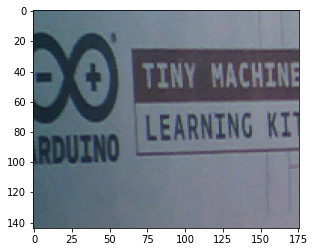

In [7]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()